In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import openpyxl as oxl
import SingleFocus_1 as sf1
import Dropper as dropper
import time as t
# experiment
import missingno as msno
# from pylab import rcParams
# import everything needed

from scipy.stats import ttest_ind # prepare for the t test

### Above is consist of all modules

In [2]:
def grouping(df):
    """
    create a list of dataframes, each element of the list contains a dataframe
    that is grouped by ID
    """
    # convert the values from the projid to a list
    projid_list = df.projid.unique()
    projid_list = projid_list.tolist() #list acquired this is a unique list of ID

    list_of_patients = []
    counter_start_df_row = 0 # used for slicing the df, first
    counter_end_df_row   = 0 # used for slicing the df, last
    counter_flag_start   = 0 # "for loop" start index for df spliting based on unique ID
    df = df.reset_index(drop = True) # df reindexed

    # messy
    for p_id in projid_list: # loop through the unique id list
        for df_index in range(counter_flag_start, df.shape[0]): 
            if df.iloc[df_index]['projid'] == p_id:
                counter_end_df_row += 1
            elif df.iloc[df_index]['projid'] != p_id:
                break
        # print("List appended ===>>> " + str(p_id))
        list_of_patients.append(df[counter_start_df_row: counter_end_df_row])
        counter_start_df_row = counter_end_df_row
        counter_flag_start = counter_end_df_row

    # print (list_of_patients) #CHECKED
    return list_of_patients # a list of df, that each element of the list is one patient

def patient_analysis(list_of_patient_diagnosed, list_of_patient_not_diagnosed = None):
    """
    list = [df1, df2, df3 ...]
    Analysis DF on a patient based scale
    """
    temp_list_p_diagnosed = list_of_patient_diagnosed.copy()
    # example of heatMap =  SNS https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
    # heatmap matplot = https://stackoverflow.com/questions/12286607/python-making-heatmap-from-dataframe
    """
    plan:
        . . .
    """
    interesting_attr = ['chlstrl',
                        'crn', 'gfr_mdrs', 'glucose',
                        'hba1c', 'hdlchlstrl',
                        'hdlratio',
                        'hemacrit',
                        'hemoglbn',
                        'ldlchlstrl',
                        'mch',
                        'mchc',
                        'mcv',
                        'platelet', 'rbc', 'dcfdx'] # some interesting attr
    # for patient in temp_list_p_diagnosed:
        
        

    # need to finish this tomorrow


def sort_patient(list_of_patient):
    """
    split the patient based of if the patient was diagnosed or not
    """
    list_of_patient_diagnosed = []      # with alzheimer
    list_of_patient_not_diagnosed = []  # without alzheimer
    diagonosed_flag = False

    for patient in list_of_patient:
        dcfdx_check_list = patient['dcfdx'].tolist()
        for dcfdx_element in dcfdx_check_list:
            if dcfdx_element >= 4: # >= 4 means diagnoised
                diagonosed_flag = True
                break
        if (diagonosed_flag) == True:
            list_of_patient_diagnosed.append(patient)
            diagonosed_flag = False
        else:
            list_of_patient_not_diagnosed.append(patient)
    
    return list_of_patient_diagnosed, list_of_patient_not_diagnosed

def output_table_xlsx(df, output_filename): # dataframe, string
    """
    helper function to output df back to xlsx
    to get a better view of all the columns
    """
    writer_excel = pd.ExcelWriter(output_filename + ".xlsx")
    df.to_excel(writer_excel, 'Sheet1')
    print ("file created")
    
def sort_cases(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 4
    dcfdx_split_lvl = 4     # diagnosed flag >= 4 diagnosed, smaller than 4 is not

    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] >= dcfdx_split_lvl:
            # get the df row that is larger than 4
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] < dcfdx_split_lvl:
            # get the df row that is smaller than 4
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    
    return new_diagnosed_df_by_case, new_not_diagnosed_df_by_case

### All the helper function should be added above
---
### The cell below is to load the dataset. While calling some function from the previous to group and sort the DF

In [3]:
path = '/Users/haominshi/Desktop/al_data/dataset_576_long.xlsx'
path_test = '/Users/haominshi/Desktop/al_data/dataset_testing_short.xlsx'
print ("Processing...")
timer_1 = t.time()
# =============================== Change path here
data_set_everything = sf1.openExcelSheet(path, sheet_name="Sheet0")
# data_set_everything = sf1.openExcelSheet(path_test, "Sheet1")
# ==========================================================================

# ==========================================================================
timer_1 = t.time() - timer_1
print (timer_1)
print (data_set_everything.shape)
print ("DF loaded")
# file transfered to DF
timer_1 = t.time()
# ==========================================================================
data_set_everything = dropper.drop_none_important_features(data_set_everything)
# drop none important features
data_set_everything = dropper.clean_history(data_set_everything)
# ==========================================================================
timer_1 = t.time() - timer_1
print(timer_1)
print(data_set_everything.shape)
data_set_cleaned = data_set_everything.copy() 
# the cleaned dataset's index is not droped
print("DF cleaned") 
# ==========================================================================
print("DF grouping")
timer_1 = t.time()
# list_of_patient = list of df based on each patient, each element of the list
# is a patient, and in that patient, we have the DF for each of their visit
list_of_patient = grouping(data_set_cleaned)
timer_1 = t.time() - timer_1
print(timer_1)
print("DF grouped dtype = list, total patient count is: " \
+ str(len(list_of_patient)))
# ==========================================================================
# print("DF sorting")

Processing...
29.103233098983765
(25570, 203)
DF loaded
0.8298130035400391
(3594, 123)
DF cleaned
DF grouping
1.240248203277588
DF grouped dtype = list, total patient count is: 1189


----------

In [4]:
# 2 very important asset, all the manipulation use these 2
list_of_patient_diagnosed, list_of_patient_not_diagnosed = \
sort_patient(list_of_patient) # return 2 list of patient, split by if diagnosed
print("2 list generated, diagnosed, and not diagnosed")
print("Amount of patient diagnosed = " + str(len(list_of_patient_diagnosed)))
print("Amount of patient not diagnosed = " + str(len(list_of_patient_not_diagnosed)))
# ==========================================================================
# print (list_of_patient_diagnosed)
# output_table_xlsx(data_set_cleaned,"output_cleaned_dataSet")
# from column [66:] is boolean value [1,0]
patient_analysis(list_of_patient_diagnosed)

2 list generated, diagnosed, and not diagnosed
Amount of patient diagnosed = 271
Amount of patient not diagnosed = 918


---
### Visualize the DF we have now, white is empty value, dark is none empty

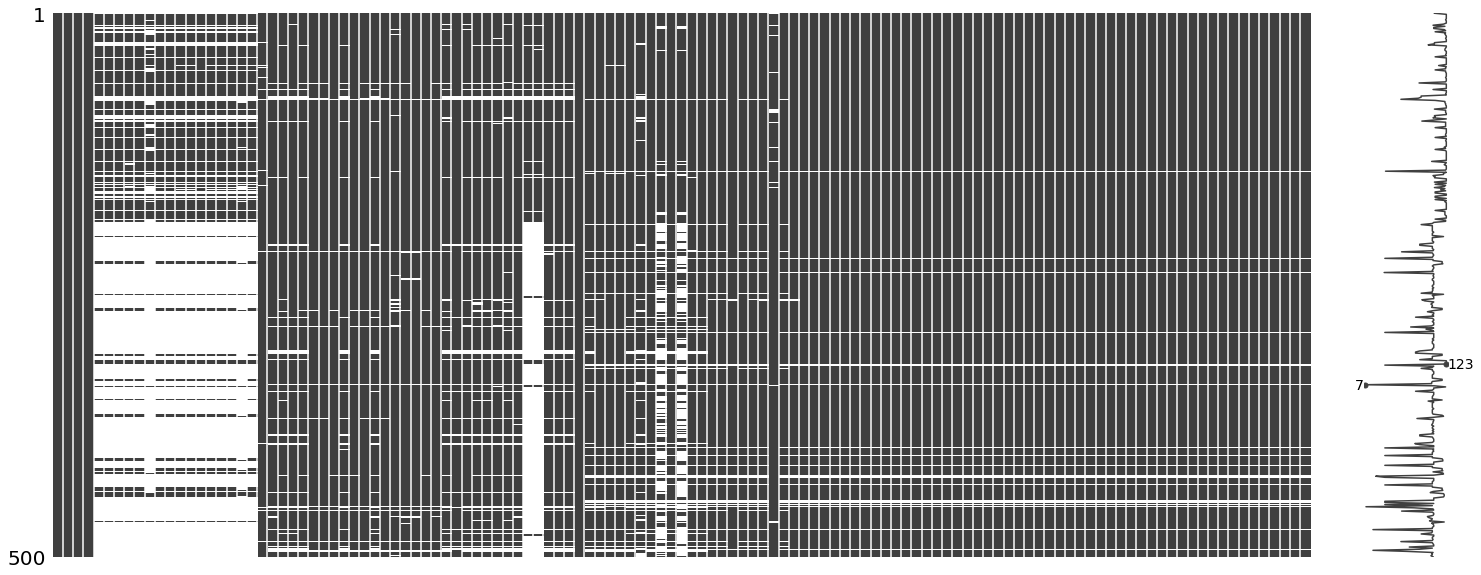

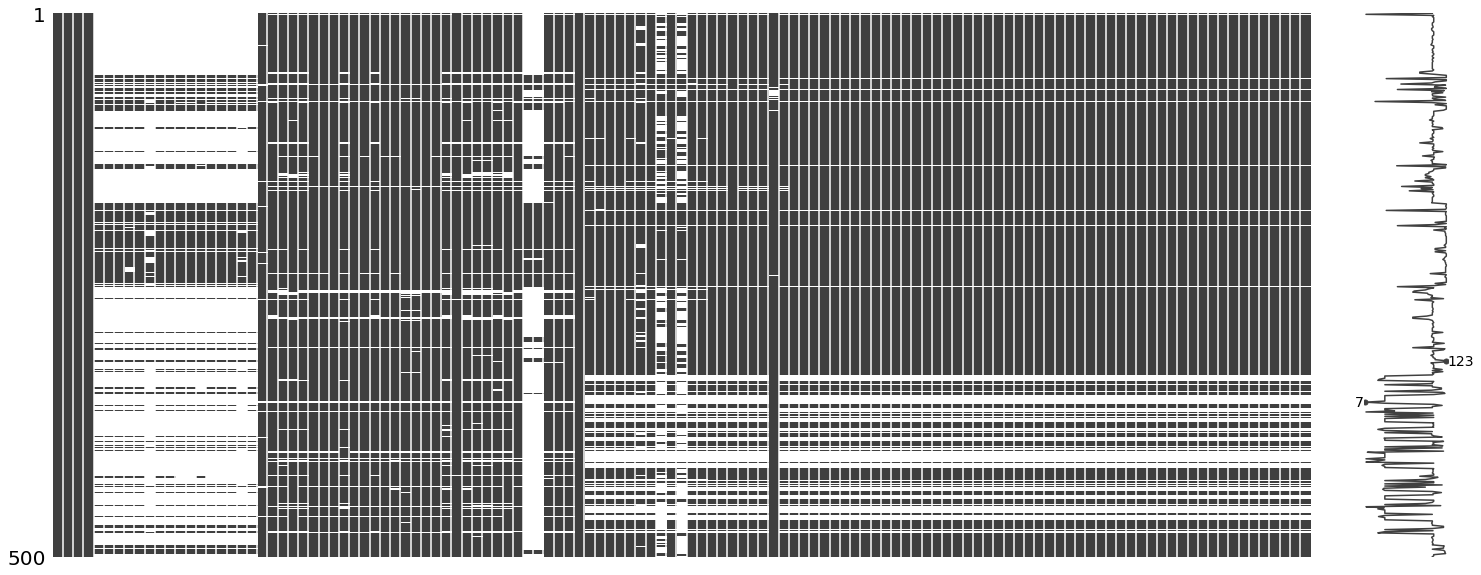

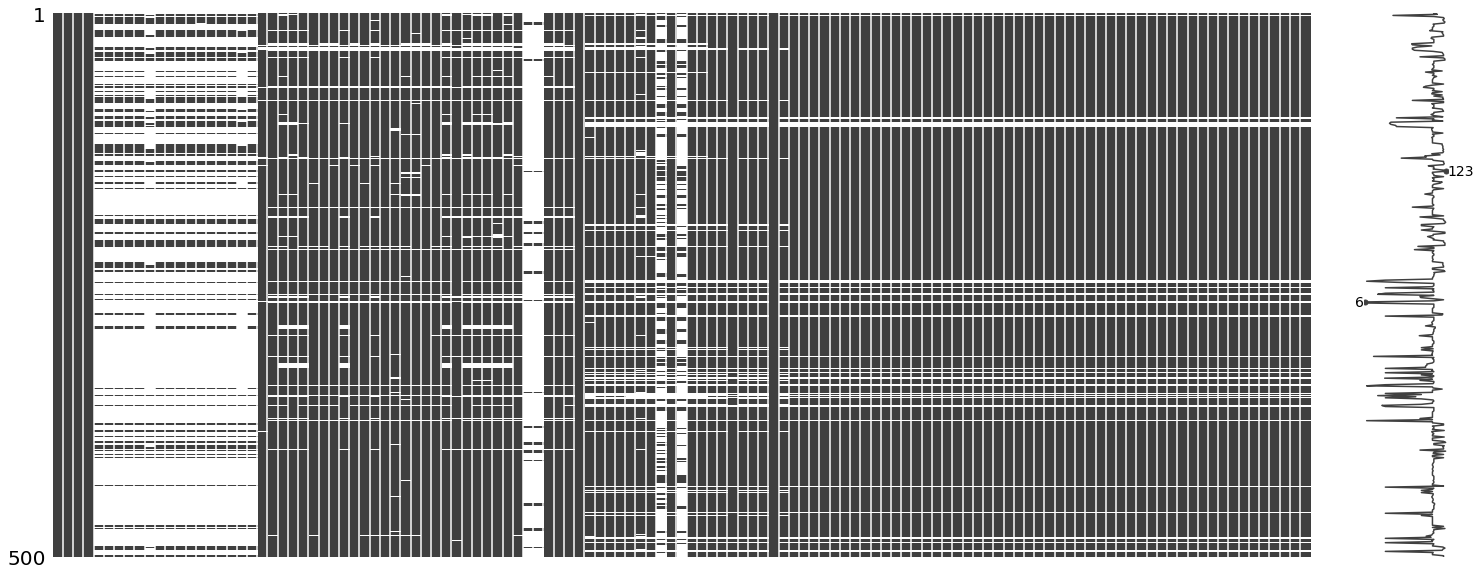

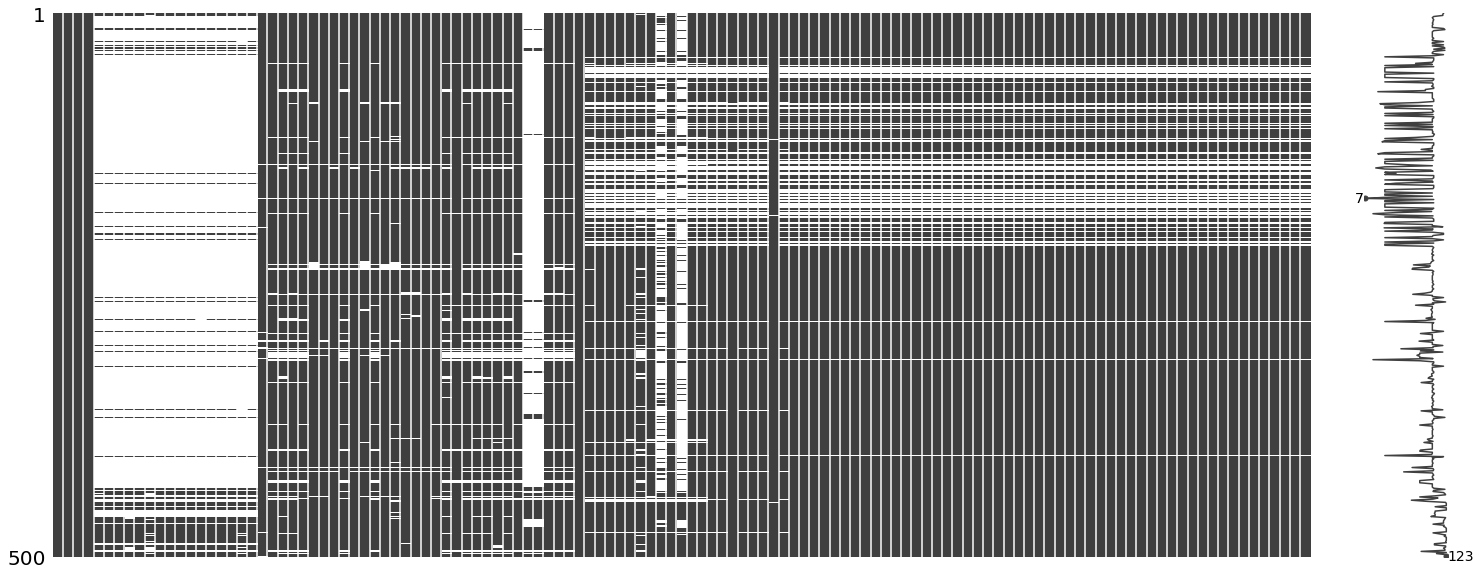

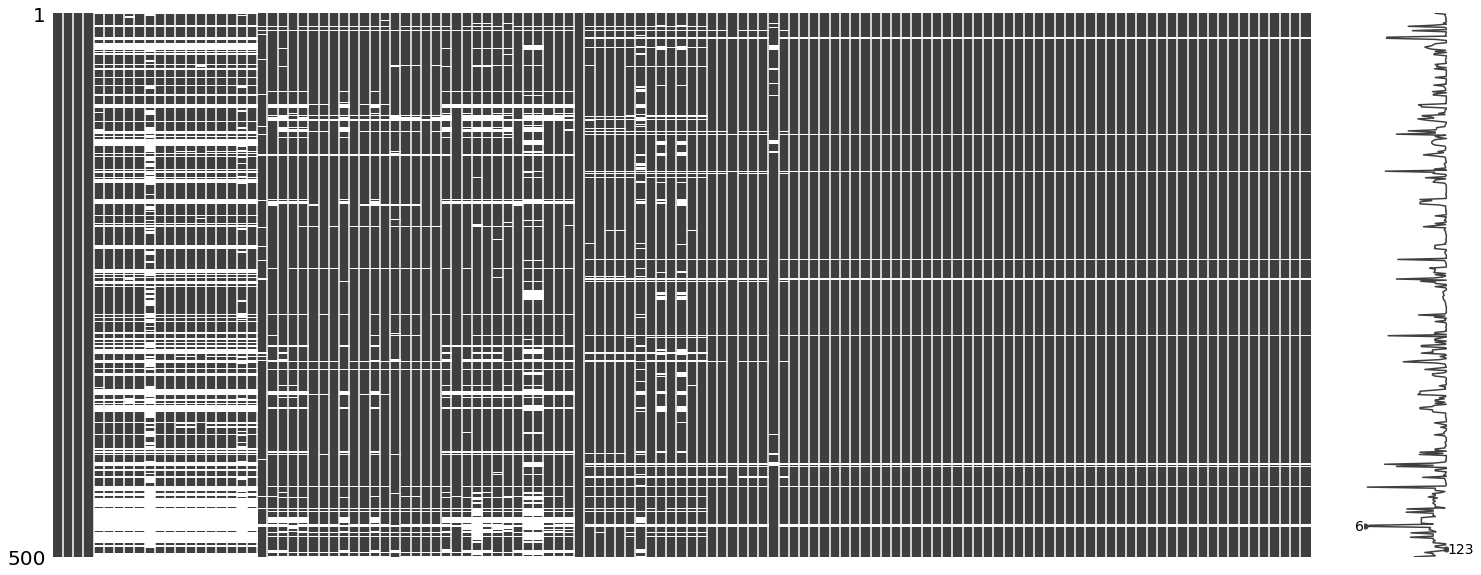

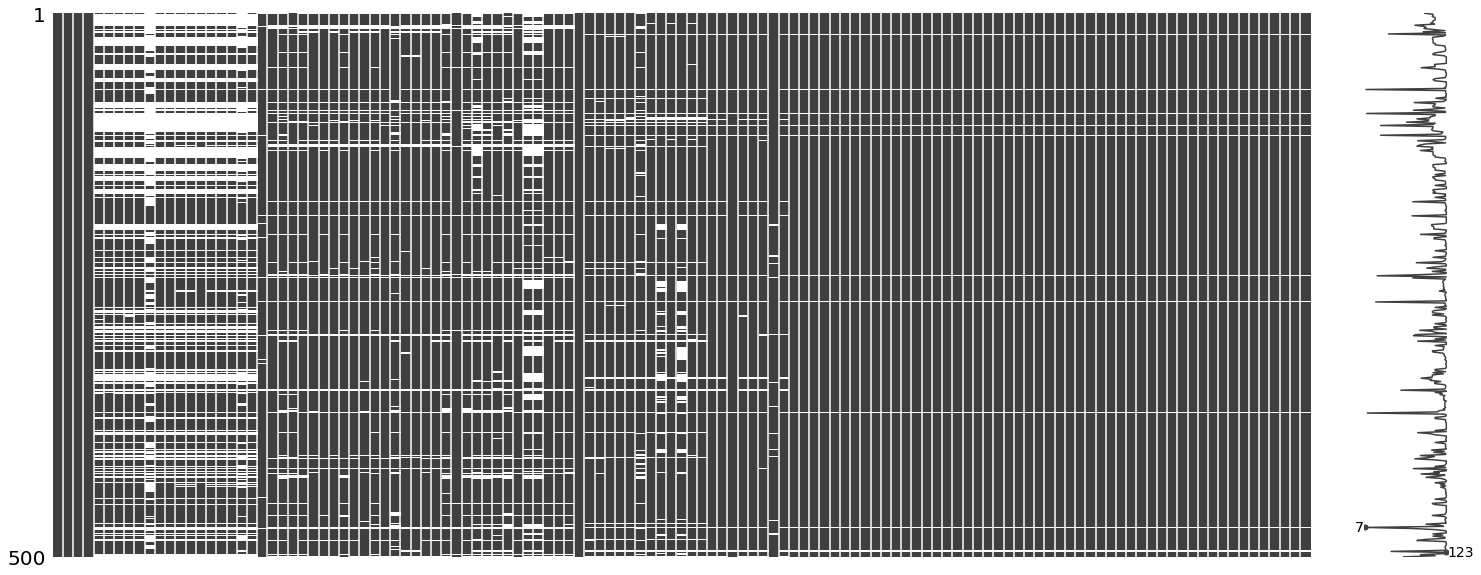

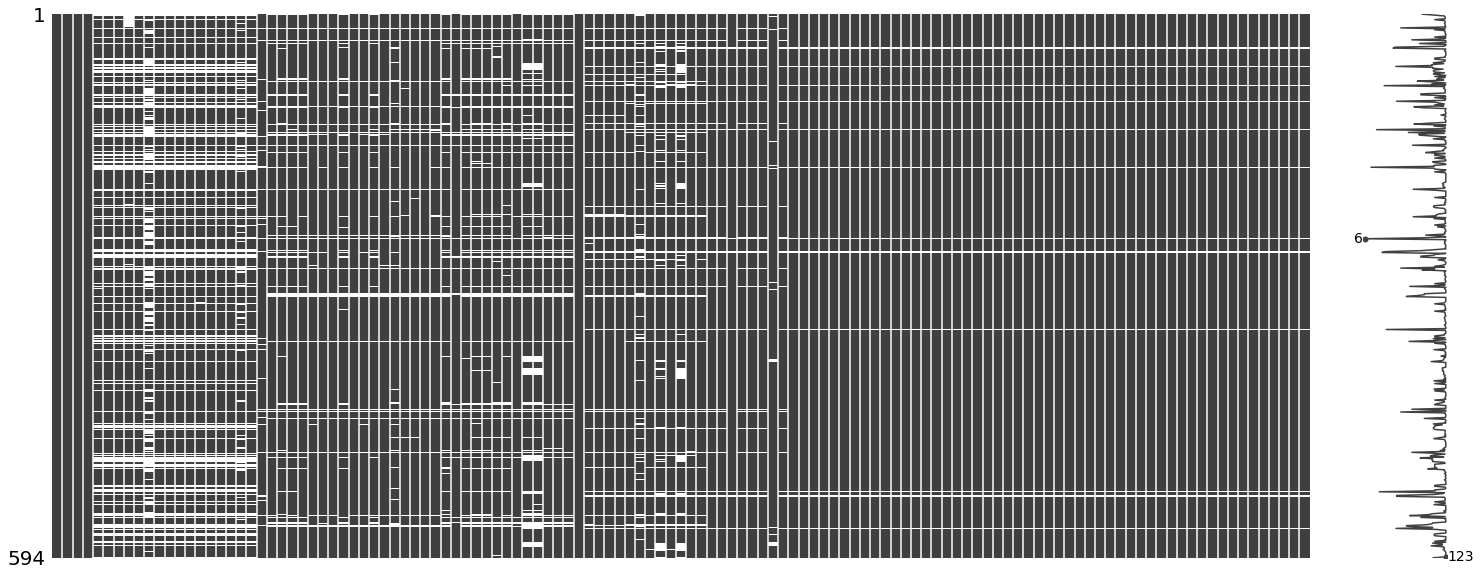

In [5]:
msno.matrix(data_set_cleaned[:500]) # visualize the missing data
msno.matrix(data_set_cleaned[500:1000]) 
msno.matrix(data_set_cleaned[1000:1500])
msno.matrix(data_set_cleaned[1500:2000])
msno.matrix(data_set_cleaned[2000:2500])
msno.matrix(data_set_cleaned[2500:3000])
msno.matrix(data_set_cleaned[3000:])

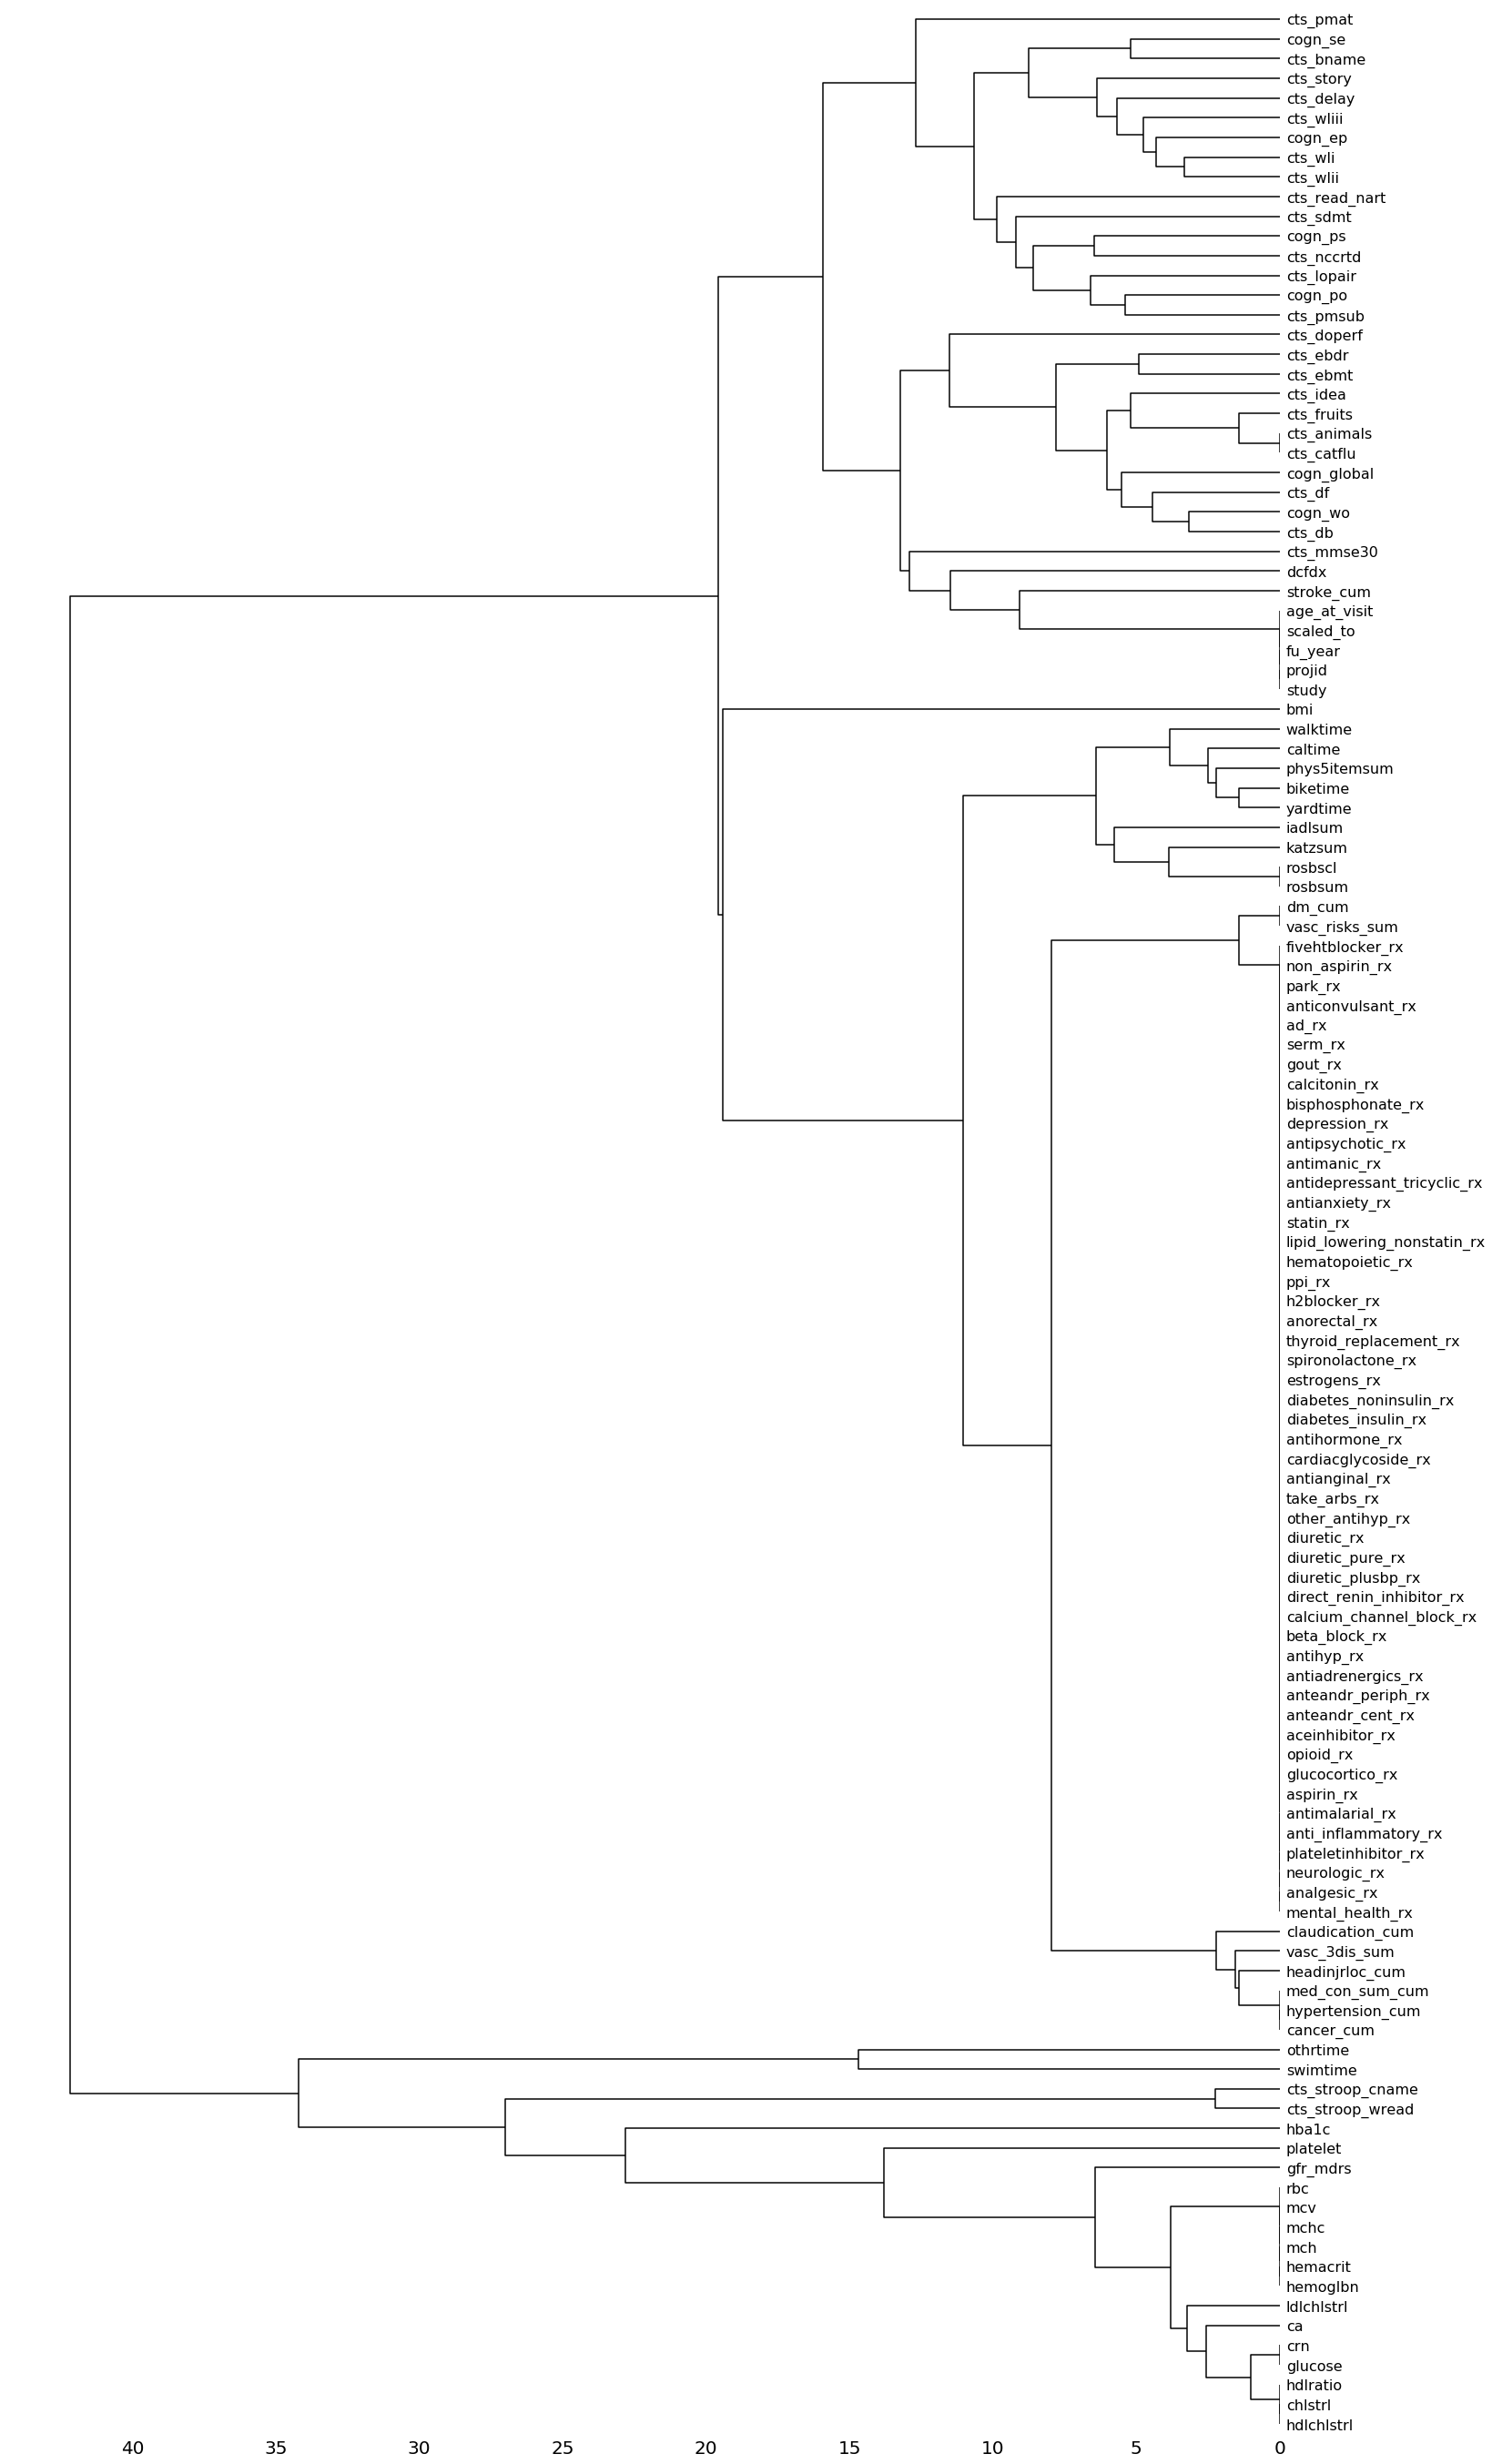

In [6]:
msno.dendrogram(data_set_cleaned)

#### NOTE:
###### 1. data_set_cleaned # this is a DF
###### 2. list_of_patient_diagnosed # this is a list of DF
###### 3. list_of_patient_not_diagnosed # this is a list of DF

From the above cell, give a brief visulization of the whole data set. For the next move, I think the test I will be running is to see the heat map of all patient with diagnosed and comoare it with all the patient that is not diagnosed. Want to find out what is the main differences we have between 2 data set.

<i>NOTE:</i>
1. The list_of_patient_diagnosed is a list of DF, that each element in the list is a patient, the data within that element is consist of a dataframe, that each row of that DF is a record of that patient visiting the clinic. NOTE: that for some visit the patient might not be diagnosed with Alzheimer. // The patient is added to this list if one of the visit the <b>"dcfdx" is larger or equals to 4</b>

2. The list_of_patient_not_diagnosed is a list of DF, that each element in the list is a patient too. But all of the patient in this list has <b>"dcfdx" smaller than 4</b>

### This is a good overveiw of the total dataframe, the dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap I think now I am going to split the DF to 2 pieces, instead of based on the patient, I am going to do one that is based on cases, primarily focused on the "dcfdx". Focus is to group the "dcfdx" >= 4 to one DF, "dcfdx" < 4 to another DF. Run the visual and see the possible clue

In [7]:
# 2 DF, one is diagnosed, one is not diagonesed
df_diagnosed_df_by_case, df_not_diagnosed_df_by_case = \
sort_cases(data_set_cleaned)
print("2 DF created, grouped by diagnosed and not diagnosed")

2 DF created, grouped by diagnosed and not diagnosed


###### 1. df_diagnosed_df_by_case # this is a DF "dcfdx" >= 4
###### 2. df_not_diagnosed_df_by_case # this is a DF "dcfdx" < 4

# Overview:
   ## What do I have now?
       1. I have the cleaned DF, dropped none important columns
       2. I have 2 lists, each list item represent a patient, and list is seperated by diagnosed and not diagnosed
       3. I have 2 DF, seperated by case, case is seperated by "dcfdx" >= 4 and smaller than 4
   ## What do I need to do next?
       1. heatmap for the 2 DF
       2. cased based analysis, use the 2 list
       3. look at the describe of both of the DF for diagonesd and not diagonesd, compare and graph the diff

In [8]:
df_diagnosed_desc = df_diagnosed_df_by_case.describe()
df_not_diagnosed_desc = df_not_diagnosed_df_by_case.describe()

print(df_diagnosed_desc.iloc[1])

ca                               9.380412
chlstrl                        202.096447
crn                              0.997919
gfr_mdrs                        64.511789
glucose                        107.157360
hba1c                            5.793525
hdlchlstrl                      60.213198
hdlratio                         3.563452
hemacrit                        39.834021
hemoglbn                        13.328866
ldlchlstrl                     112.757732
mch                             30.987113
mchc                            33.459278
mcv                             92.572680
platelet                       228.122905
rbc                              4.305412
dcfdx                            4.149160
cogn_ep                         -1.915264
cogn_po                         -1.105438
cogn_ps                         -1.645532
cogn_se                         -1.582807
cogn_wo                         -1.075039
cogn_global                     -1.627503
cts_animals                      7

In [9]:
print(df_diagnosed_desc)
print(df_not_diagnosed_desc)

               ca     chlstrl         crn    gfr_mdrs     glucose       hba1c  \
count  194.000000  197.000000  197.000000  195.000000  197.000000  139.000000   
mean     9.380412  202.096447    0.997919   64.511789  107.157360    5.793525   
std      0.396524   41.044598    0.280625   16.869976   30.490892    0.415149   
min      8.100000   77.000000    0.440000   20.638842   48.000000    4.500000   
25%      9.100000  174.000000    0.800000   53.373320   88.000000    5.600000   
50%      9.400000  202.000000    0.970000   64.494564  100.000000    5.800000   
75%      9.700000  225.000000    1.100000   75.323180  120.000000    5.950000   
max     10.400000  354.000000    2.370000  141.169742  245.000000    7.700000   

       hdlchlstrl    hdlratio    hemacrit    hemoglbn        ...         \
count  197.000000  197.000000  194.000000  194.000000        ...          
mean    60.213198    3.563452   39.834021   13.328866        ...          
std     17.256032    1.069753    4.720837    

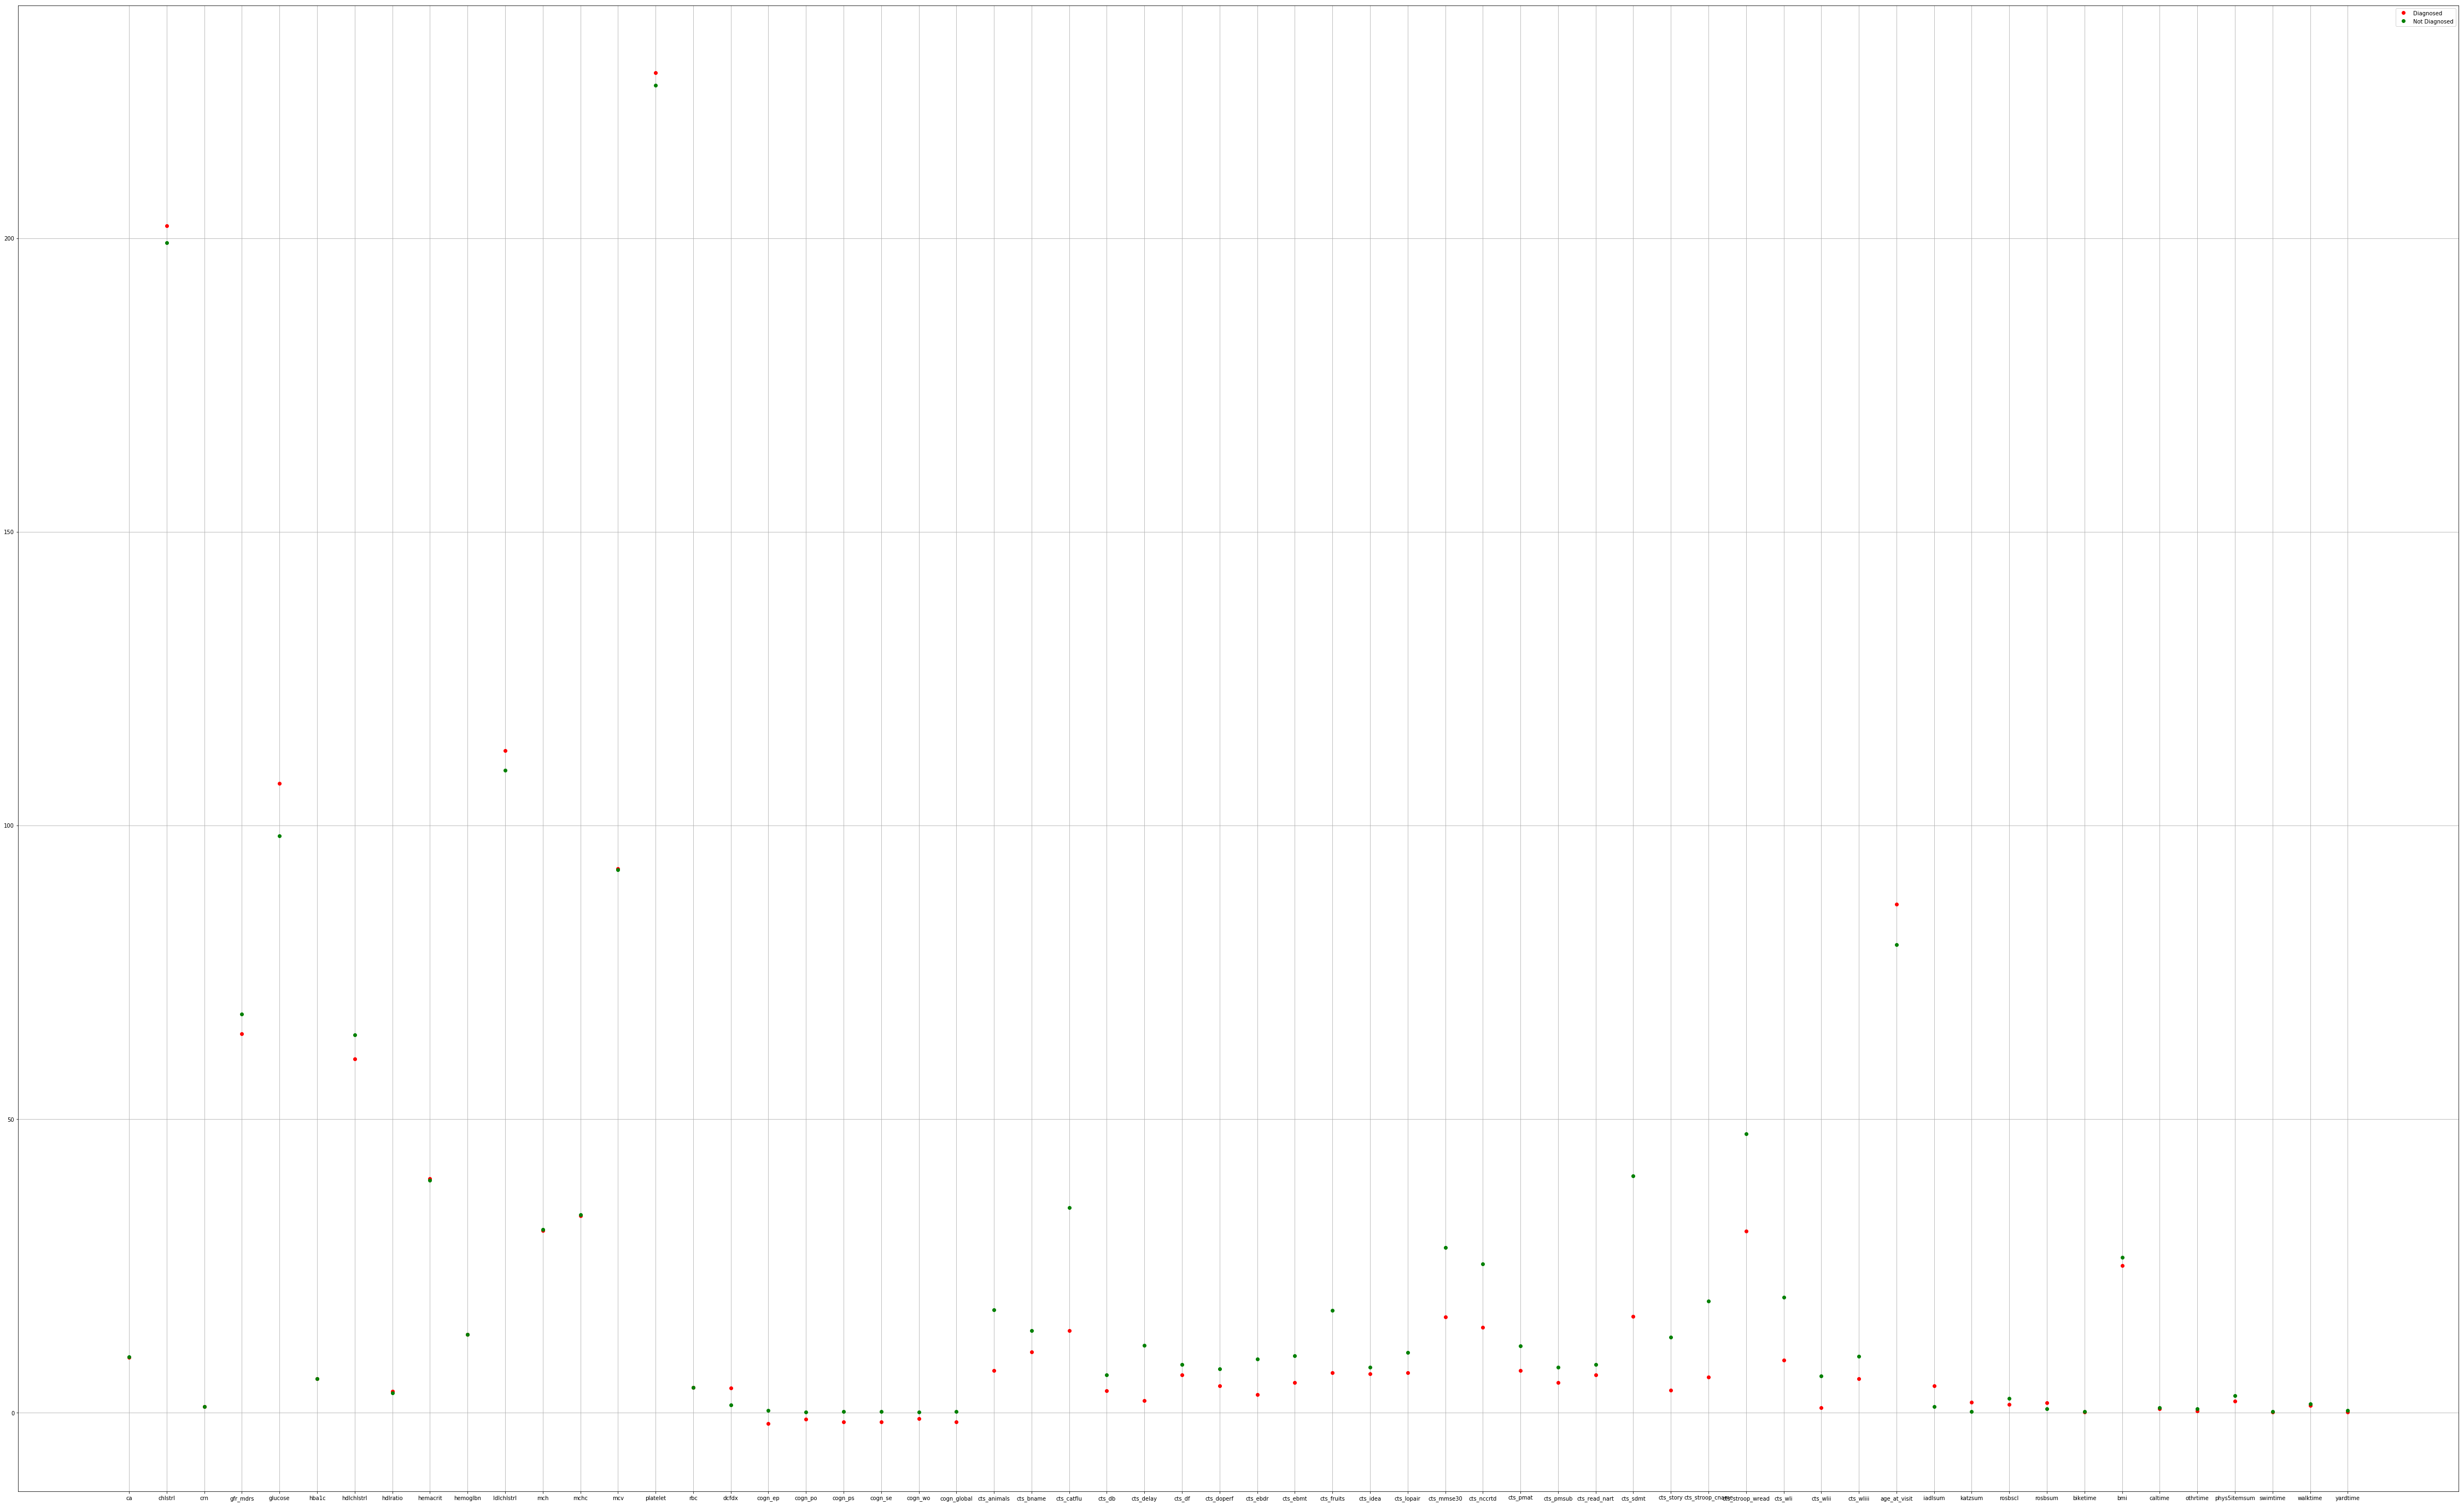

In [10]:
#df_diagnosed_desc.mean()[5:20].plot(kind="bar")
#df_not_diagnosed_desc.mean()[5:20].plot(kind="bar")
plt.figure(figsize=(80,50))
plt.plot(df_diagnosed_desc.iloc[1][:60], \
         label='Diagnosed',linestyle="",marker="o",color="red")
plt.plot(df_not_diagnosed_desc.iloc[1][:60], \
         label='Not Diagnosed',linestyle="",marker="o",color="green")
plt.legend(loc='best')
plt.grid()
plt.show()

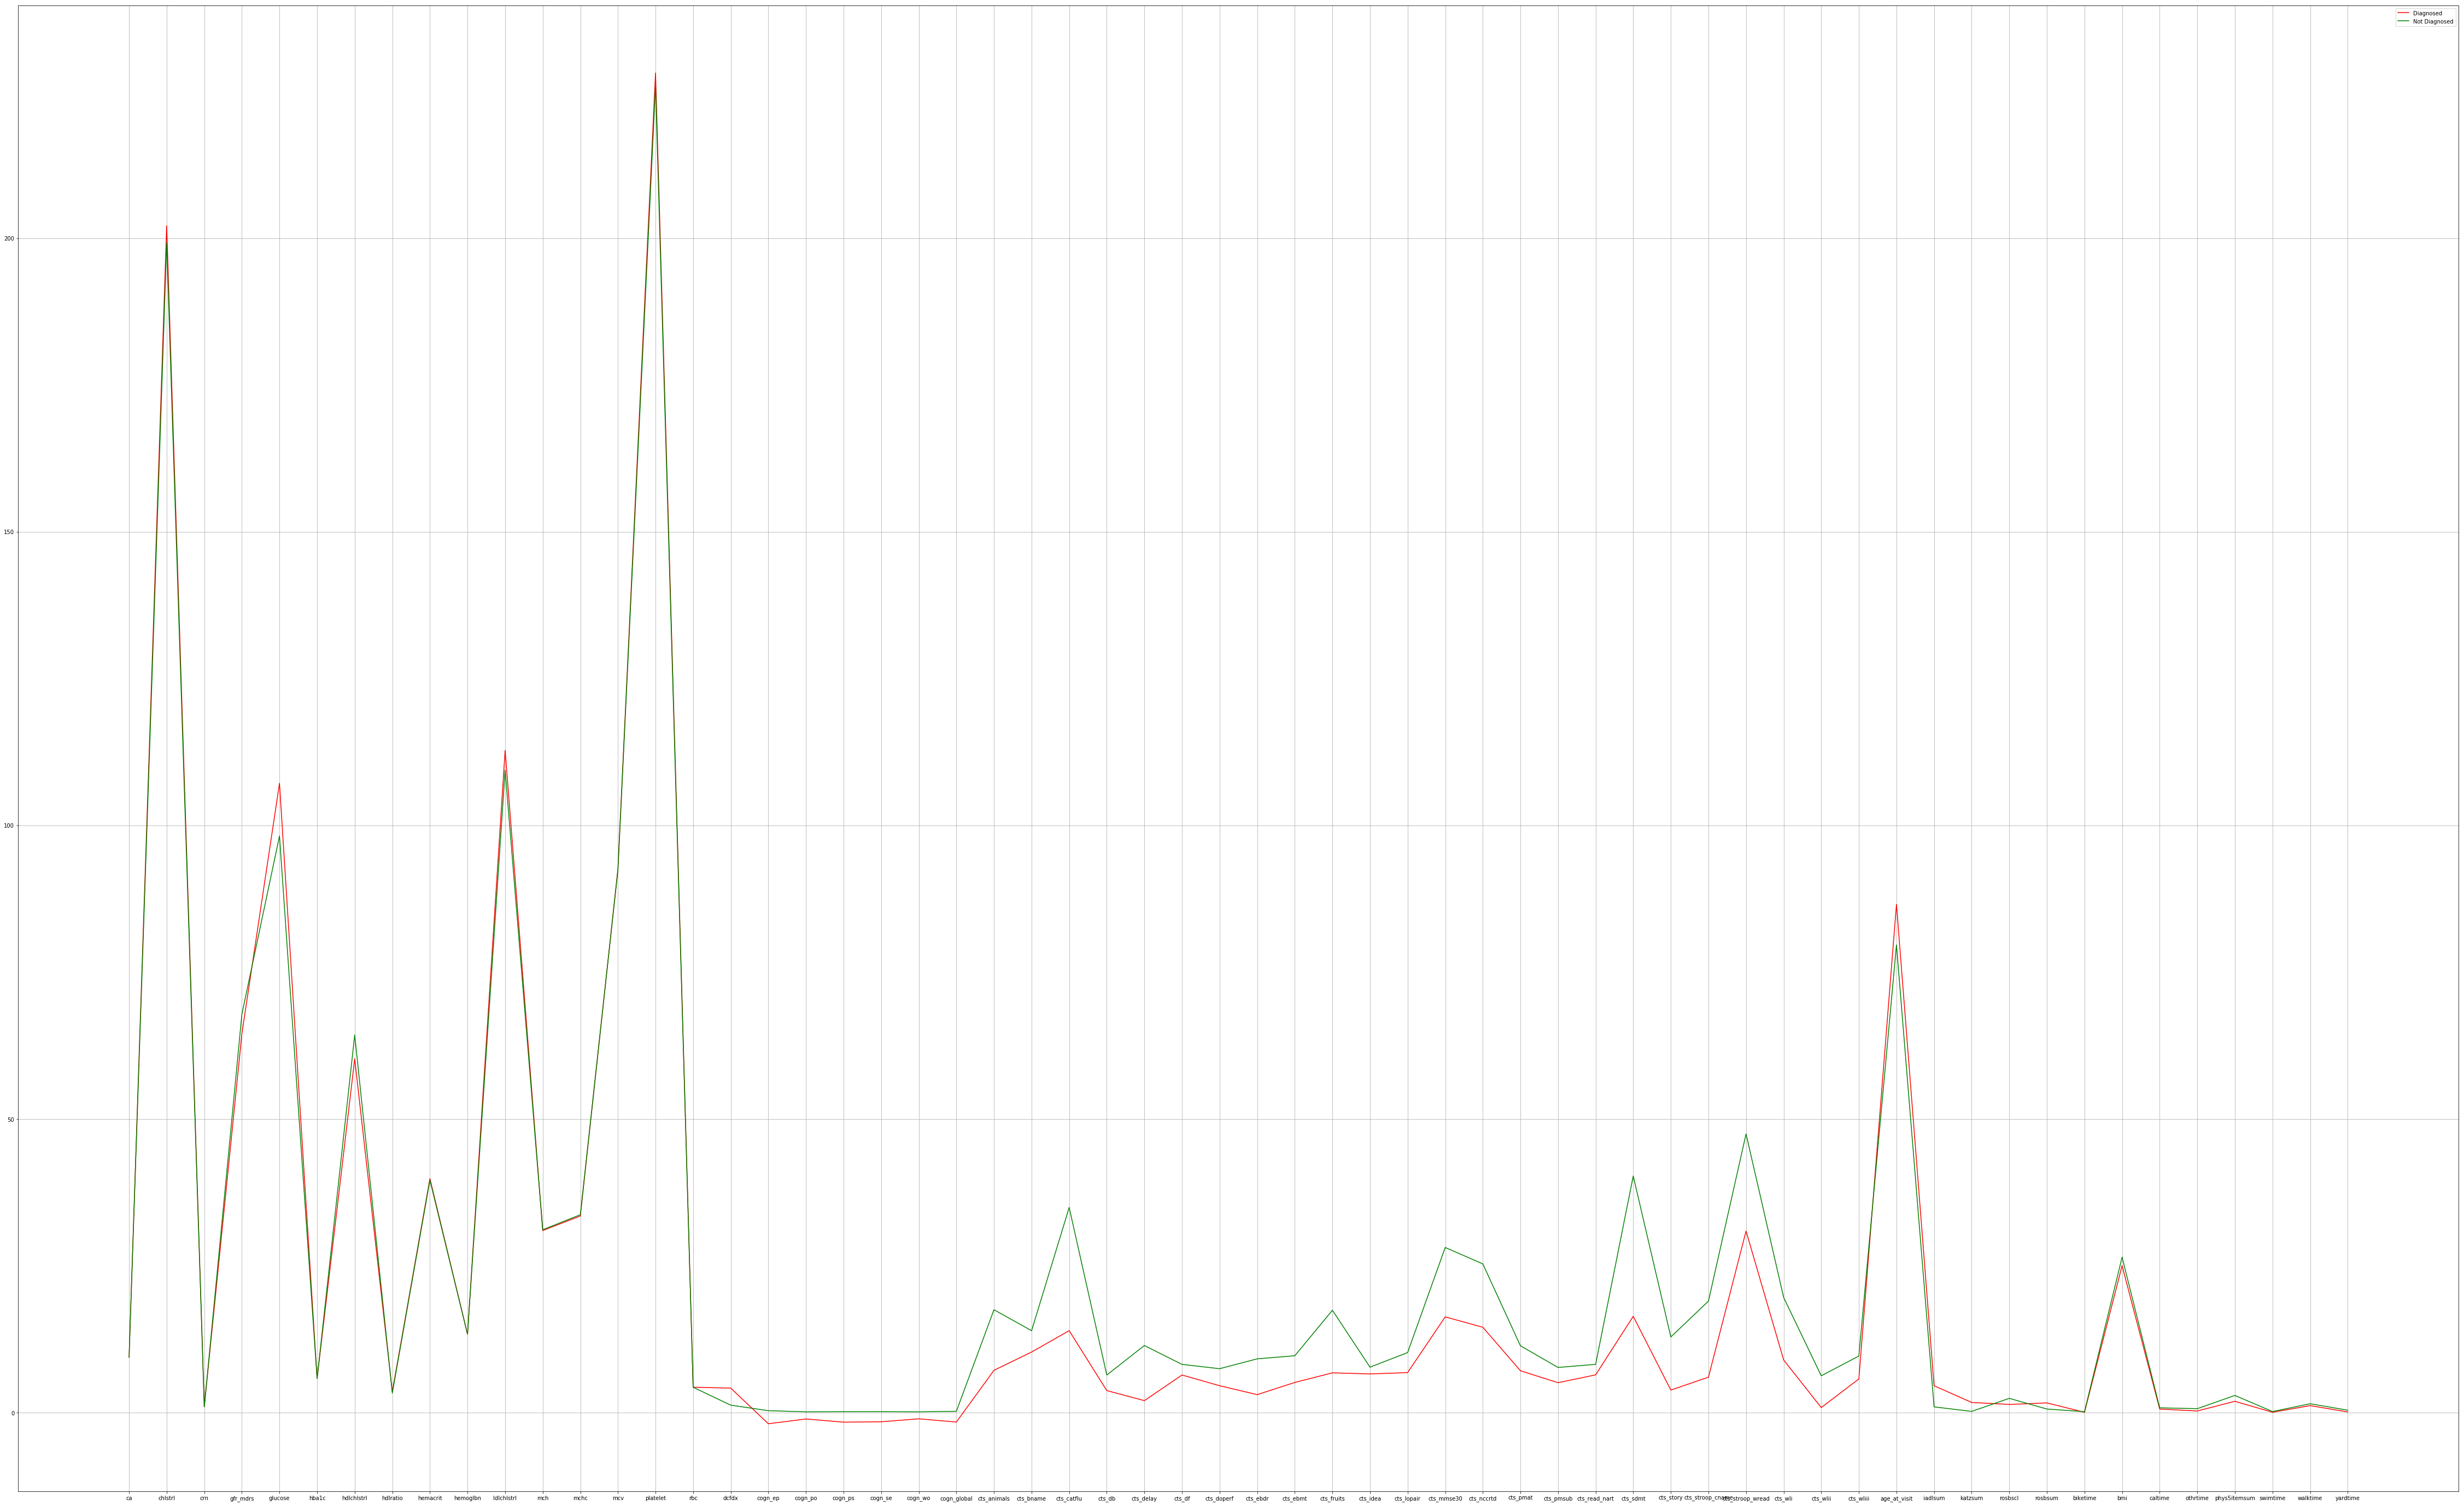

In [11]:
plt.figure(figsize=(80,50))
plt.plot(df_diagnosed_desc.iloc[1][:60], \
         label='Diagnosed',color="red")
plt.plot(df_not_diagnosed_desc.iloc[1][:60], \
         label='Not Diagnosed',color="green")
plt.legend(loc='best')
plt.grid()
plt.show()

### Now drawing the dendrogram
#### - First one is diagonsed
#### - Second one is not diagnosed

## The code below run the plot for a single patient that is <u> Diagonesd </u>
#### - The color of the line represent the stage. One graph for one patient

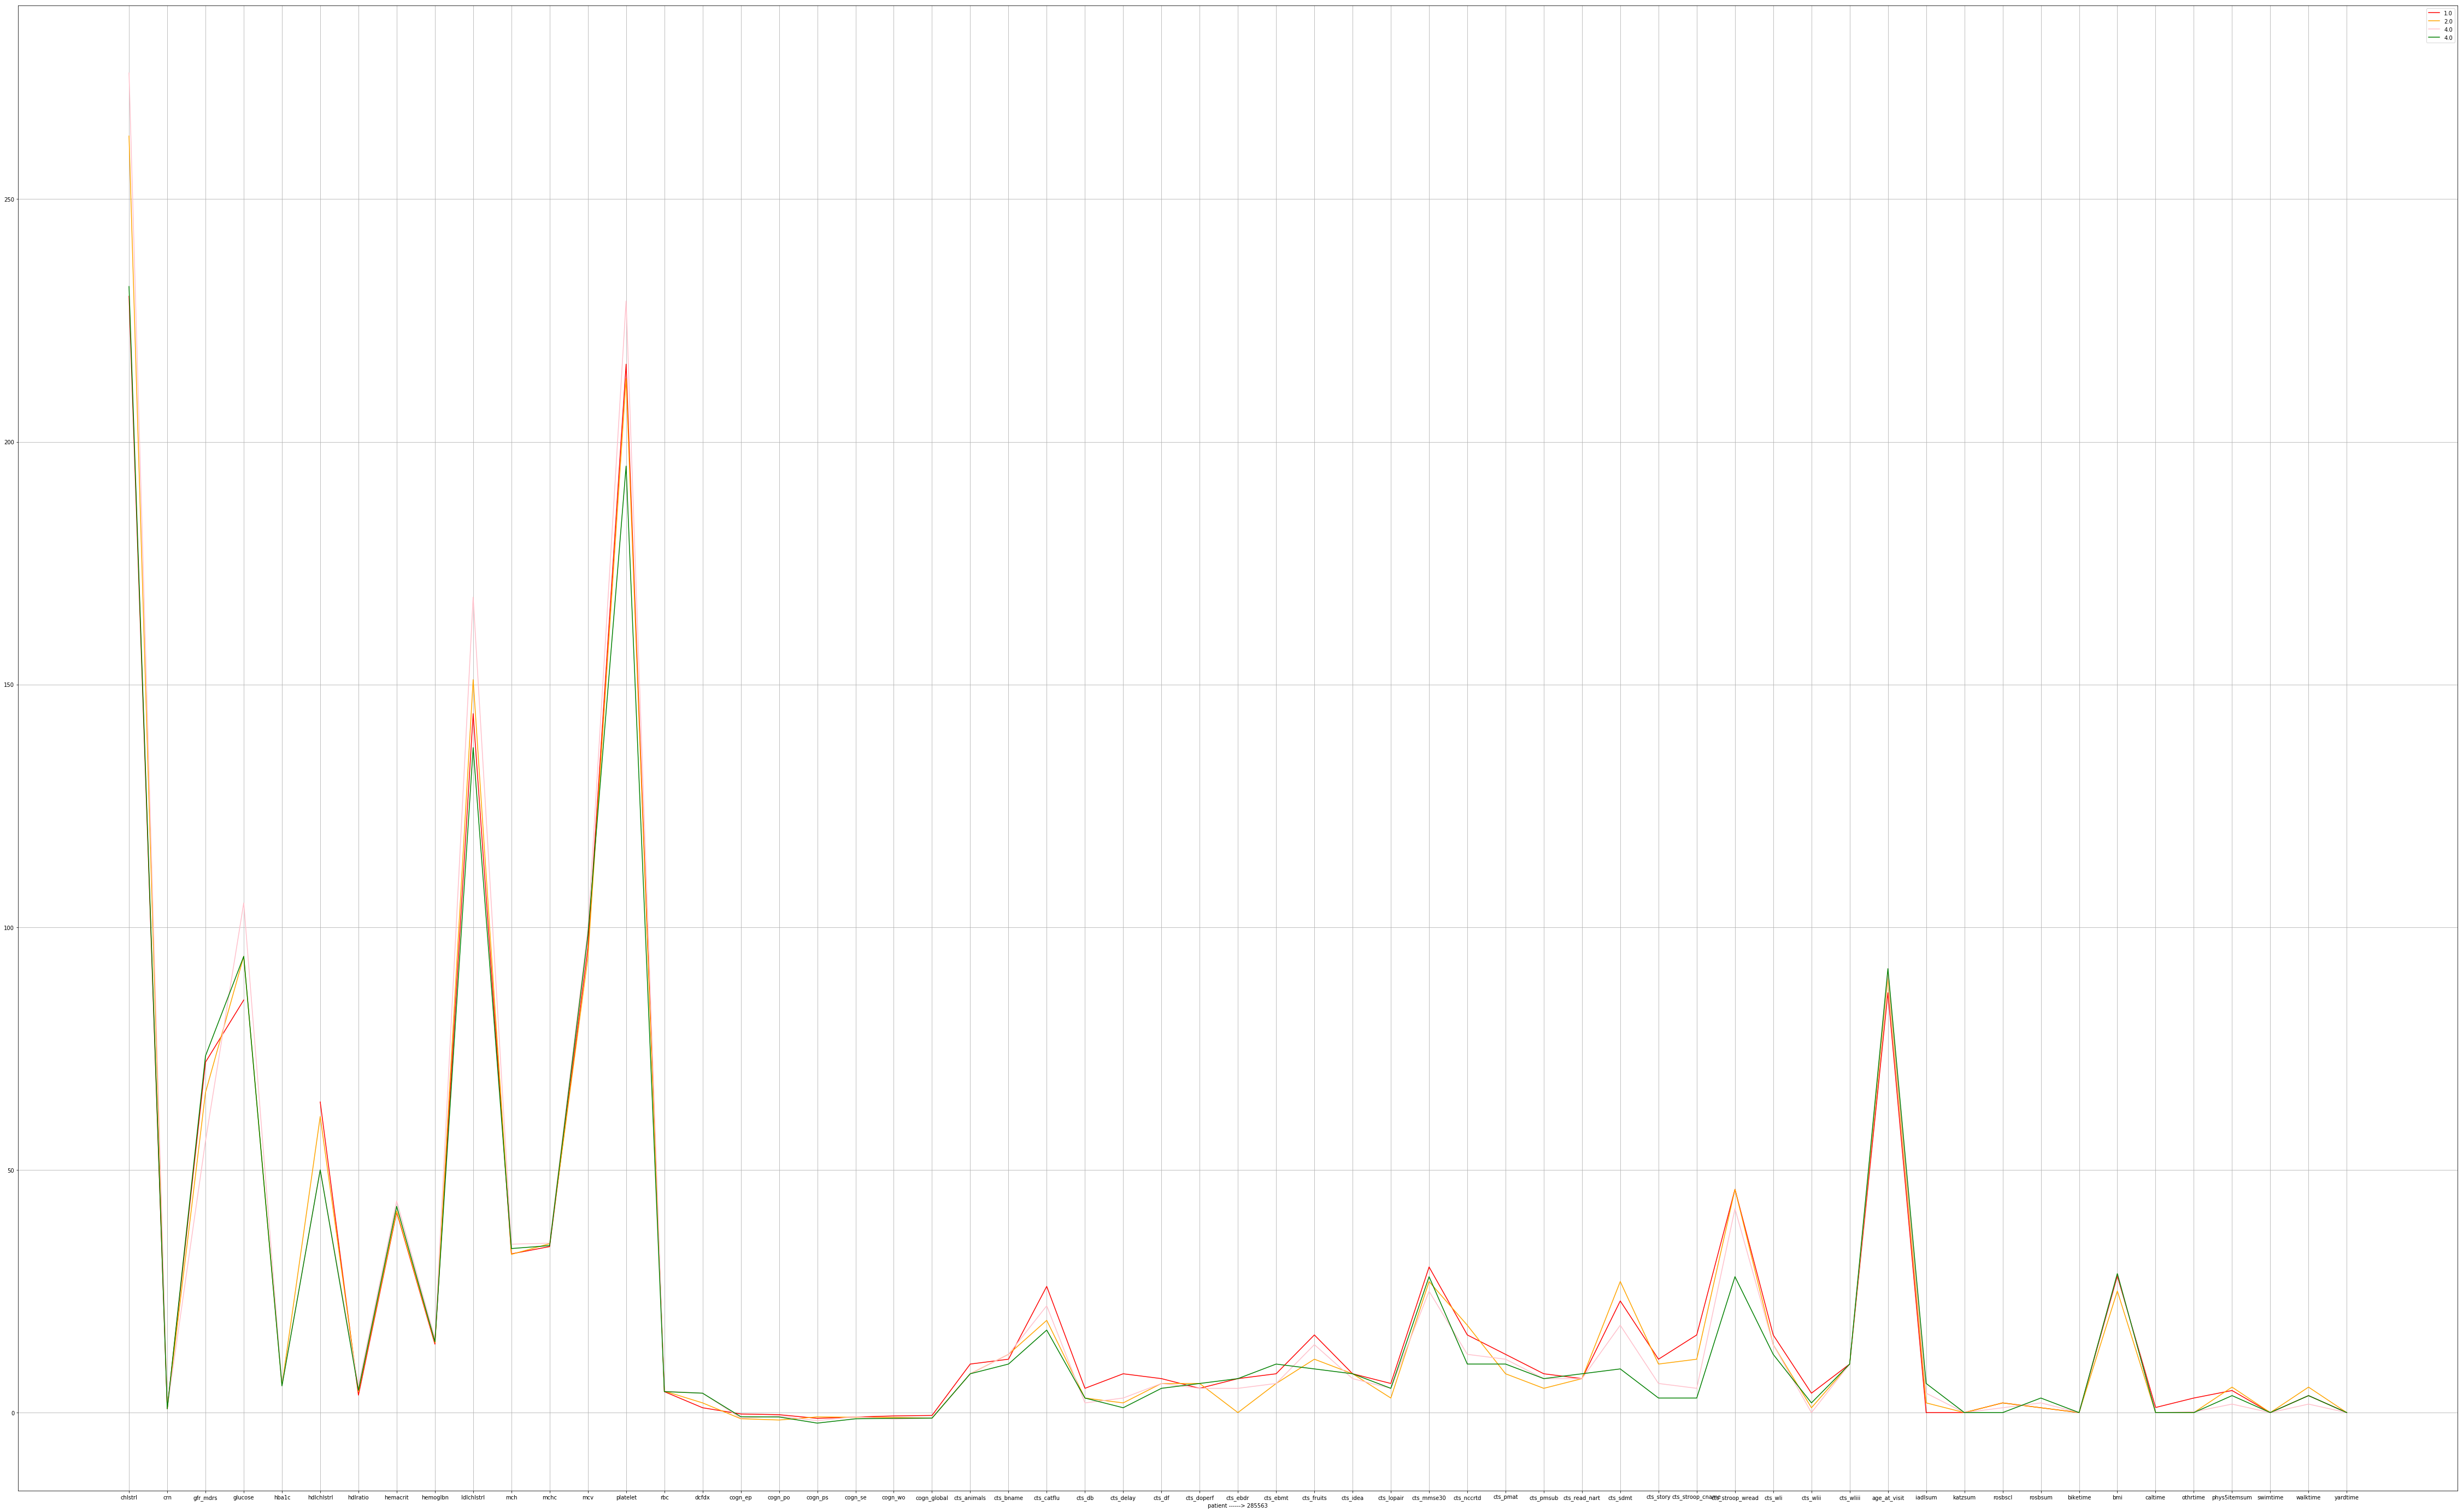

In [12]:
#list_of_patient_diagnosed
plt.figure(figsize=(80,50))
"""plt.plot(list_of_patient_diagnosed[0].iloc[1][5:64], \
         label='Diagnosed',color="red")
plt.plot(list_of_patient_diagnosed[0].iloc[2][5:64], \
         label='Not Diagnosed',color="green")"""

color = ["red","orange","pink","green","blue","indigo","violet","black","grey"]
# (red, orange, yellow, green, blue, indigo, violet)

for i in range(0,list_of_patient_diagnosed[0].shape[0]-1):
    plt.plot(list_of_patient_diagnosed[0].iloc[i][5:64], \
         label=list_of_patient_diagnosed[0].iloc[i]["dcfdx"],color=color[i])
    plt.xlabel('patient ------> ' + str(list_of_patient_diagnosed[0].iloc[i]["projid"]))


plt.legend(loc='best')
plt.grid()
plt.show()

## The code below run the plot for a single patient that is <u> NOT Diagonesd </u>
#### - The color of the line represent the stage. One graph for one patient

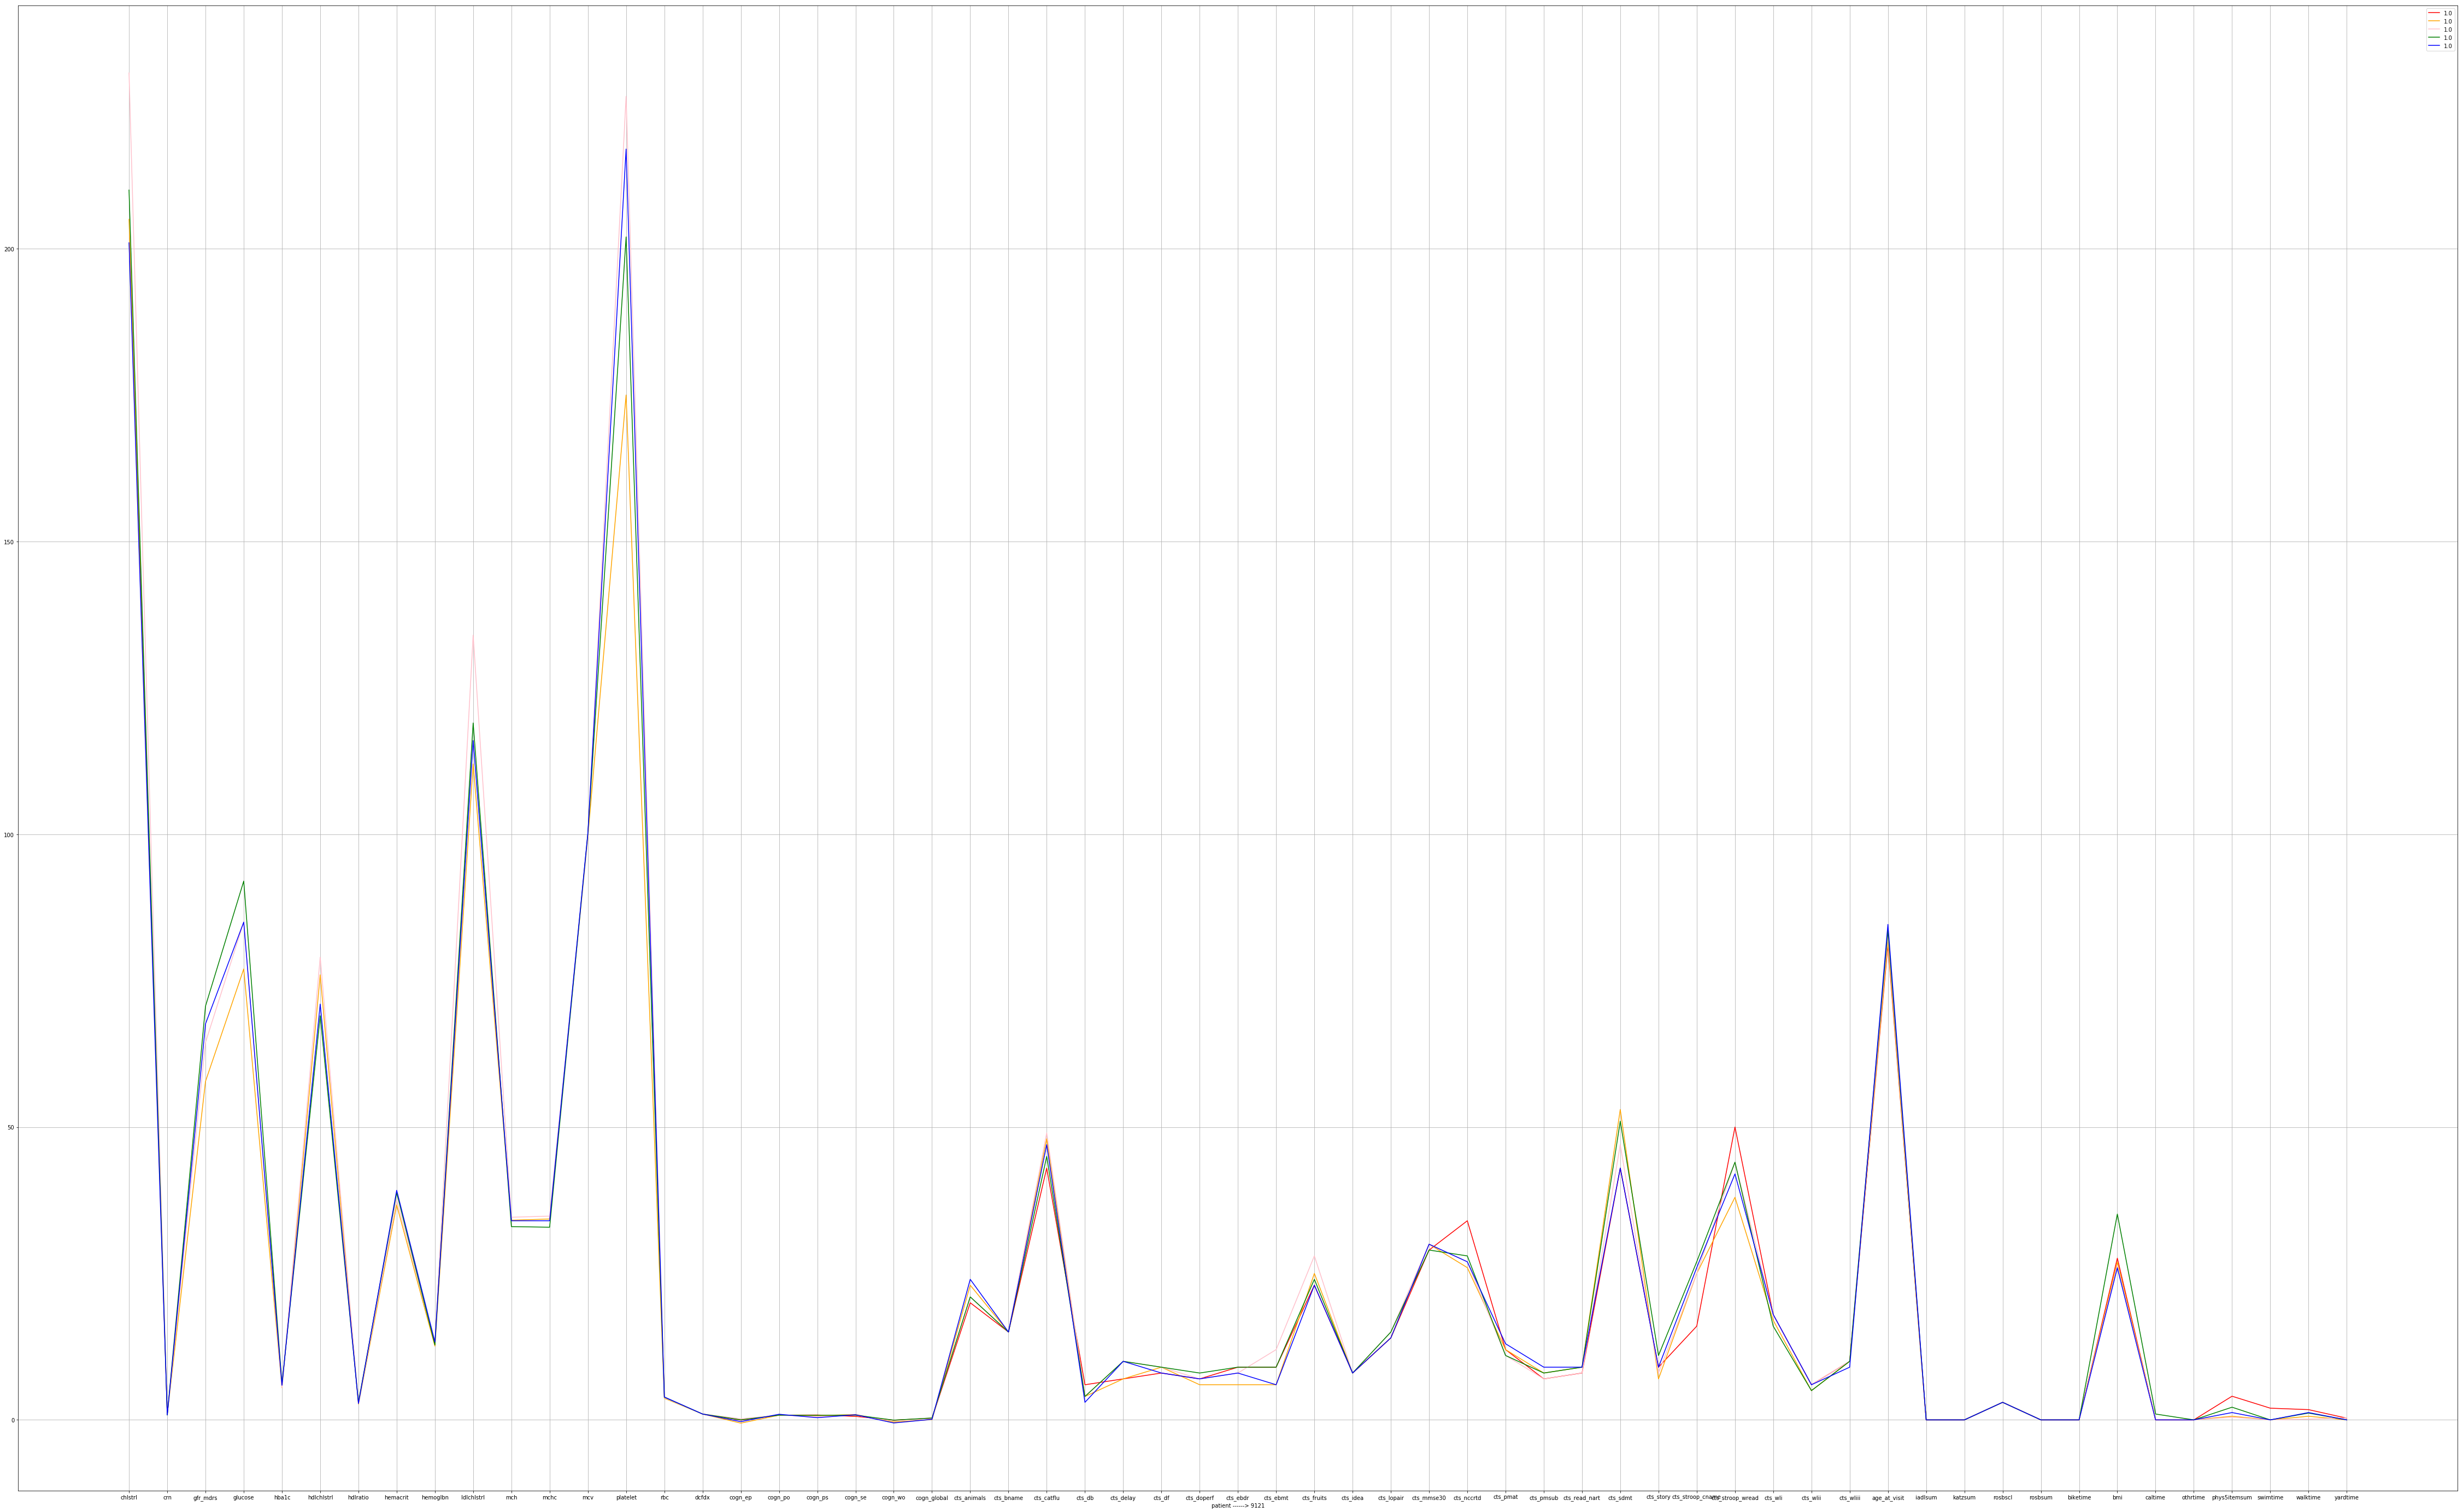

In [13]:
#list_of_patient_not_diagnosed
plt.figure(figsize=(80,50))
"""plt.plot(list_of_patient_diagnosed[0].iloc[1][5:64], \
         label='Diagnosed',color="red")
plt.plot(list_of_patient_diagnosed[0].iloc[2][5:64], \
         label='Not Diagnosed',color="green")"""

color = ["red","orange","pink","green","blue","indigo","violet","black","grey"]
# (red, orange, yellow, green, blue, indigo, violet)

for i in range(0,list_of_patient_not_diagnosed[0].shape[0]-1):
    plt.plot(list_of_patient_not_diagnosed[0].iloc[i][5:64], \
         label=list_of_patient_not_diagnosed[0].iloc[i]["dcfdx"],color=color[i])
    plt.xlabel('patient ------> ' + str(list_of_patient_not_diagnosed[0].iloc[i]["projid"]))


plt.legend(loc='best')
plt.grid()
plt.show()

# Schedule for the 2nd week - Summary
## Need to implement in this week
#### - T test
The t-test has been implemented for some of the interesting values, however, not all the values. I will be focusing on running the t-test for more values, after the validation I may start my next step, the normalization
#### - Normalization of all the data
#### - A speed of increase in all the attribute a.k.a the trend, to see if it can forcast anything to indicate the possible diagnose status

## Working on the T-test first
#### After the T test, I will be focus on the jump of patient data from stage 1 to stage 4. by doing this, I can see the change in data that is more significant compare to what I have now ---> First, I will need to filter the data by replace the originial |sort_cases function: The dcfdx_split_lvl will be altered, and a new var will be added.
###### dcfdx_split_lvl_1 = 1
###### dcfdx_split_lvl_2 = 4

In [14]:
def sort_cases_for_other_stages(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 4
    dcfdx_split_lvl_1 = 1     # diagnosed flag >= 4 diagnosed, smaller than 4 is not
    dcfdx_split_lvl_2 = 4
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2 or cleaned_df.iloc[row]['dcfdx'] == 5:
            # get the df row that is larger than 4
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that is smaller than 4
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_1, df_dcfdx_stage_4 = \
sort_cases_for_other_stages(data_set_cleaned)
print("sorting completed")

sorting completed


#### By doing the above I acquire the dataframe I needed for spotting the difference between the dcfdx = 1, and >= 4
#### These 2 df will be used to run a t-test first
But first, run a describe of these two DF, in the meantime, see the missing datas

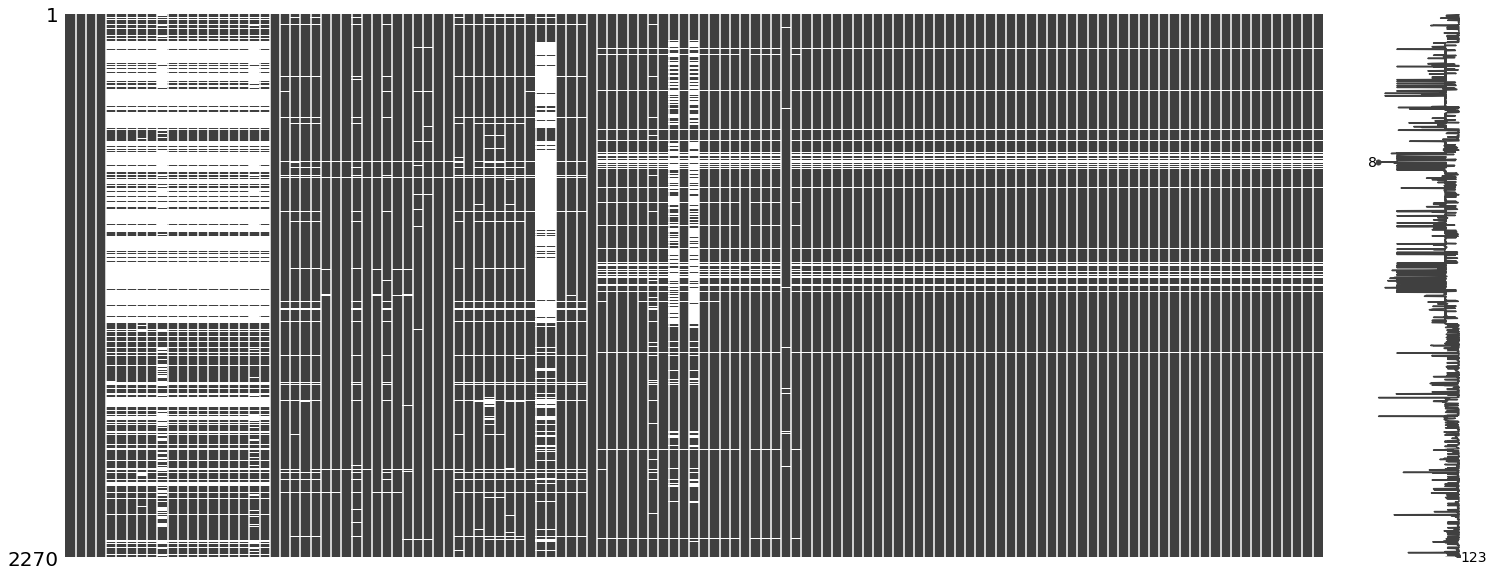

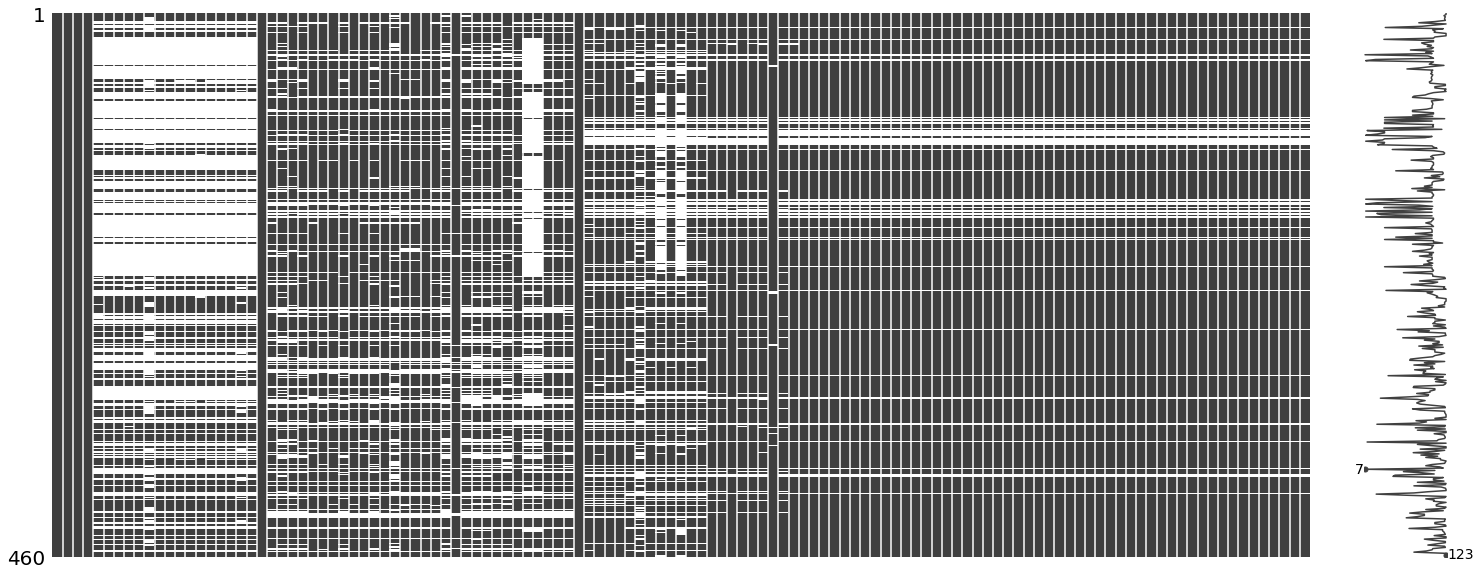

In [15]:
#missing data visualize
msno.matrix(df_dcfdx_stage_1)
msno.matrix(df_dcfdx_stage_4)

The percentage of missing data is relative the same.

In [16]:
stage_1_df_desc = df_dcfdx_stage_1.describe()
stage_4_df_desc = df_dcfdx_stage_4.describe()

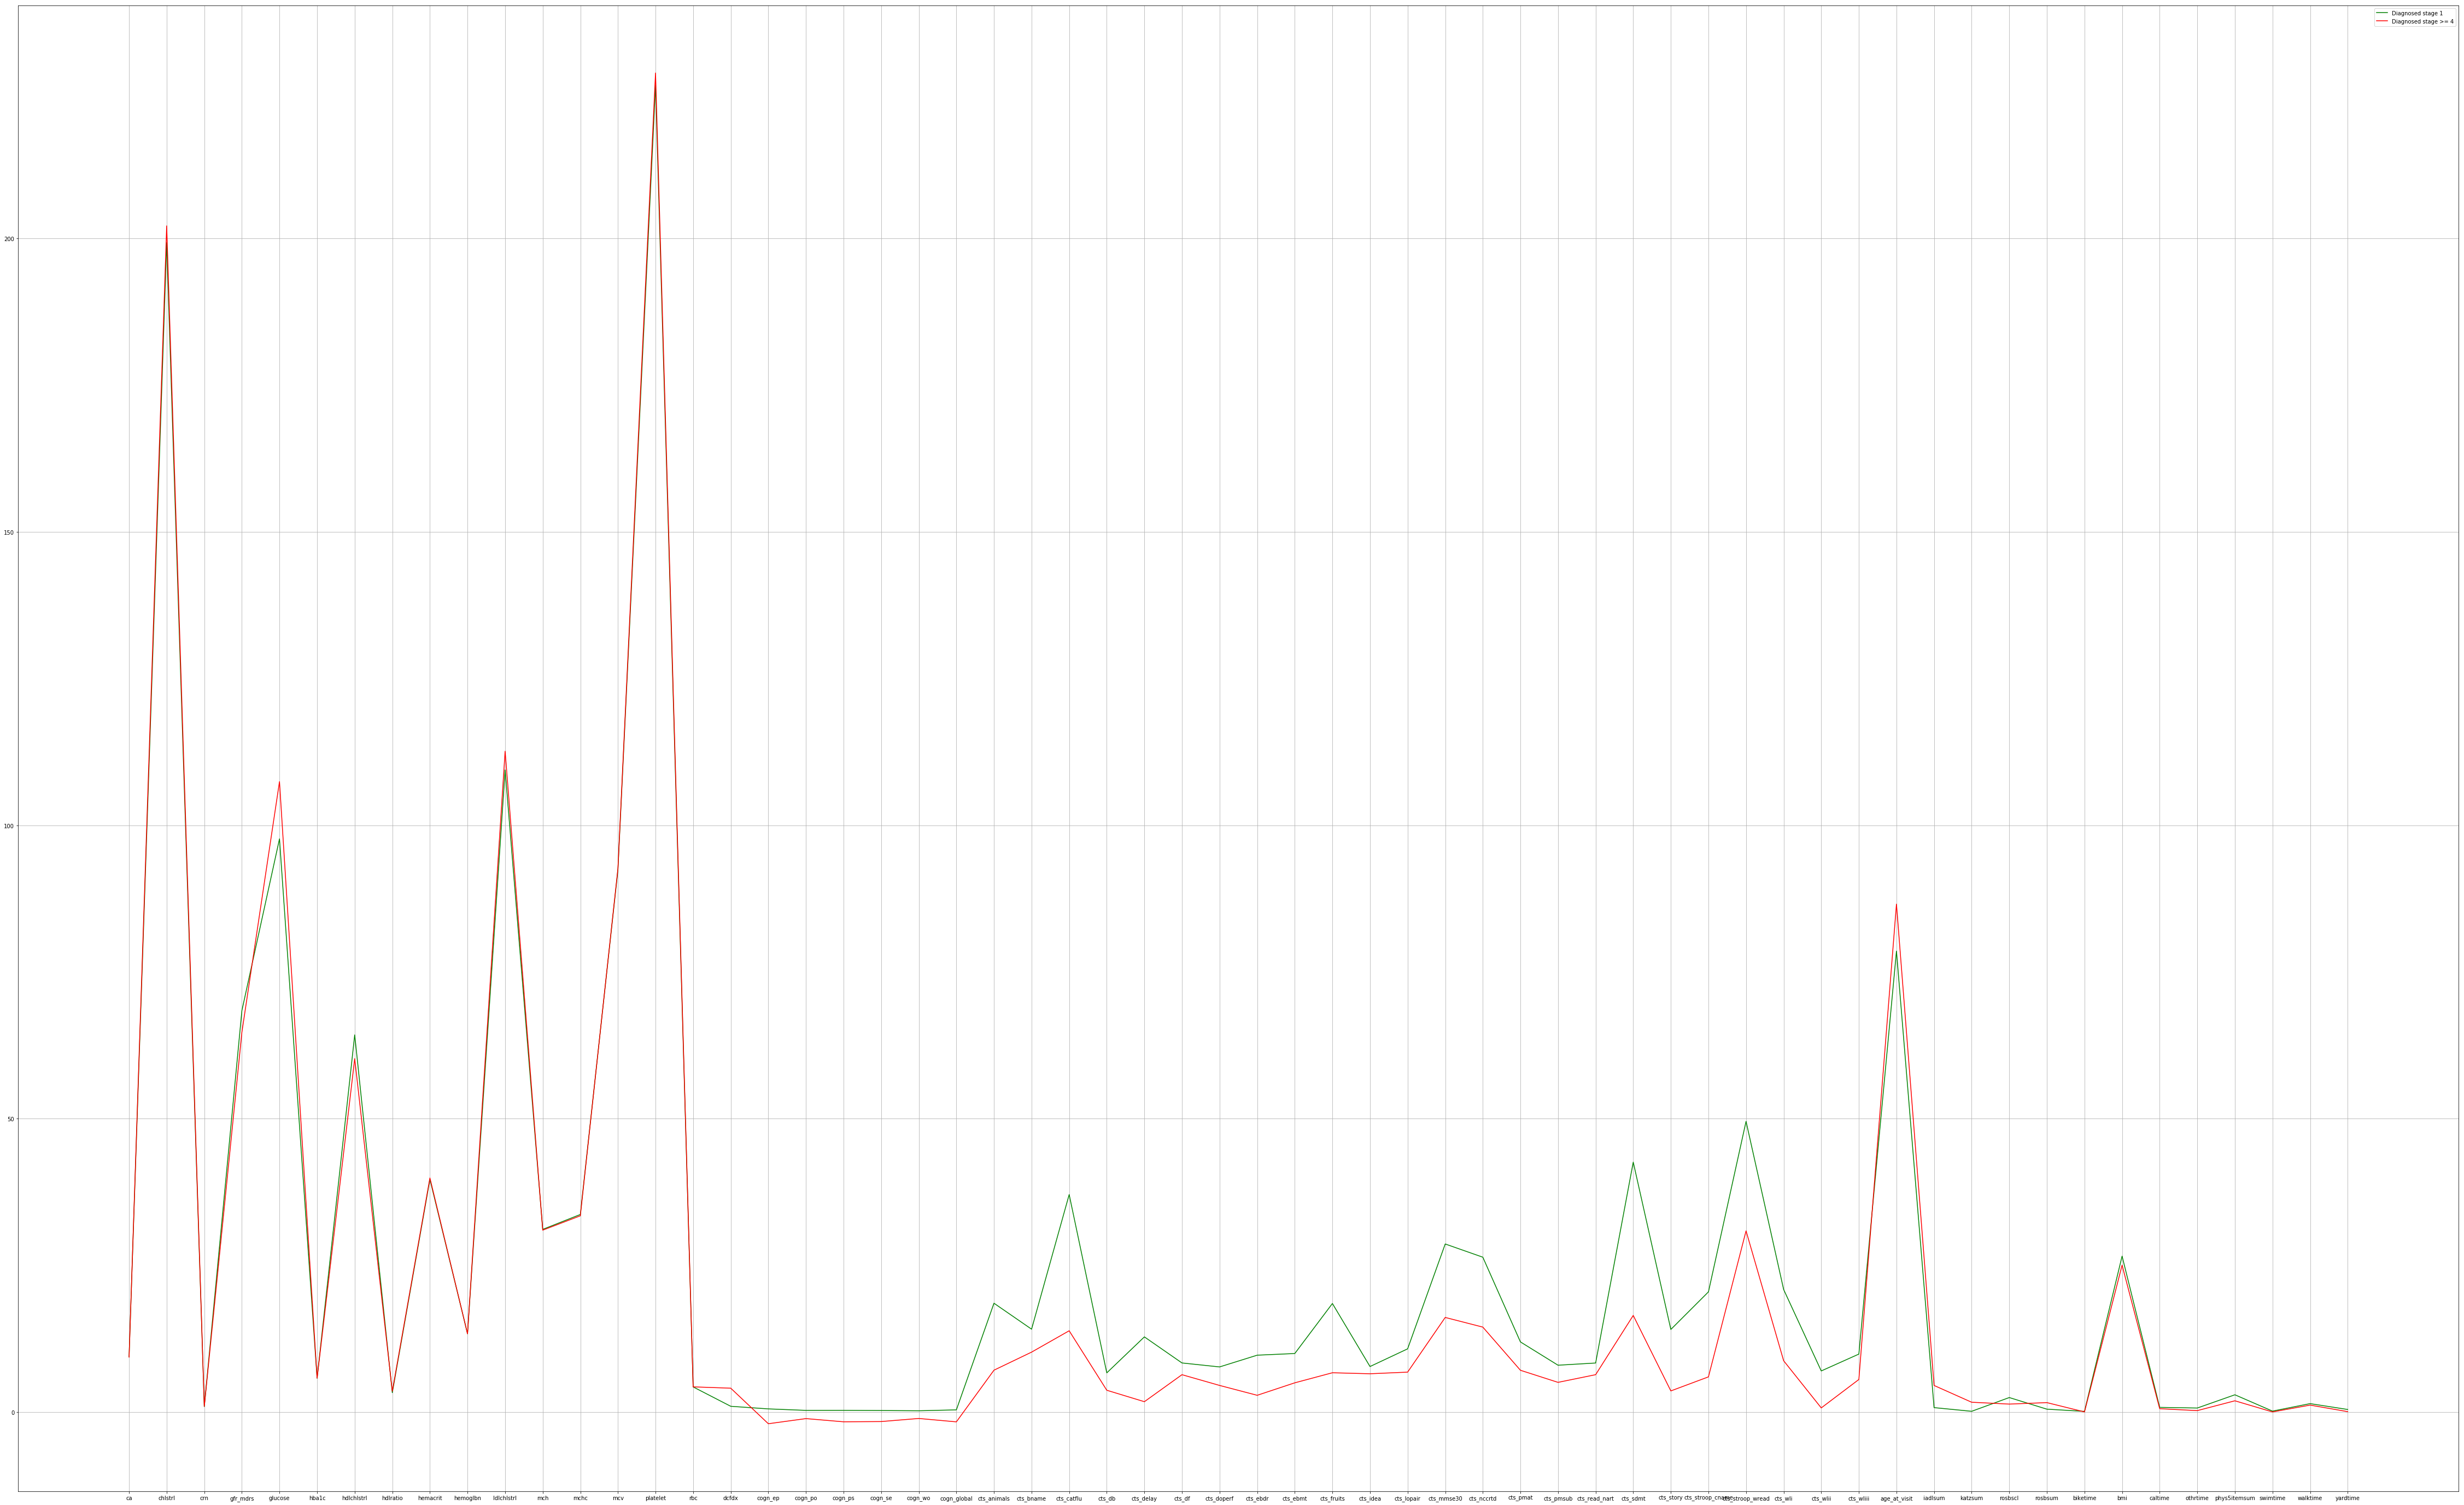

In [17]:
# plot the graph to compare these 2
plt.figure(figsize=(80,50))
plt.plot(stage_1_df_desc.iloc[1][:60], \
         label='Diagnosed stage 1',color="green")
plt.plot(stage_4_df_desc.iloc[1][:60], \
         label='Diagnosed stage >= 4',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

# This is the comparison of the stage lvl larger/equal to 4, and with the
# stage that is equals to one.

Based on the graph that is showned above, I think it is best for me to run a t test on these attributes:
    1. age_at_visit -- PASS = Very significant
    2. all the cts_* values -- PASS = all value is very significant
        - I think I will take a look at this stage by stage basis, and see if the score increase or descrease based on the stages
    3. glucose -- PASS
        - stage by stage basis needed to test out
    4. hdlchlstrl -- FAIL

In [18]:
col_name = "glucose"

stage_1_prep_t = df_dcfdx_stage_1[col_name][:]
stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
# need to drop the nan values
stage_1_prep_t = stage_1_prep_t.dropna()
stage_4_prep_t = stage_4_prep_t.dropna()

# now, for the t-test of glucose
ttest_ind(stage_1_prep_t, stage_4_prep_t)

Ttest_indResult(statistic=-4.778716286514621, pvalue=1.9781637997370076e-06)

#### The p = .08% this is much less than the 5% - PASS
#### The t-stat var, I am not sure, need to ask
Going to do the same thing for other values too

In [19]:
col_name = "age_at_visit"

stage_1_prep_t = df_dcfdx_stage_1[col_name][:]
stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
# need to drop the nan values
stage_1_prep_t = stage_1_prep_t.dropna()
stage_4_prep_t = stage_4_prep_t.dropna()

# now, for the t-test of glucose
ttest_ind(stage_1_prep_t, stage_4_prep_t)

Ttest_indResult(statistic=-20.283829255354245, pvalue=2.5746617015563703e-85)

In [20]:
col_name = "cogn_global"

stage_1_prep_t = df_dcfdx_stage_1[col_name][:]
stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
# need to drop the nan values
stage_1_prep_t = stage_1_prep_t.dropna()
stage_4_prep_t = stage_4_prep_t.dropna()

# now, for the t-test of glucose
ttest_ind(stage_1_prep_t, stage_4_prep_t)

#some very significant values occur here, age

Ttest_indResult(statistic=69.78123197430074, pvalue=0.0)

#### Next:
going to need a loop for the cts, cogn is avoided, since cts is the test scroe of cogn -- cogn cts is just different repsentation of the samething.

In [21]:
cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_1_prep_t = df_dcfdx_stage_1[col_name][:]
    stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
    stage_1_prep_t = stage_1_prep_t.dropna()
    stage_4_prep_t = stage_4_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_1_prep_t, stage_4_prep_t))
for result in t_test_result_list:
    print(result)

Ttest_indResult(statistic=46.98579423399294, pvalue=0.0)
Ttest_indResult(statistic=57.70663796734572, pvalue=0.0)
Ttest_indResult(statistic=61.260147437761034, pvalue=0.0)
Ttest_indResult(statistic=46.08153525800171, pvalue=0.0)
Ttest_indResult(statistic=58.060879096583584, pvalue=0.0)
Ttest_indResult(statistic=46.11718107947041, pvalue=0.0)
Ttest_indResult(statistic=45.34780190421394, pvalue=0.0)
Ttest_indResult(statistic=40.28766737807691, pvalue=3.0018237955993297e-274)
Ttest_indResult(statistic=46.666259291903216, pvalue=0.0)
Ttest_indResult(statistic=14.724209523141642, pvalue=4.326751185808478e-47)
Ttest_indResult(statistic=17.57093224781735, pvalue=1.9216118932693417e-65)
Ttest_indResult(statistic=26.31642988508673, pvalue=1.1774229506886252e-135)
Ttest_indResult(statistic=30.744211860178865, pvalue=6.387742851743027e-177)
Ttest_indResult(statistic=21.98702332605162, pvalue=6.184038476891078e-98)
Ttest_indResult(statistic=28.473842419271715, pvalue=7.234872574062398e-154)
Ttest_

## Some conclusion about all the t test:
There are something significant with the cts_* attributes, need to dig in
There are something significant about the glucose, also need to dig in
-- In the meantime, I denied last time the time spent outside attr has effect, but I revisit the graph, since I did not normalized the data, there might be something there can reflect the final outcome, going to do a t-test and a graph that is focus on the mean specifically based on that section of the data

### Below is a stage 1 and stage 2 comparison

sorting completed


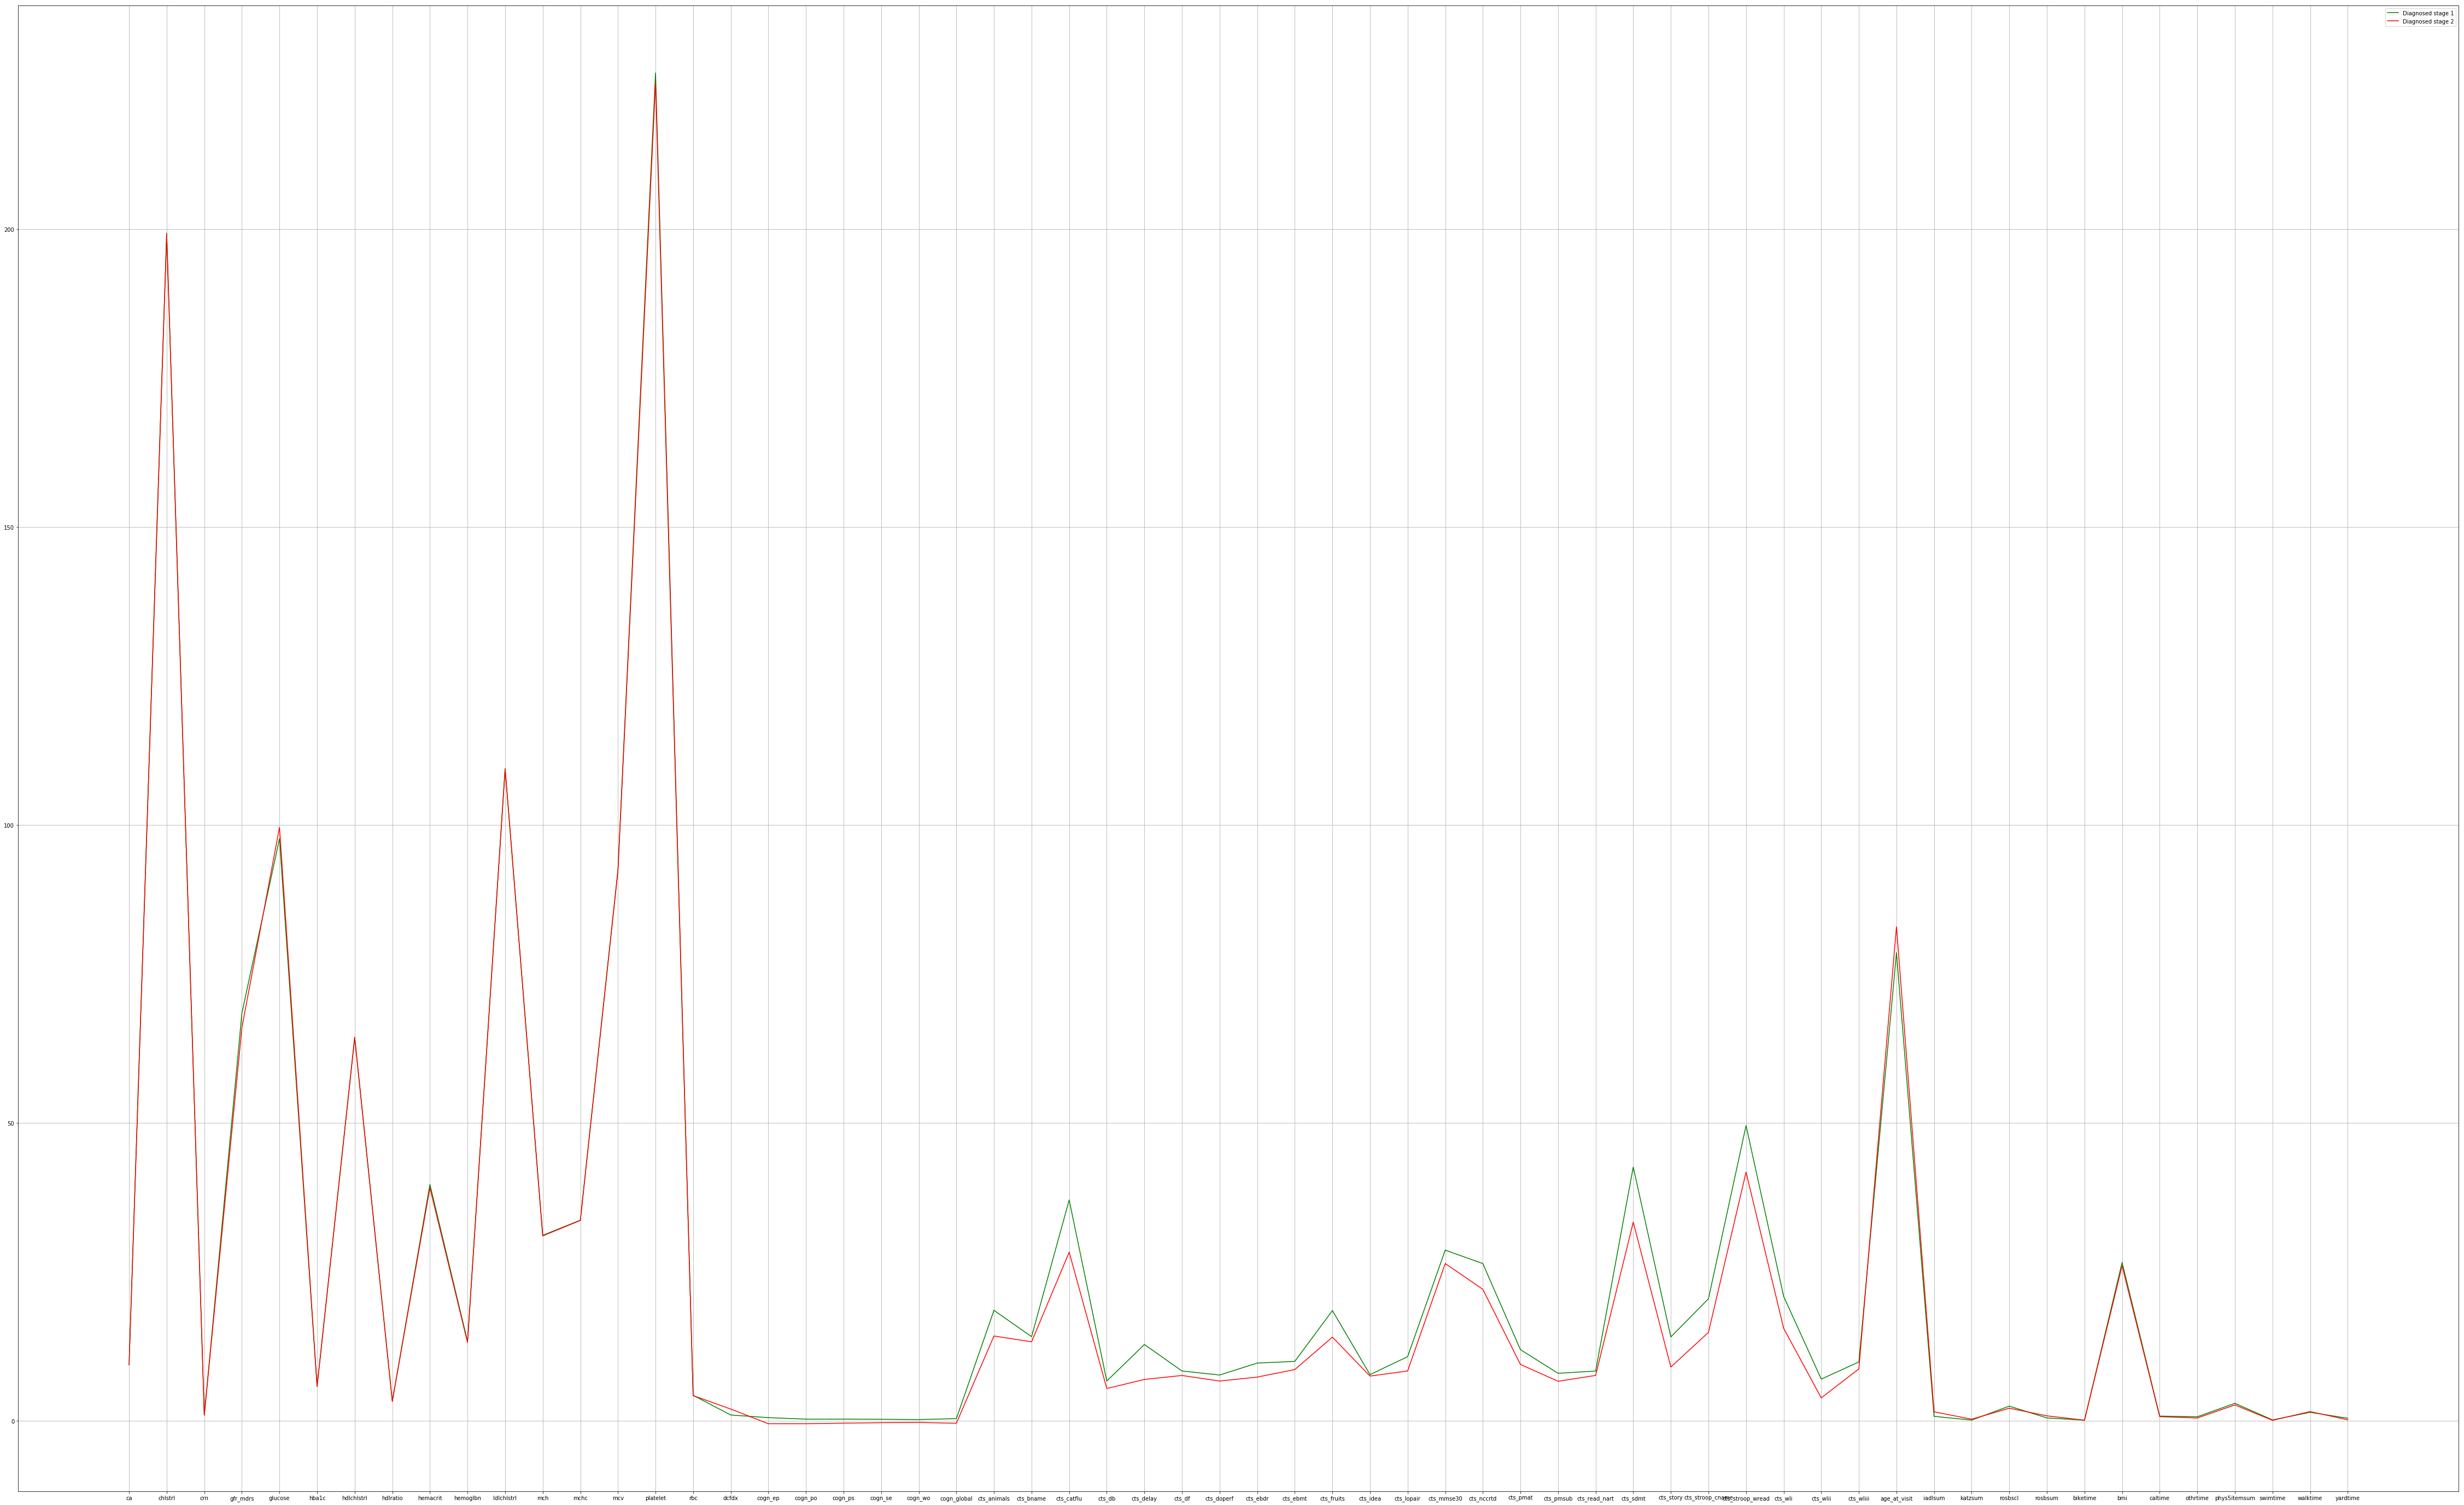

Ttest_indResult(statistic=26.2197578547802, pvalue=5.910839007608974e-136)
Ttest_indResult(statistic=32.917522965649, pvalue=8.634833413996374e-202)
Ttest_indResult(statistic=26.610082559409243, pvalue=1.3291655262236696e-139)
Ttest_indResult(statistic=17.61658203600261, pvalue=4.142458989899231e-66)
Ttest_indResult(statistic=24.168912167940032, pvalue=8.086809270426864e-118)
Ttest_indResult(statistic=27.05141783032032, pvalue=1.0316251627063106e-143)
Ttest_indResult(statistic=29.205901945418038, pvalue=2.5441333432578305e-164)
Ttest_indResult(statistic=15.781820281962188, pvalue=7.705572829384891e-54)
Ttest_indResult(statistic=22.40826885222885, pvalue=7.511784341617286e-103)
Ttest_indResult(statistic=7.546947760951801, pvalue=5.996787277377676e-14)
Ttest_indResult(statistic=8.771786105045766, pvalue=2.9191719635268196e-18)
Ttest_indResult(statistic=14.546906276848746, pvalue=2.4077586940203395e-46)
Ttest_indResult(statistic=14.012991128650361, pvalue=3.202129538512473e-43)
Ttest_indR

In [22]:
# now I am going to split the data again with the slicing as stage 1 and stage 2 to see if there are any difference 
# that is significant between, then I will be running a t-test for the cognition section
def sort_cases_for_other_stages_1and2(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 2
    dcfdx_split_lvl_1 = 1     # diagnosed flag == 2 diagnosed, smaller than 2 is not
    dcfdx_split_lvl_2 = 2
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is larger than 2
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that is smaller than 1
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_1, df_dcfdx_stage_2 = \
sort_cases_for_other_stages_1and2(data_set_cleaned)
print("sorting completed")

stage_1_df_desc = df_dcfdx_stage_1.describe()
stage_2_df_desc = df_dcfdx_stage_2.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_1_df_desc.iloc[1][:60], \
         label='Diagnosed stage 1',color="green")
plt.plot(stage_2_df_desc.iloc[1][:60], \
         label='Diagnosed stage 2',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_1_prep_t = df_dcfdx_stage_1[col_name][:]
    stage_2_prep_t = df_dcfdx_stage_2[col_name][:]
    stage_1_prep_t = stage_1_prep_t.dropna()
    stage_2_prep_t = stage_2_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_1_prep_t, stage_2_prep_t))
for result in t_test_result_list:
    print(result)

# now I want to compare the cogn score of the 2 DF
# this is the DF of stage 1 compare to the DF of stage 2
# we can see here the cognition test score is still really shows the difference
# and the t-test supports my idea

### Next I am going to look at the stage 2 and stage 3 comparison:

sorting completed


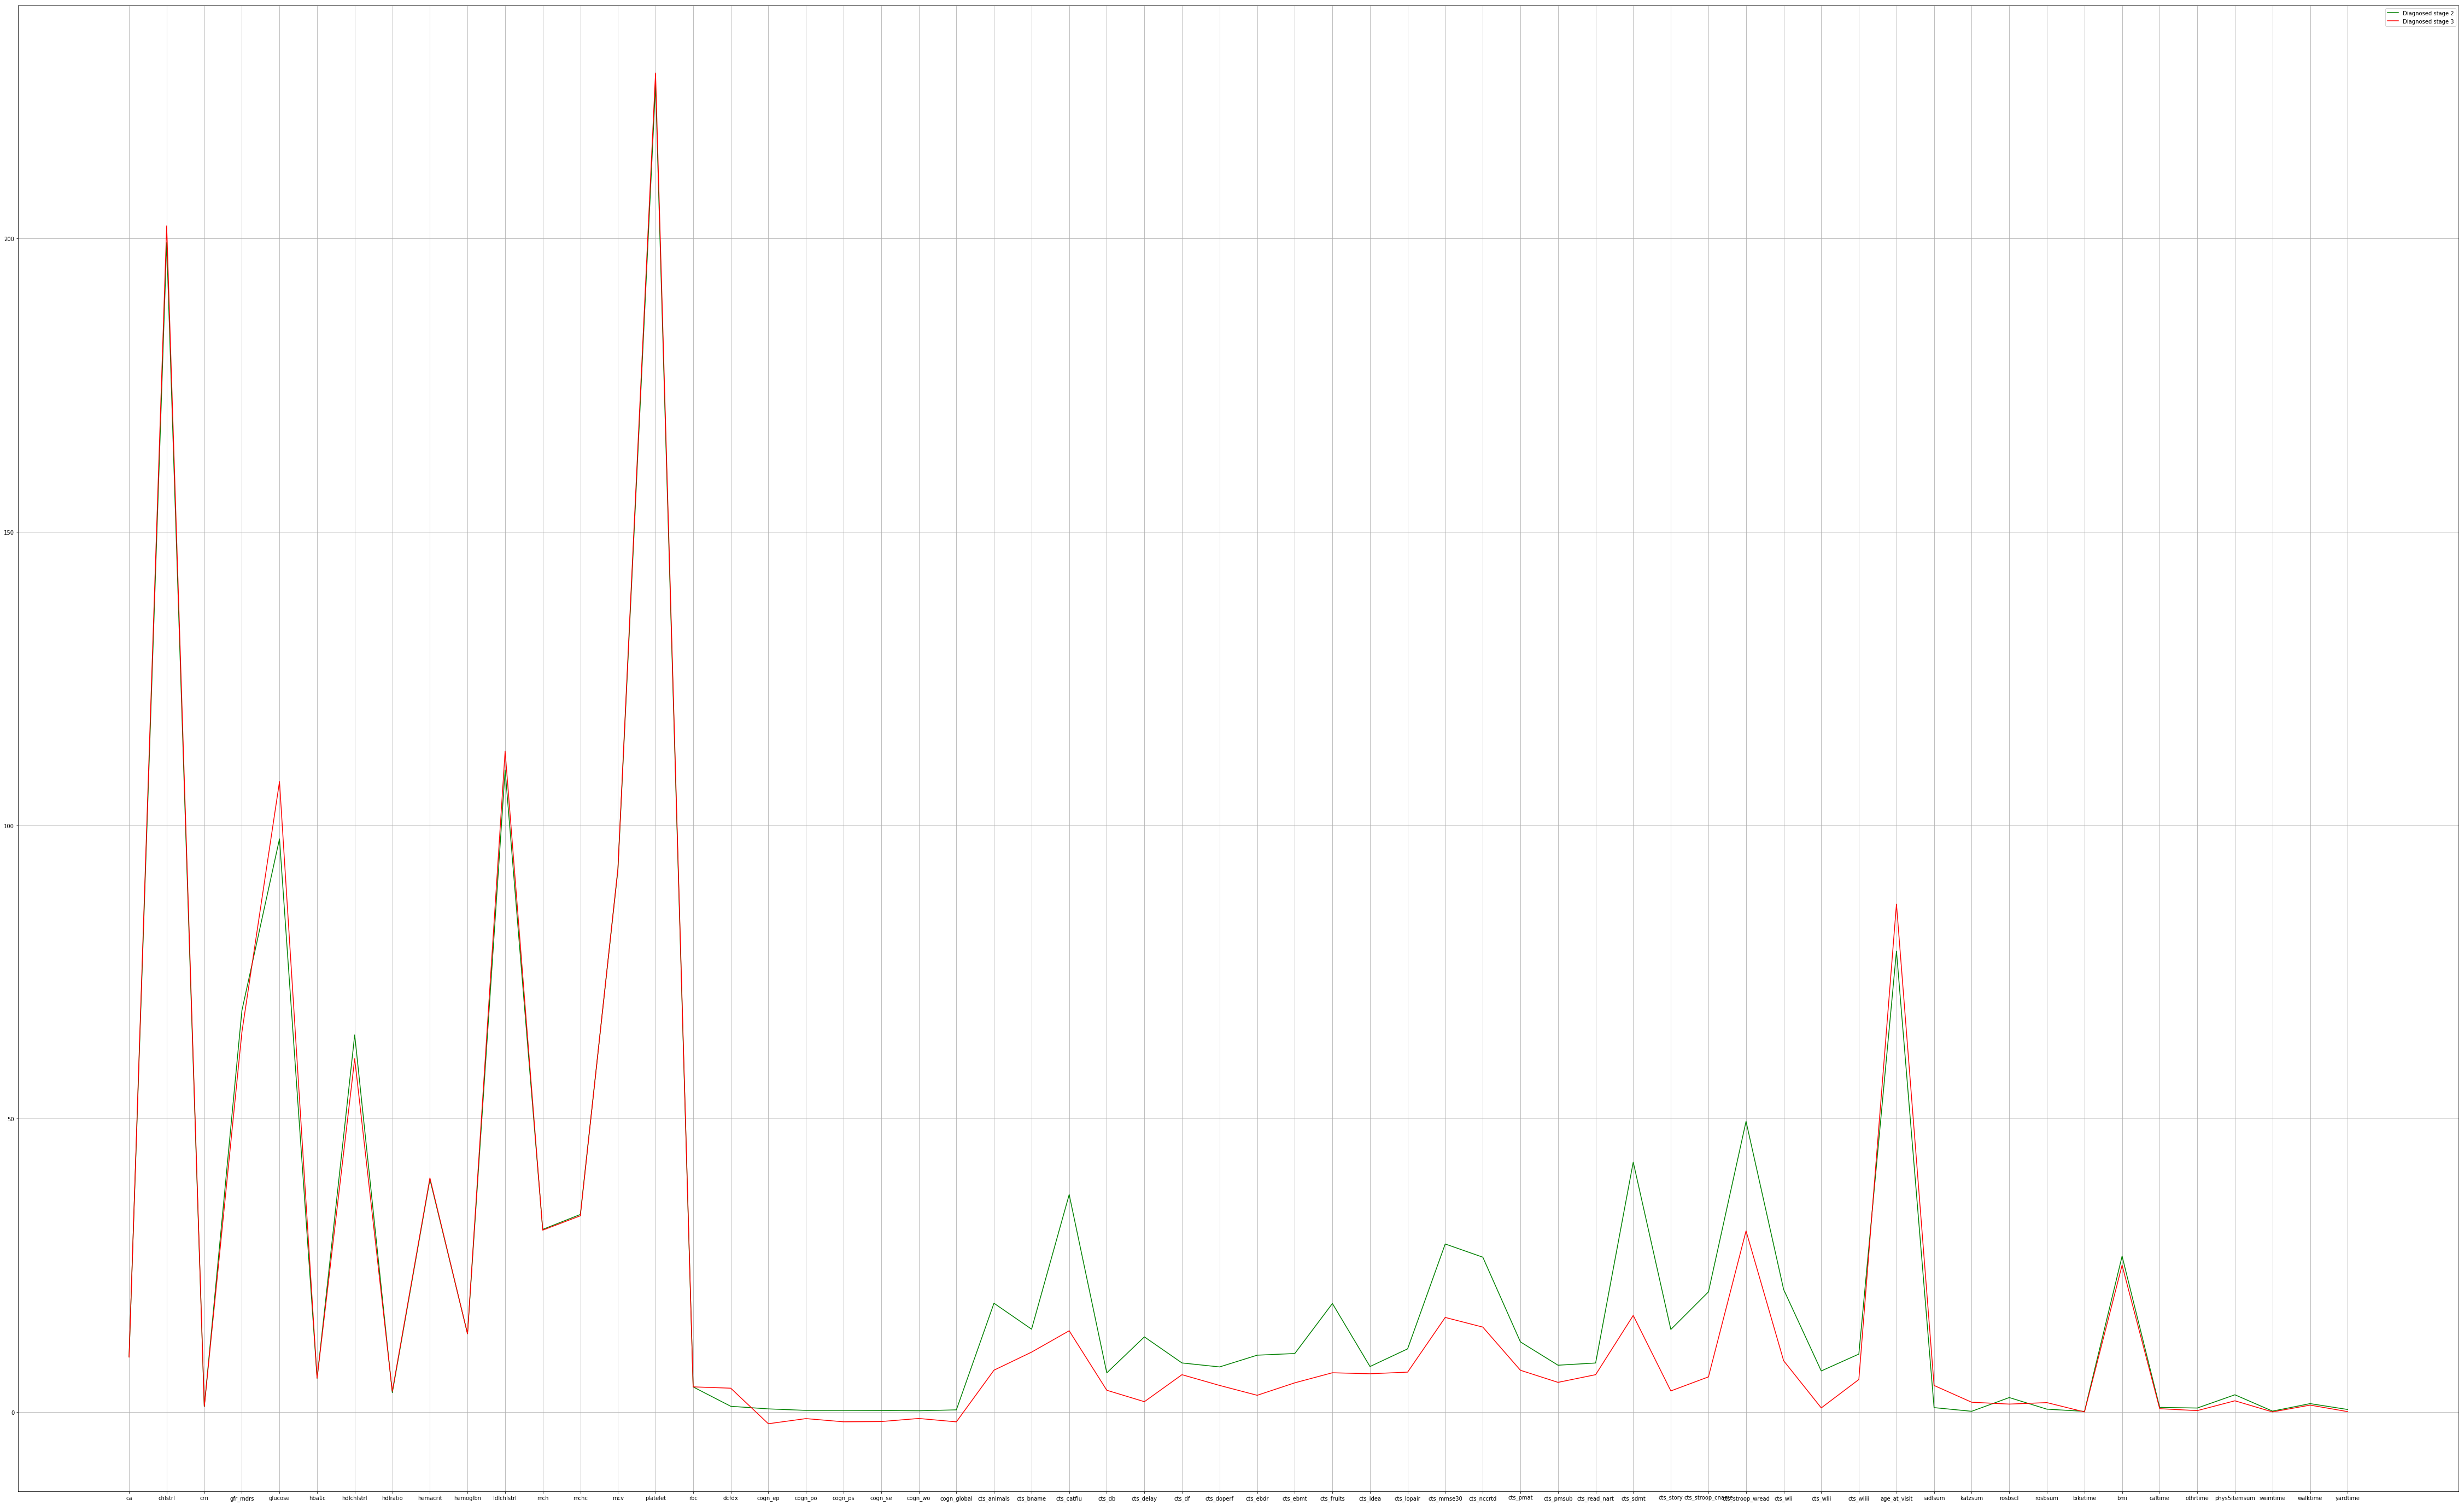

Ttest_indResult(statistic=46.98579423399294, pvalue=0.0)
Ttest_indResult(statistic=57.70663796734572, pvalue=0.0)
Ttest_indResult(statistic=61.260147437761034, pvalue=0.0)
Ttest_indResult(statistic=46.08153525800171, pvalue=0.0)
Ttest_indResult(statistic=58.060879096583584, pvalue=0.0)
Ttest_indResult(statistic=46.11718107947041, pvalue=0.0)
Ttest_indResult(statistic=45.34780190421394, pvalue=0.0)
Ttest_indResult(statistic=40.28766737807691, pvalue=3.0018237955993297e-274)
Ttest_indResult(statistic=46.666259291903216, pvalue=0.0)
Ttest_indResult(statistic=14.724209523141642, pvalue=4.326751185808478e-47)
Ttest_indResult(statistic=17.57093224781735, pvalue=1.9216118932693417e-65)
Ttest_indResult(statistic=26.31642988508673, pvalue=1.1774229506886252e-135)
Ttest_indResult(statistic=30.744211860178865, pvalue=6.387742851743027e-177)
Ttest_indResult(statistic=21.98702332605162, pvalue=6.184038476891078e-98)
Ttest_indResult(statistic=28.473842419271715, pvalue=7.234872574062398e-154)
Ttest_

In [23]:
# now I am going to split the data again with the slicing as stage 1 and stage 2 to see if there are any difference 
# that is significant between, then I will be running a t-test for the cognition section
def sort_cases_for_other_stages_2and3(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 2
    dcfdx_split_lvl_1 = 2     # diagnosed flag == 2 diagnosed, smaller than 3 is not
    dcfdx_split_lvl_2 = 3
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is larger than 3
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that is smaller than 2
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_2, df_dcfdx_stage_3 = \
sort_cases_for_other_stages(data_set_cleaned)
print("sorting completed")


stage_2_df_desc = df_dcfdx_stage_2.describe()
stage_3_df_desc = df_dcfdx_stage_3.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_2_df_desc.iloc[1][:60], \
         label='Diagnosed stage 2',color="green")
plt.plot(stage_3_df_desc.iloc[1][:60], \
         label='Diagnosed stage 3',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_2_prep_t = df_dcfdx_stage_2[col_name][:]
    stage_3_prep_t = df_dcfdx_stage_3[col_name][:]
    stage_2_prep_t = stage_2_prep_t.dropna()
    stage_3_prep_t = stage_3_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_2_prep_t, stage_3_prep_t))
for result in t_test_result_list:
    print(result)

# now I want to compare the cogn score of the 2 DF
# this is the DF of stage 2 compare to the DF of stage 3
# we can see here the cognition test score is still really shows the difference
# and the t-test supports my idea

### Compare the 2 and 4

sorting completed


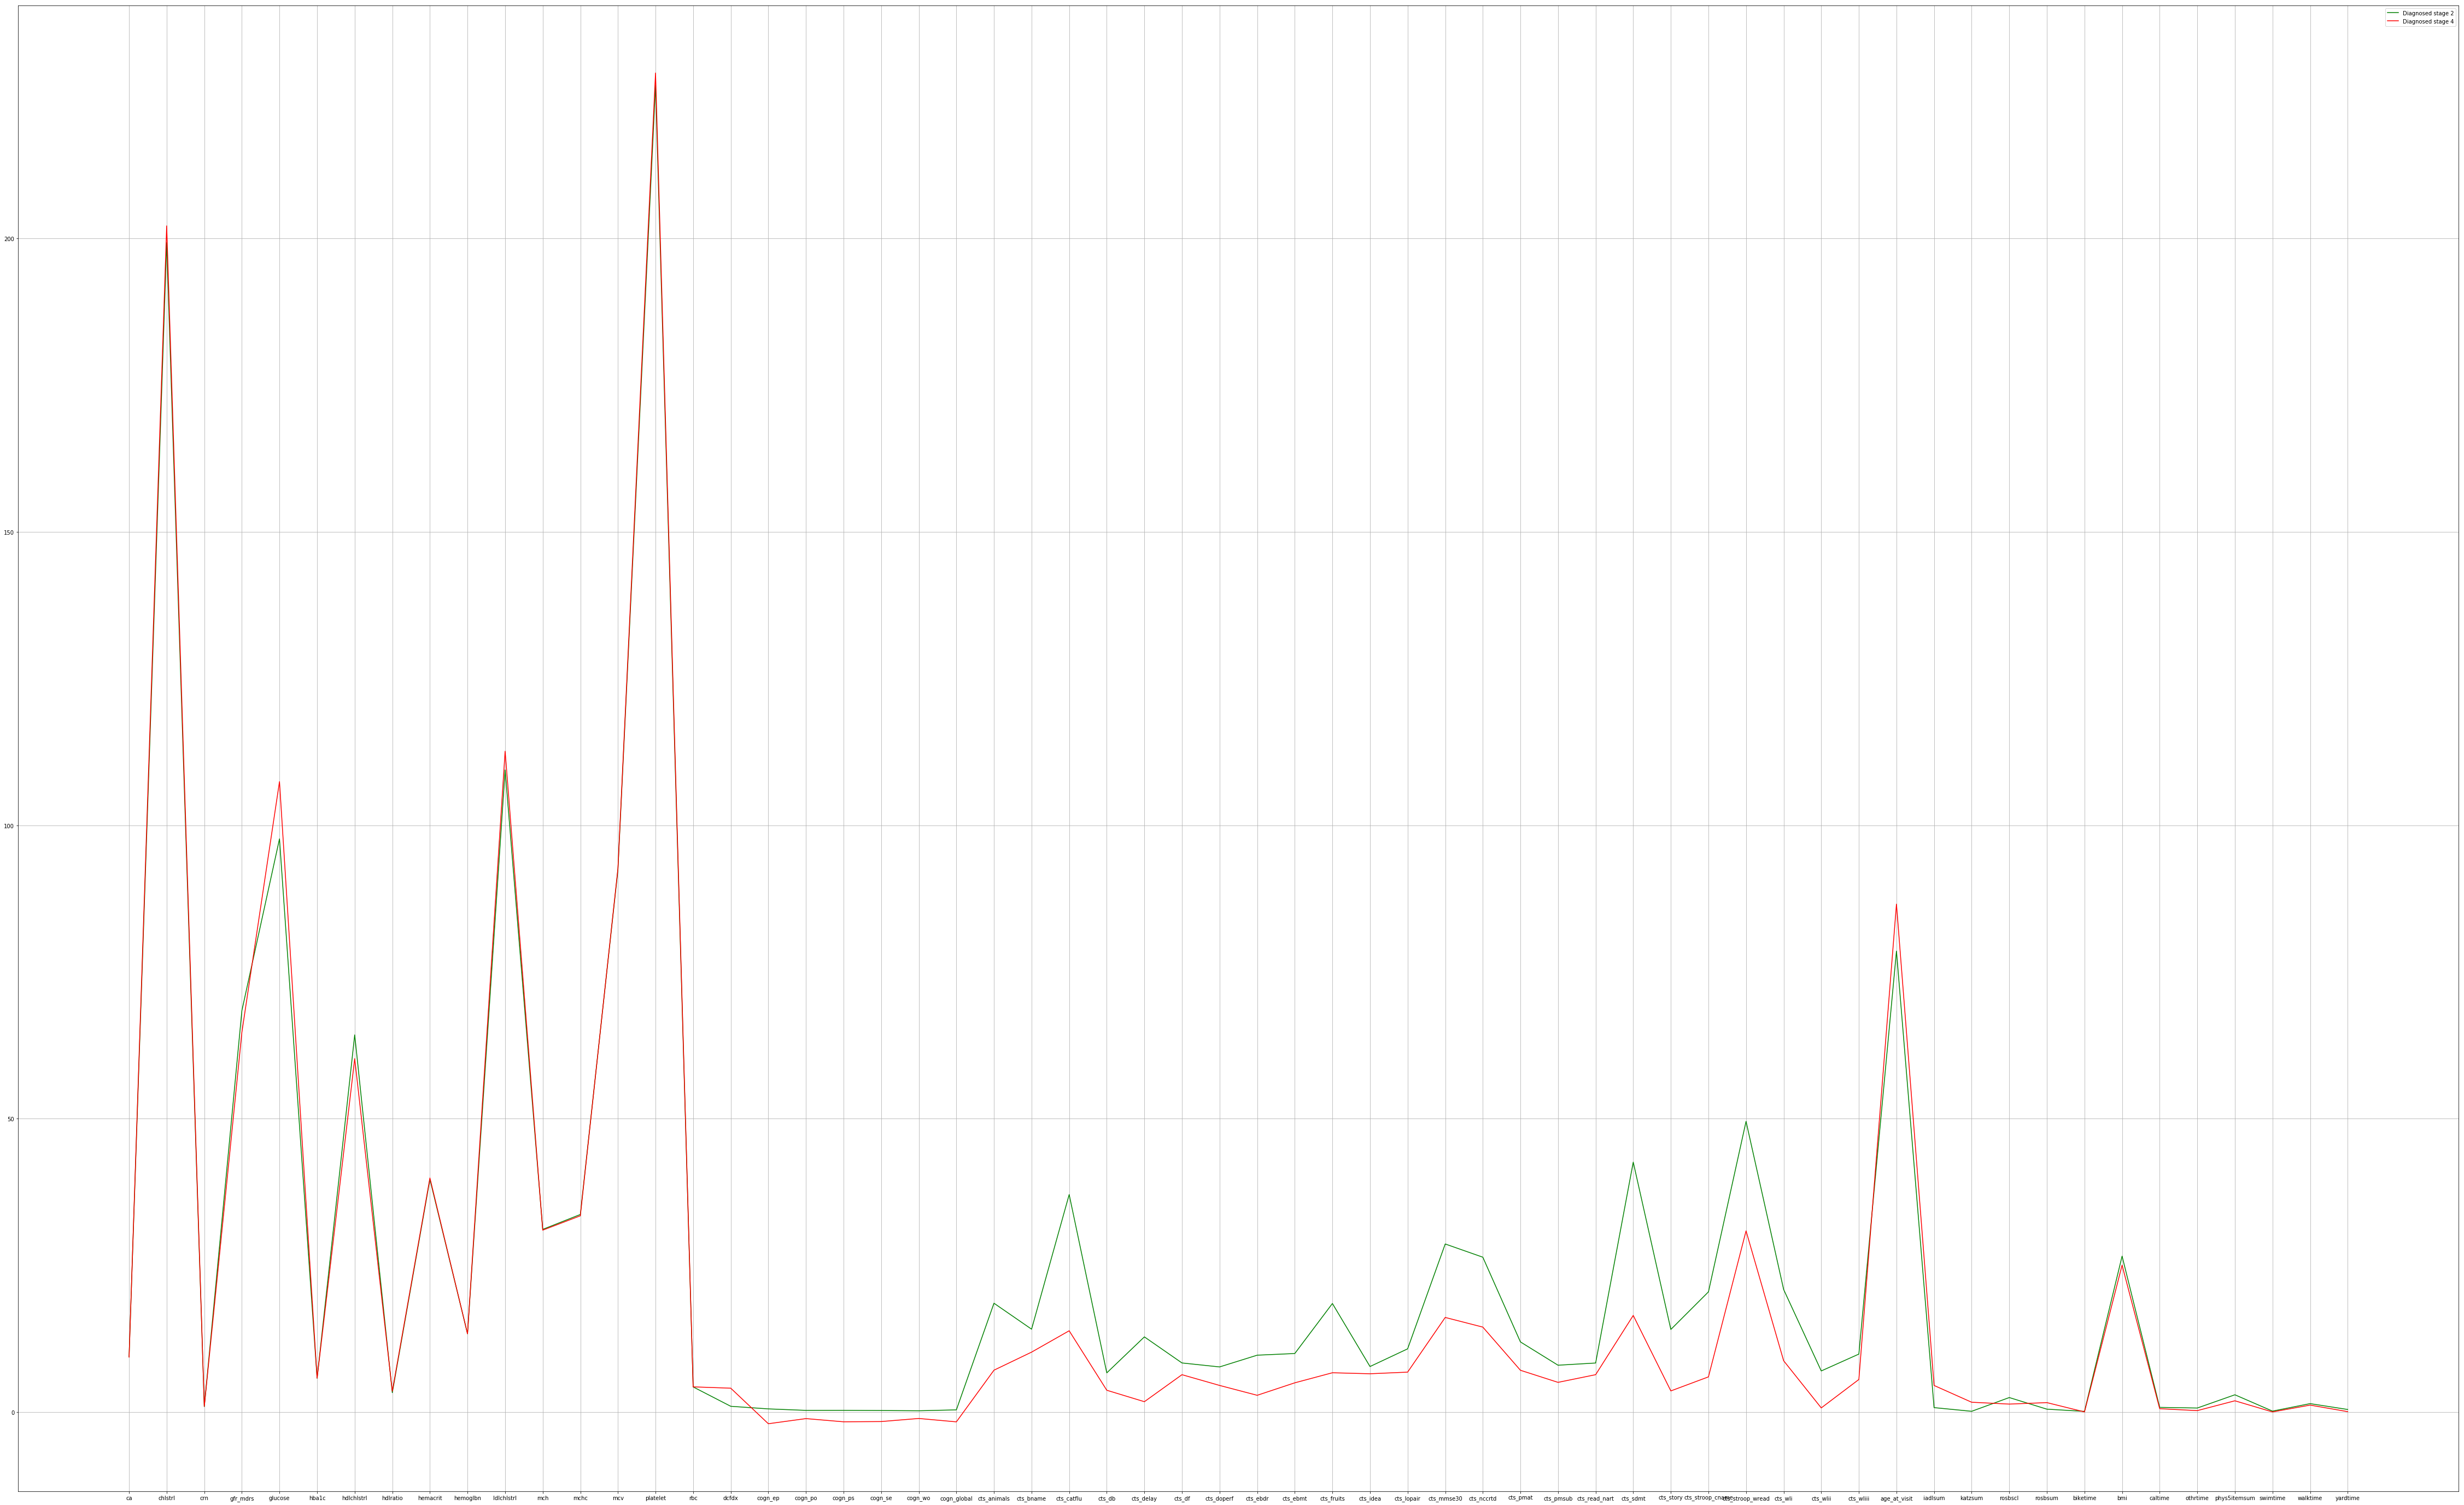

Ttest_indResult(statistic=46.98579423399294, pvalue=0.0)
Ttest_indResult(statistic=57.70663796734572, pvalue=0.0)
Ttest_indResult(statistic=61.260147437761034, pvalue=0.0)
Ttest_indResult(statistic=46.08153525800171, pvalue=0.0)
Ttest_indResult(statistic=58.060879096583584, pvalue=0.0)
Ttest_indResult(statistic=46.11718107947041, pvalue=0.0)
Ttest_indResult(statistic=45.34780190421394, pvalue=0.0)
Ttest_indResult(statistic=40.28766737807691, pvalue=3.0018237955993297e-274)
Ttest_indResult(statistic=46.666259291903216, pvalue=0.0)
Ttest_indResult(statistic=14.724209523141642, pvalue=4.326751185808478e-47)
Ttest_indResult(statistic=17.57093224781735, pvalue=1.9216118932693417e-65)
Ttest_indResult(statistic=26.31642988508673, pvalue=1.1774229506886252e-135)
Ttest_indResult(statistic=30.744211860178865, pvalue=6.387742851743027e-177)
Ttest_indResult(statistic=21.98702332605162, pvalue=6.184038476891078e-98)
Ttest_indResult(statistic=28.473842419271715, pvalue=7.234872574062398e-154)
Ttest_

In [24]:
# now I am going to split the data again with the slicing as stage 1 and stage 2 to see if there are any difference 
# that is significant between, then I will be running a t-test for the cognition section
def sort_cases_for_other_stages_2and4(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 2
    dcfdx_split_lvl_1 = 2     # diagnosed flag == 2 diagnosed, smaller than 3 is not
    dcfdx_split_lvl_2 = 4
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is larger than 4
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that is smaller than 2
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_2, df_dcfdx_stage_4 = \
sort_cases_for_other_stages(data_set_cleaned)
print("sorting completed")


stage_2_df_desc = df_dcfdx_stage_2.describe()
stage_4_df_desc = df_dcfdx_stage_4.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_2_df_desc.iloc[1][:60], \
         label='Diagnosed stage 2',color="green")
plt.plot(stage_4_df_desc.iloc[1][:60], \
         label='Diagnosed stage 4',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_2_prep_t = df_dcfdx_stage_2[col_name][:]
    stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
    stage_2_prep_t = stage_2_prep_t.dropna()
    stage_4_prep_t = stage_4_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_2_prep_t, stage_4_prep_t))
for result in t_test_result_list:
    print(result)

# now I want to compare the cogn score of the 2 DF
# this is the DF of stage 2 compare to the DF of stage 4
# we can see here the cognition test score is still really shows the difference
# and the t-test supports my idea

### Below is stage 3 compare to stage 4

sorting completed


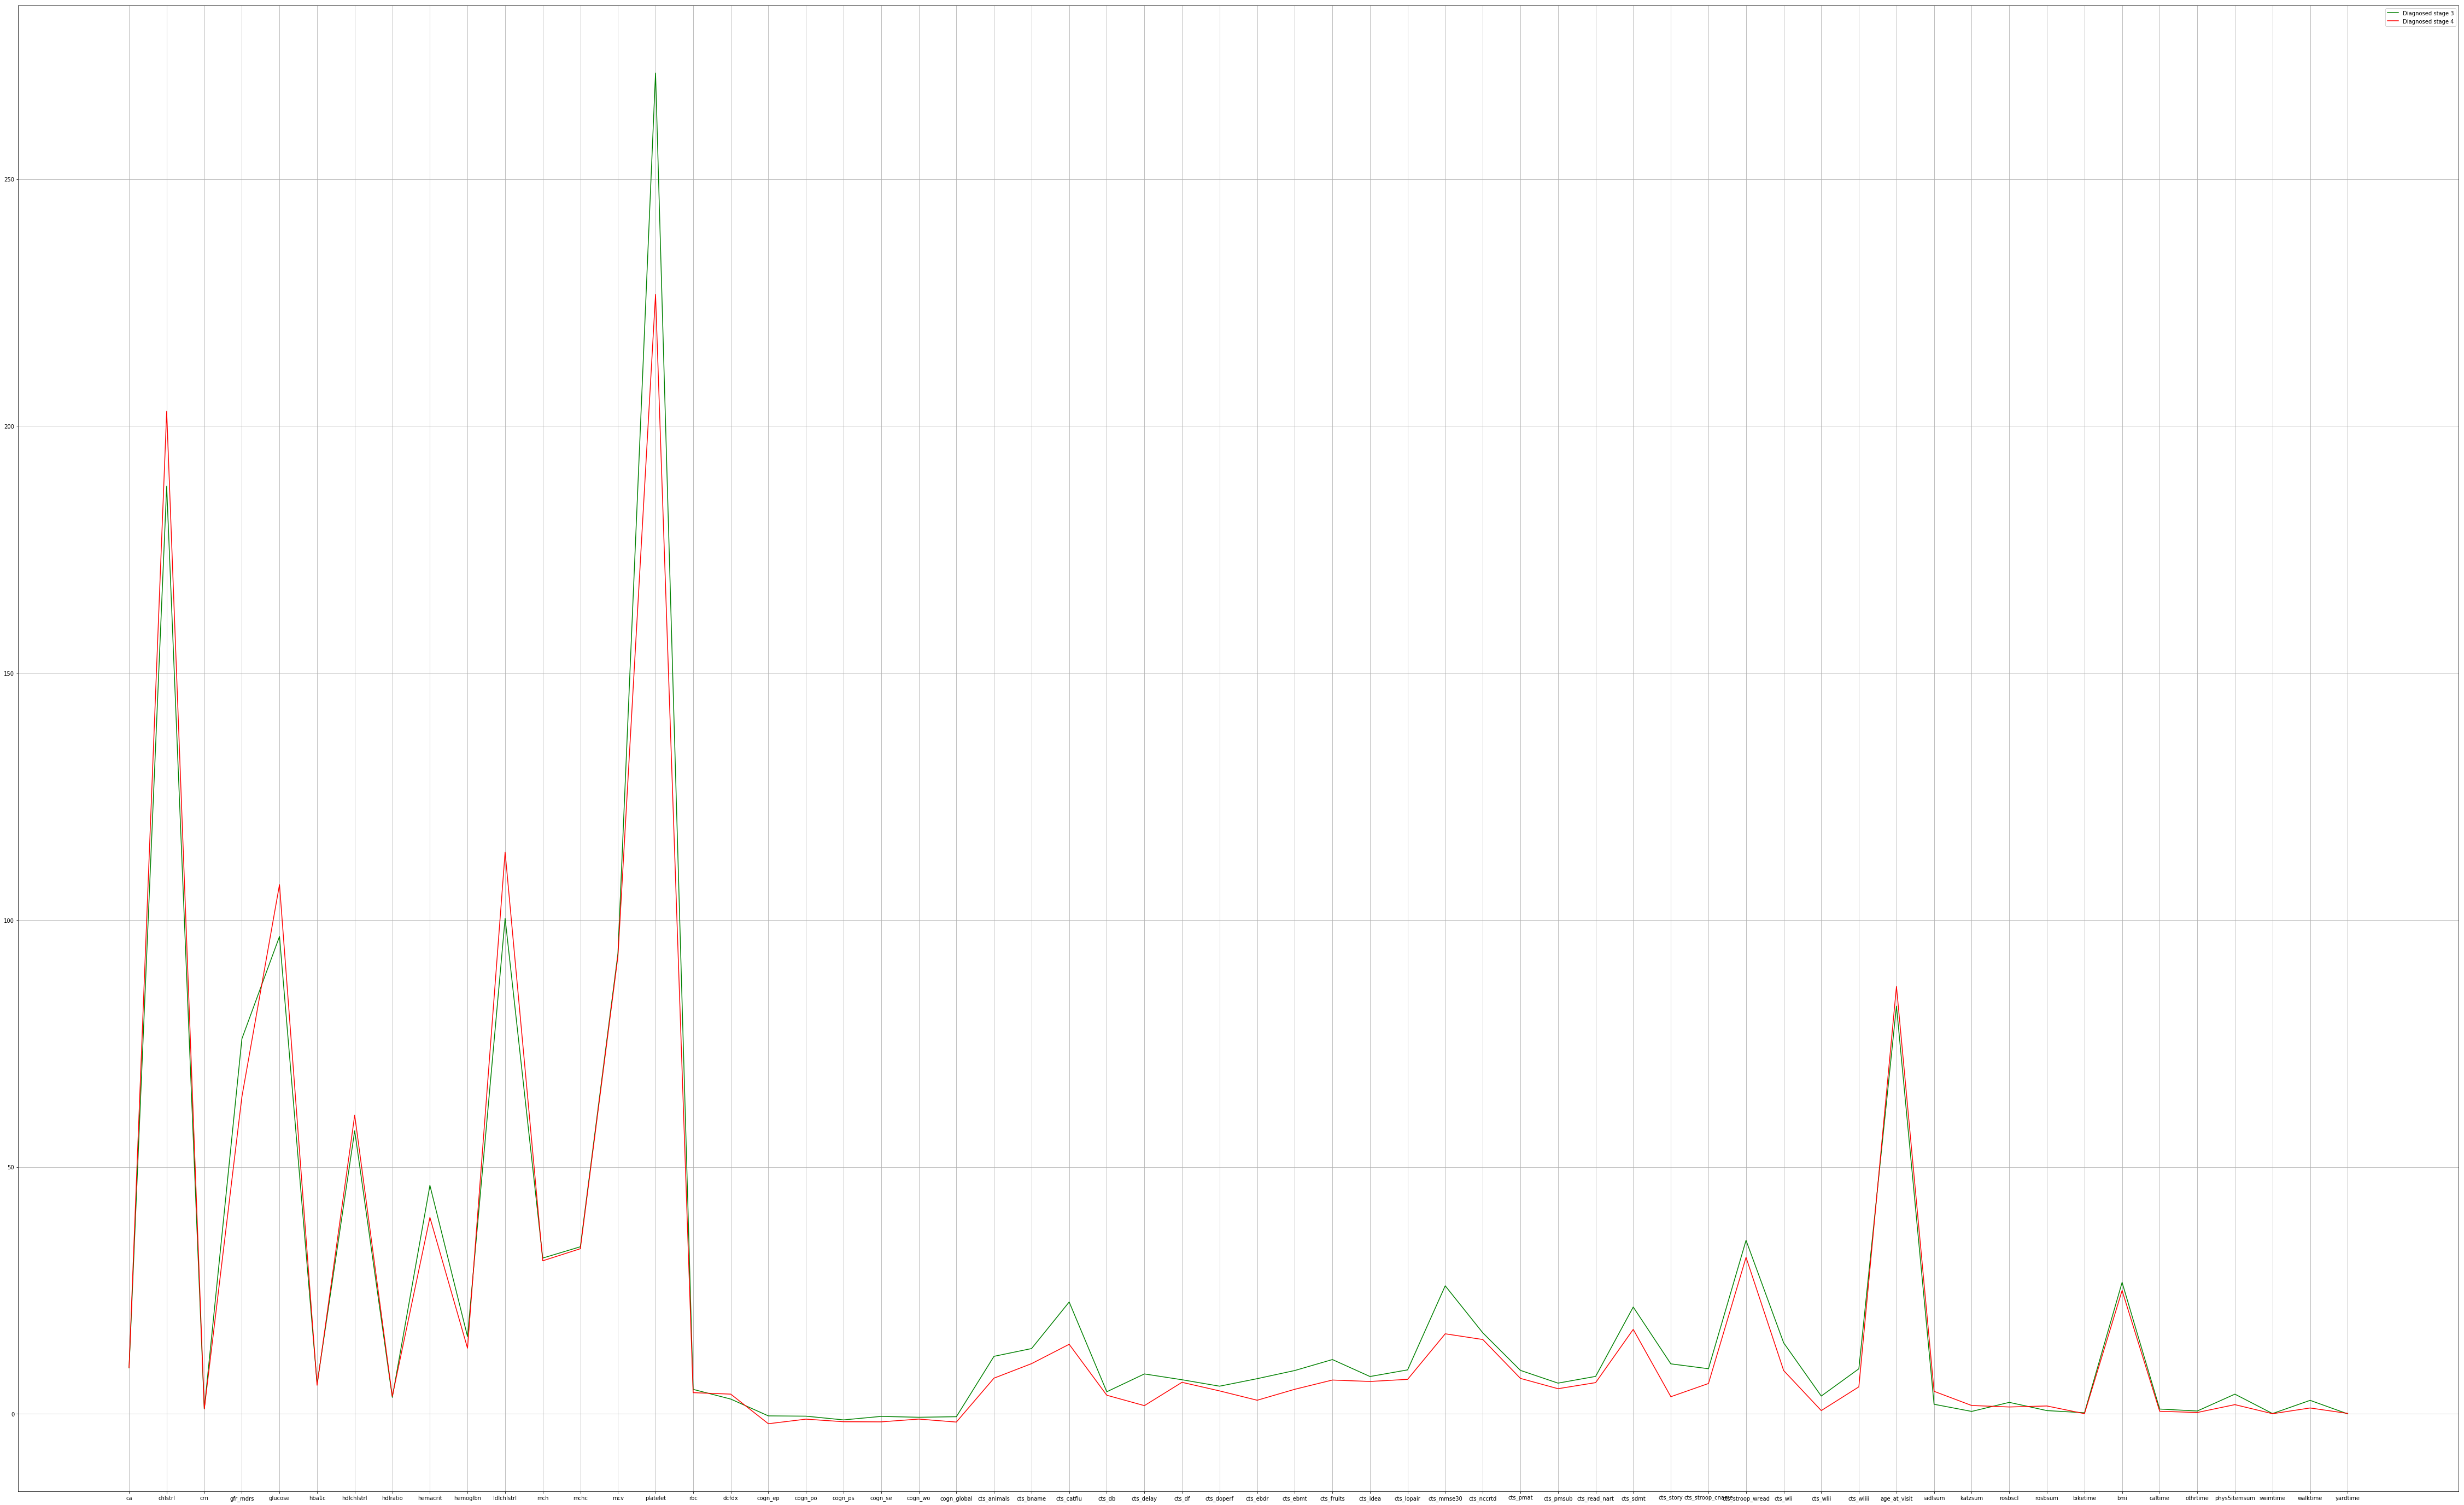

Ttest_indResult(statistic=5.72395069442884, pvalue=2.2300685517633174e-08)
Ttest_indResult(statistic=10.074517876040815, pvalue=4.0148090718269025e-21)
Ttest_indResult(statistic=5.634209059587856, pvalue=3.633949938654696e-08)
Ttest_indResult(statistic=5.770225025731565, pvalue=1.6655481564949562e-08)
Ttest_indResult(statistic=6.224614729006586, pvalue=1.3127996524537547e-09)
Ttest_indResult(statistic=8.974585044297152, pvalue=1.567909415697025e-17)
Ttest_indResult(statistic=10.773101808999218, pvalue=1.6322048305397324e-23)
Ttest_indResult(statistic=3.8811450768694273, pvalue=0.0001238801571195271)
Ttest_indResult(statistic=4.692803292345724, pvalue=3.770254060964775e-06)
Ttest_indResult(statistic=1.8098750331739417, pvalue=0.07125029105112055)
Ttest_indResult(statistic=0.9502526121058903, pvalue=0.34258629554604647)
Ttest_indResult(statistic=1.4569211058329032, pvalue=0.145972747393727)
Ttest_indResult(statistic=1.8844908328297914, pvalue=0.06039636936058736)
Ttest_indResult(statisti

In [25]:
# now I am going to split the data again with the slicing as stage 1 and stage 2 to see if there are any difference 
# that is significant between, then I will be running a t-test for the cognition section
def sort_cases_for_other_stages_3and4(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 2
    dcfdx_split_lvl_1 = 3     # diagnosed flag == 2 diagnosed, smaller than 3 is not
    dcfdx_split_lvl_2 = 4
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is larger than 4
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that is smaller than 3
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_3, df_dcfdx_stage_4 = \
sort_cases_for_other_stages_3and4(data_set_cleaned)
print("sorting completed")


stage_3_df_desc = df_dcfdx_stage_3.describe()
stage_4_df_desc = df_dcfdx_stage_4.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_3_df_desc.iloc[1][:60], \
         label='Diagnosed stage 3',color="green")
plt.plot(stage_4_df_desc.iloc[1][:60], \
         label='Diagnosed stage 4',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_3_prep_t = df_dcfdx_stage_3[col_name][:]
    stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
    stage_3_prep_t = stage_3_prep_t.dropna()
    stage_4_prep_t = stage_4_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_3_prep_t, stage_4_prep_t))
for result in t_test_result_list:
    print(result)

# now I want to compare the cogn score of the 2 DF
# this is the DF of stage 3 compare to the DF of stage 4
# we can see here the cognition test score is still really shows the difference
# and the t-test supports my idea

### Below is stage 4 compare to stage 5

sorting completed


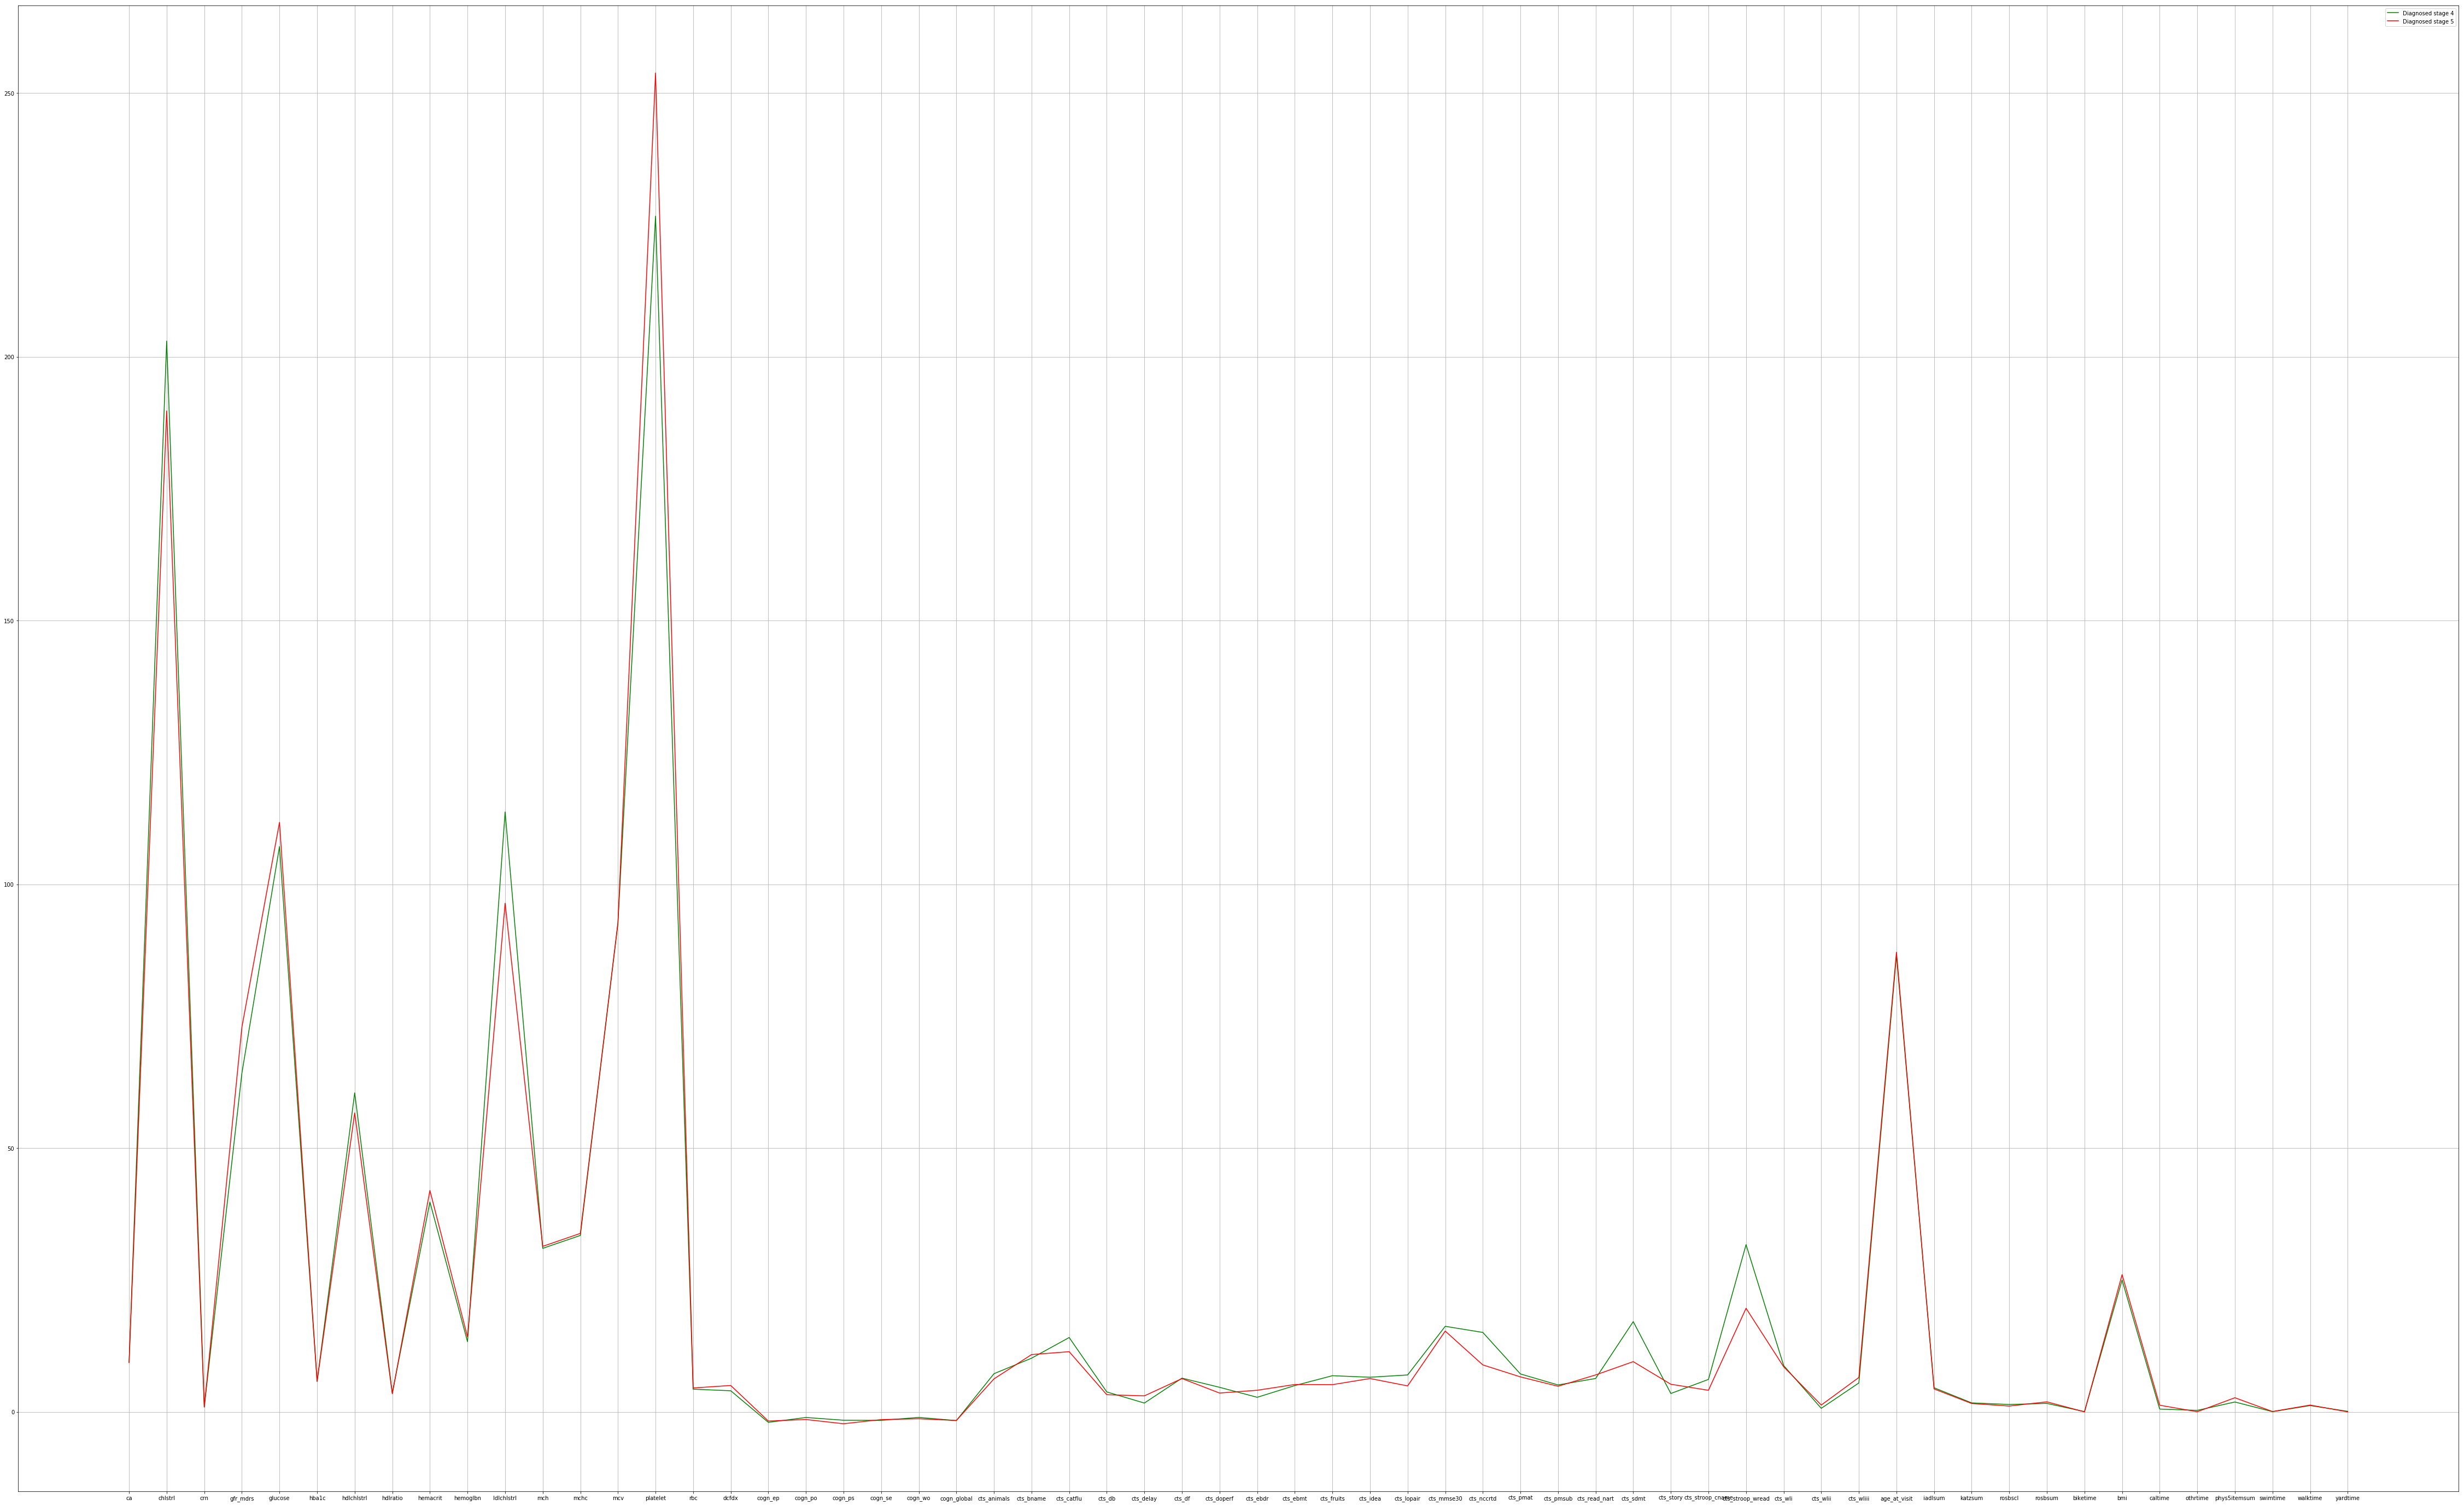

Ttest_indResult(statistic=0.26816193699606744, pvalue=0.7887282605627324)
Ttest_indResult(statistic=-2.391279780372404, pvalue=0.01730693907103019)
Ttest_indResult(statistic=-1.7630513008228286, pvalue=0.07874974217117892)
Ttest_indResult(statistic=-0.36153495523475154, pvalue=0.7178994622083898)
Ttest_indResult(statistic=-2.2259976917219353, pvalue=0.02660336703721083)
Ttest_indResult(statistic=-2.6511406759403164, pvalue=0.008367721868158486)
Ttest_indResult(statistic=-2.6248039309457716, pvalue=0.009049967094865847)
Ttest_indResult(statistic=-0.9774205945715715, pvalue=0.3290118995932456)
Ttest_indResult(statistic=1.7600598581233238, pvalue=0.07918558259065038)
Ttest_indResult(statistic=-1.0681760532244116, pvalue=0.2862290229063699)
Ttest_indResult(statistic=0.1692820928671909, pvalue=0.8656625276091294)
Ttest_indResult(statistic=1.2961997121823179, pvalue=0.19568313987473399)
Ttest_indResult(statistic=2.450295199356857, pvalue=0.014792722924220842)
Ttest_indResult(statistic=2.7615

In [26]:
def sort_cases_for_other_stages_4and5(cleaned_df): # based on the parameter DF, create 2 DF, based on
    dcfdx_split_lvl_1 = 4     
    dcfdx_split_lvl_2 = 5
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is == 5
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that == 4
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_4, df_dcfdx_stage_5 = \
sort_cases_for_other_stages_4and5(data_set_cleaned)
print("sorting completed")


stage_5_df_desc = df_dcfdx_stage_5.describe()
stage_4_df_desc = df_dcfdx_stage_4.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_4_df_desc.iloc[1][:60], \
         label='Diagnosed stage 4',color="green")
plt.plot(stage_5_df_desc.iloc[1][:60], \
         label='Diagnosed stage 5',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
    stage_5_prep_t = df_dcfdx_stage_5[col_name][:]
    stage_4_prep_t = stage_4_prep_t.dropna()
    stage_5_prep_t = stage_5_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_4_prep_t, stage_5_prep_t))
for result in t_test_result_list:
    print(result)

# this is the DF of stage 4 compare to the DF of stage 5
# we can see here the cognition test score is still really shows the difference
# and the t-test supports my idea

### Below is stage 5 and stage 6 comparision

sorting completed


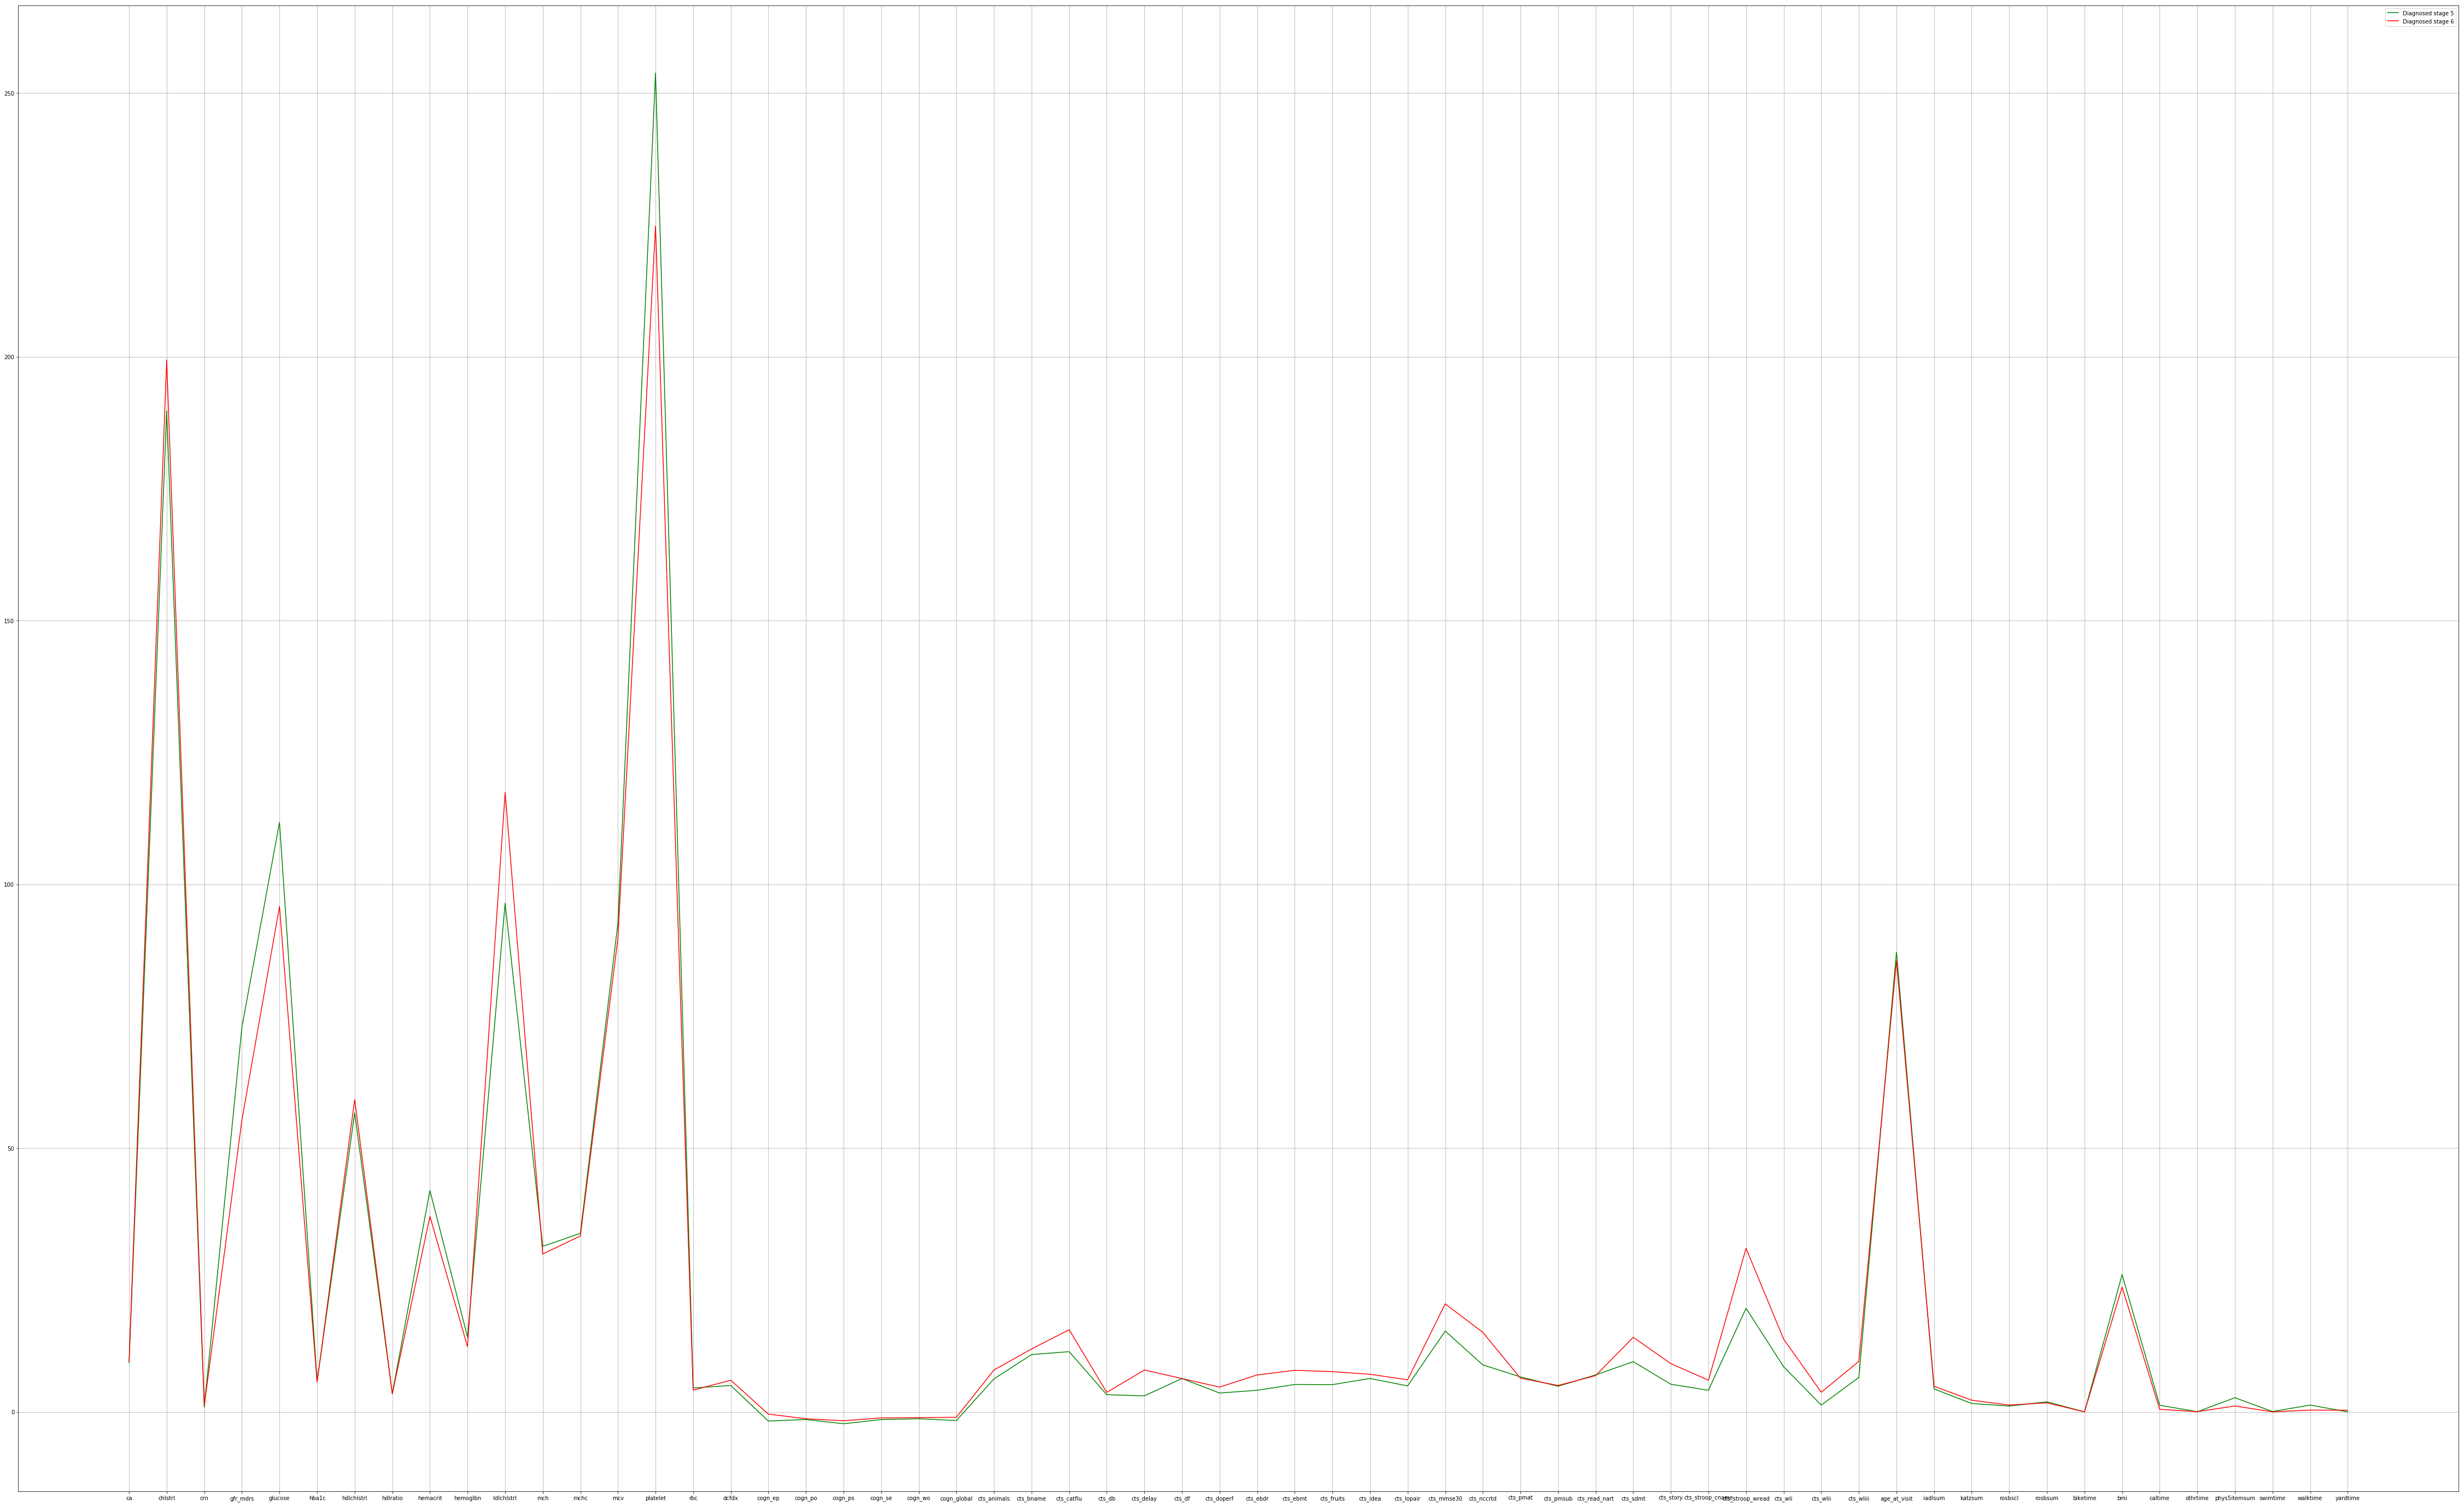

Ttest_indResult(statistic=-3.406919295197644, pvalue=0.0014359537202366117)
Ttest_indResult(statistic=-3.9617867819199875, pvalue=0.00027556953758412)
Ttest_indResult(statistic=-3.1142065043808445, pvalue=0.0032776460358367914)
Ttest_indResult(statistic=-3.2939502777361382, pvalue=0.001905625591335595)
Ttest_indResult(statistic=-3.0876073189804583, pvalue=0.0034145719724866055)
Ttest_indResult(statistic=-3.12099840514938, pvalue=0.0032558386587607344)
Ttest_indResult(statistic=-4.2560085691646545, pvalue=0.0001179485325297322)
Ttest_indResult(statistic=-1.1872526877510274, pvalue=0.2419612514668366)
Ttest_indResult(statistic=-2.16659333371649, pvalue=0.035481874712081085)
Ttest_indResult(statistic=0.1473875415469659, pvalue=0.8835485543474788)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=-0.826644368840677, pvalue=0.41270610434098376)
Ttest_indResult(statistic=-1.7261347014477255, pvalue=0.09185288529380417)
Ttest_indResult(statistic=-1.1032249376976093, pvalue=

In [27]:
def sort_cases_for_other_stages_5and6(cleaned_df): # based on the parameter DF, create 2 DF, based on
    dcfdx_split_lvl_1 = 5     
    dcfdx_split_lvl_2 = 6
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is == 6
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that == 5
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_5, df_dcfdx_stage_6 = \
sort_cases_for_other_stages_5and6(data_set_cleaned)
print("sorting completed")


stage_5_df_desc = df_dcfdx_stage_5.describe()
stage_6_df_desc = df_dcfdx_stage_6.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_5_df_desc.iloc[1][:60], \
         label='Diagnosed stage 5',color="green")
plt.plot(stage_6_df_desc.iloc[1][:60], \
         label='Diagnosed stage 6',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_5_prep_t = df_dcfdx_stage_5[col_name][:]
    stage_6_prep_t = df_dcfdx_stage_6[col_name][:]
    stage_5_prep_t = stage_5_prep_t.dropna()
    stage_6_prep_t = stage_6_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_5_prep_t, stage_6_prep_t))
for result in t_test_result_list:
    print(result)

# this is the DF of stage 5 compare to the DF of stage 6
# shouldnt be showing a lot

### Below is stage 4 compare to the stage 6

sorting completed


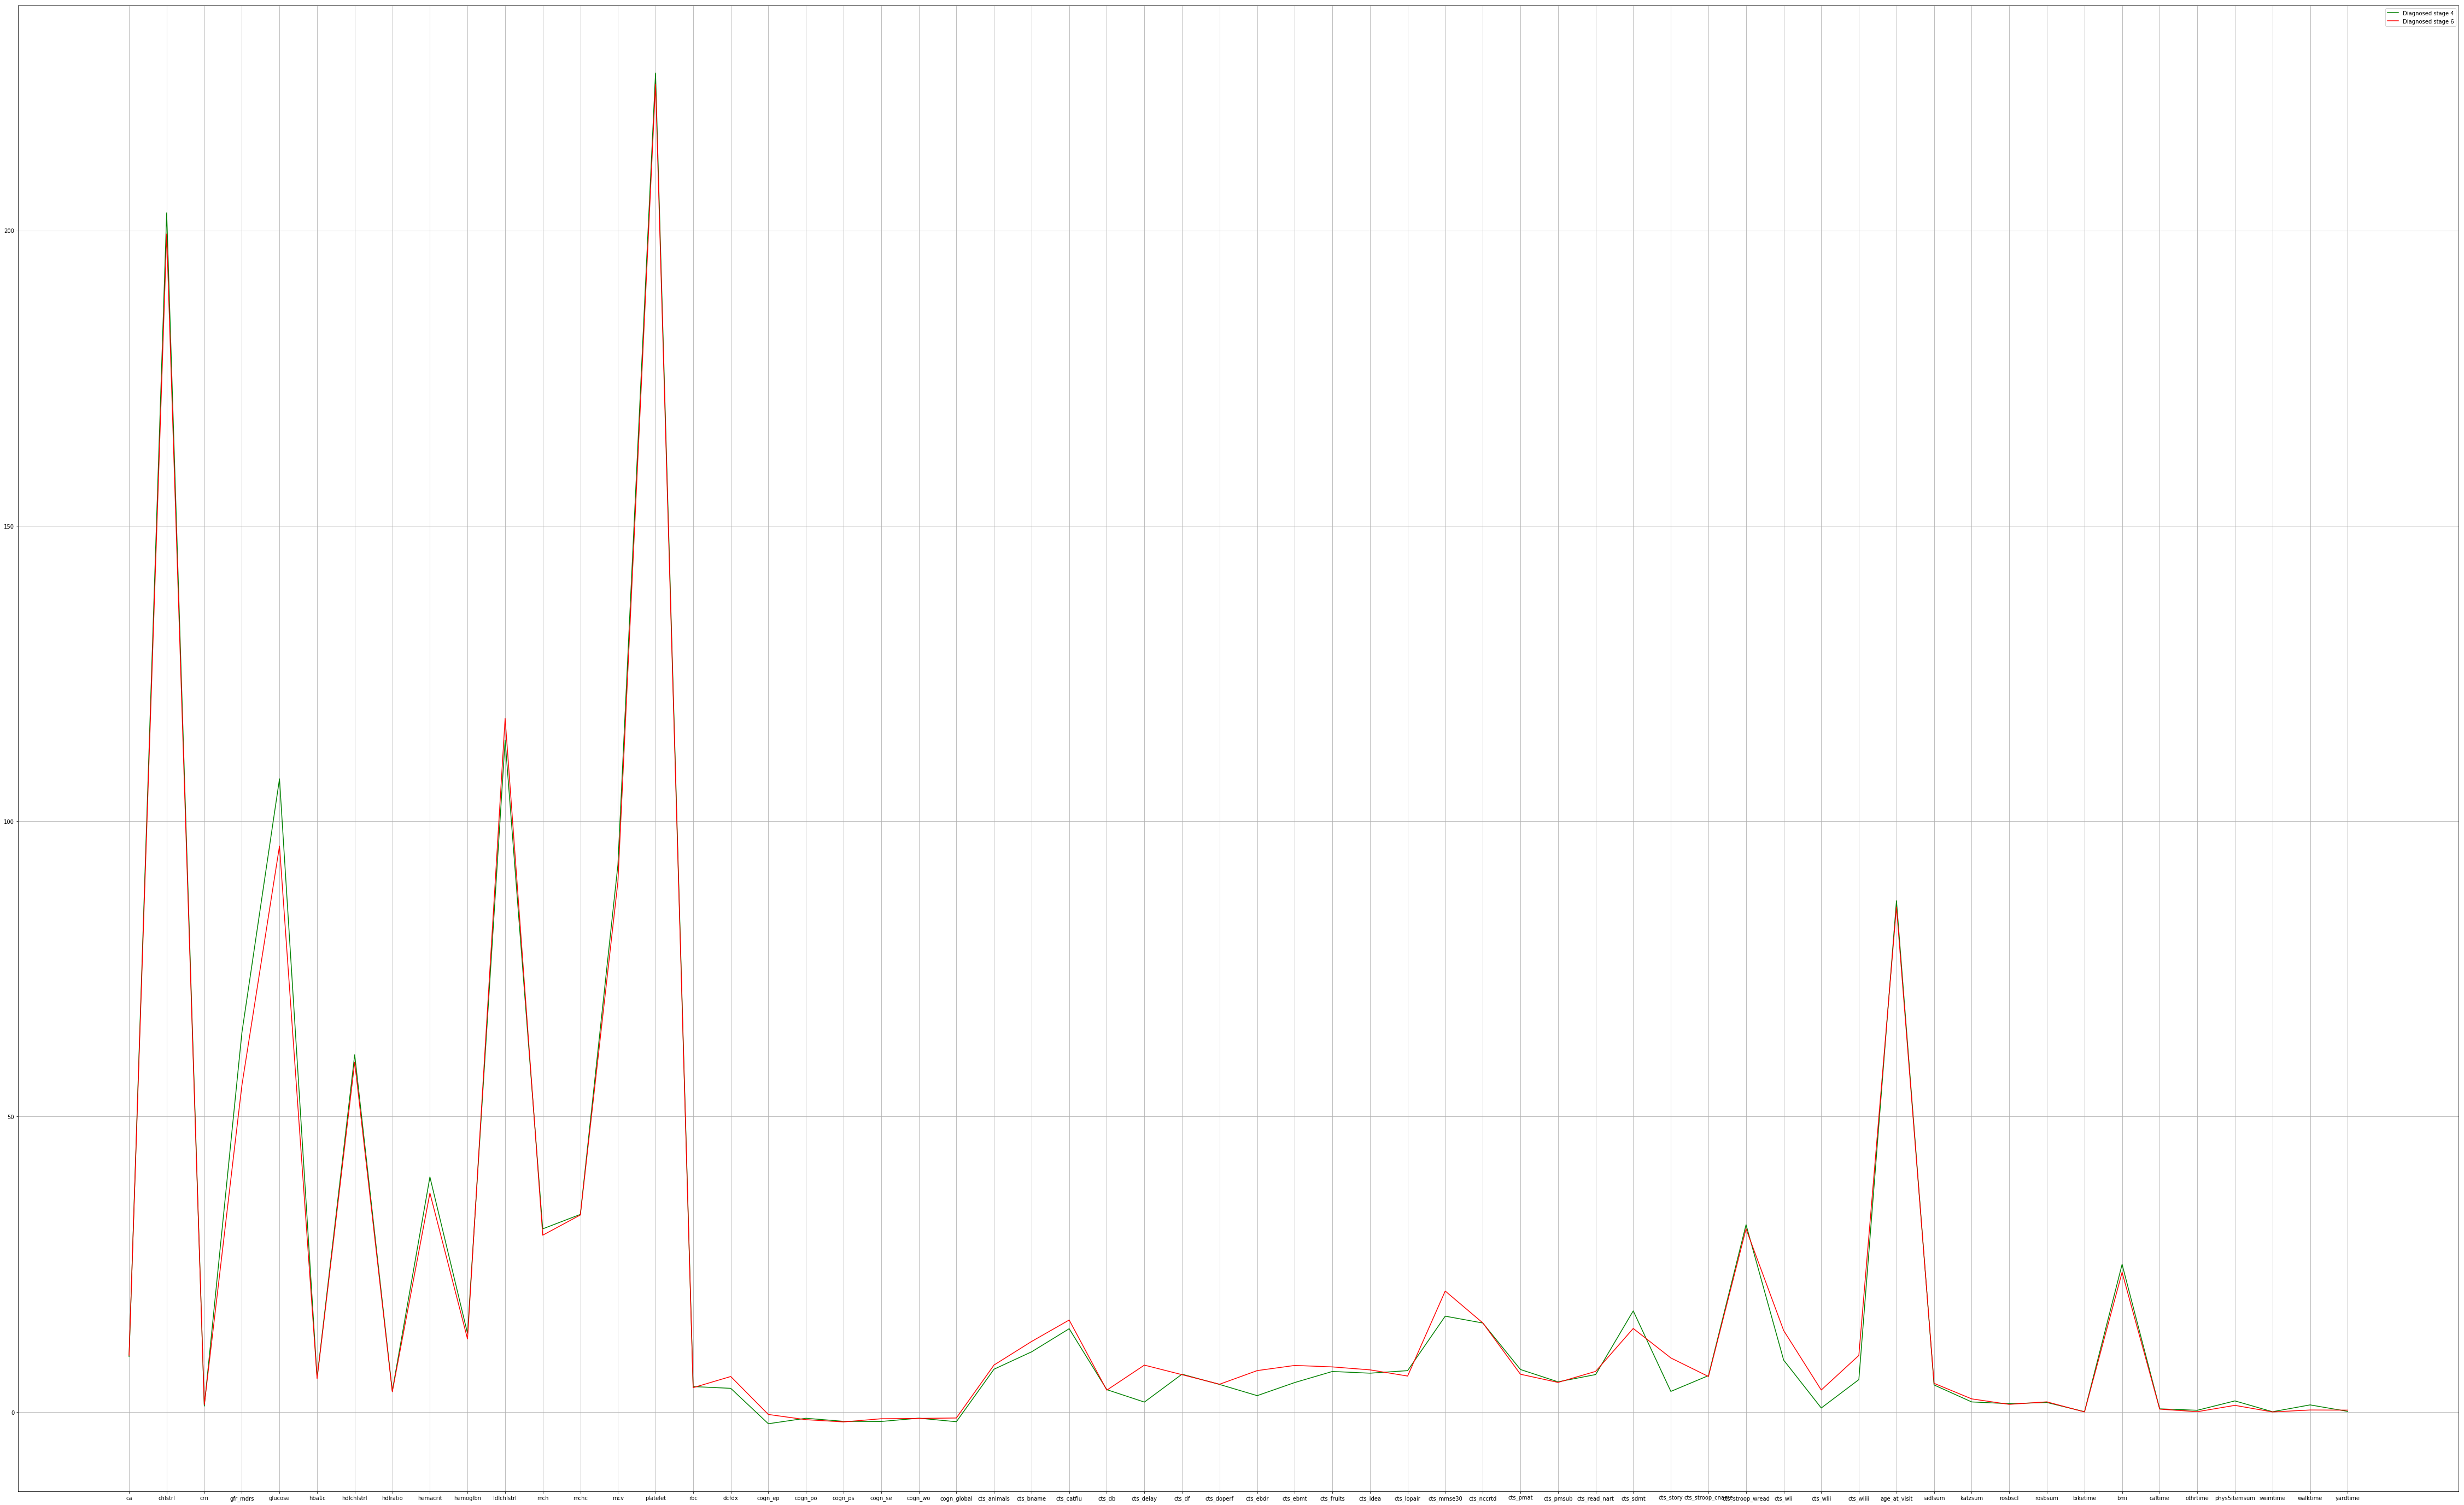

Ttest_indResult(statistic=-3.9888021740444626, pvalue=8.120682927949302e-05)
Ttest_indResult(statistic=-8.30373024939535, pvalue=2.4183688453631404e-15)
Ttest_indResult(statistic=-4.944241786564211, pvalue=1.2046636215118914e-06)
Ttest_indResult(statistic=-3.6693186765772663, pvalue=0.00027932719059257845)
Ttest_indResult(statistic=-5.115703825645852, pvalue=5.080473466522331e-07)
Ttest_indResult(statistic=-6.043565711761918, pvalue=3.831915864958054e-09)
Ttest_indResult(statistic=-8.562541467936626, pvalue=4.0662783111932914e-16)
Ttest_indResult(statistic=-1.7820861894672537, pvalue=0.07560700204561778)
Ttest_indResult(statistic=-0.6928817471017034, pvalue=0.48881609379411395)
Ttest_indResult(statistic=-0.6365298412114997, pvalue=0.5248948733850393)
Ttest_indResult(statistic=0.1202994105552221, pvalue=0.9043105695200447)
Ttest_indResult(statistic=0.1584656055232763, pvalue=0.8741766085370115)
Ttest_indResult(statistic=-0.060806506900746994, pvalue=0.9515521152490698)
Ttest_indResult(s

In [28]:
def sort_cases_for_other_stages_4and6(cleaned_df): # based on the parameter DF, create 2 DF, based on
    dcfdx_split_lvl_1 = 4  
    dcfdx_split_lvl_2 = 6
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is == 6
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that == 4
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_4, df_dcfdx_stage_6 = \
sort_cases_for_other_stages_4and6(data_set_cleaned)
print("sorting completed")


stage_4_df_desc = df_dcfdx_stage_4.describe()
stage_6_df_desc = df_dcfdx_stage_6.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_4_df_desc.iloc[1][:60], \
         label='Diagnosed stage 4',color="green")
plt.plot(stage_6_df_desc.iloc[1][:60], \
         label='Diagnosed stage 6',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
    stage_6_prep_t = df_dcfdx_stage_6[col_name][:]
    stage_4_prep_t = stage_4_prep_t.dropna()
    stage_6_prep_t = stage_6_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_4_prep_t, stage_6_prep_t))
for result in t_test_result_list:
    print(result)

# this is the DF of stage 4 compare to the DF of stage 6
# shouldnt be showing a lot

## Summary of the parts:
Right now I have compare the differnce between each stage:

>>Stage 1. NCI: No cognitive impairment

>>Stage 2. MCI: Mild cognitive impairment, no other condition contributing to CI

>>Stage 3. MCI+: Mild cognitive impairment AND another condition contributing to CI

>>Stage 4. AD: Alzheimer’s disease dementia, no other condition contributing to CI (NINCDS/ADRDA Probable AD)

>>Stage 5. AD+: Alzheimer’s disease dementia AND other condition contributing to CI (NINCDS/ADRDA Possible AD)

>>Stage 6. Other dementia: Other primary cause of dementia, no clinical evidence of AD

#### Some of the findings:
The stage 1 and 2 difference is there, and the t-test return a good P-value to support the idea. while the 2 and 3 there are differences, but the t-test returned a p-value that is not up to the standard. However, 2 and 3 shouldnt be having so much difference in the cogn section anyway, since the 2 and 3 line is not very clear. Next, In the 3 and 4 comparision, there is huge difference and the t-test supports it. Then in the 4 and 5, there are difference but agian, not very significant. Lastly 5, and 6 the cogn test is not able to show any meaningful result here. Since 5 4 6 are all dementia (4 and 5 is AD) and 6 is not AD thus, the cogn test is not useful here anymore

#### What should I do next?
I think next I will be focuse on the difference of the cogn test scores between different stages, then I can protentially see the trends that points toward the possible dementia. BTW: I think if i only look at the cogn test score it is impossible for me to use it to identify the AD. However, by using that, it is possible for me to identify the dementia, and use that to shrink down the target area to identify the AD

****

## NEXT:
#### Compare -> 1 and 2, 3 and 4 first


In [29]:
def looper_printer_helper_for_this_section(a_list, n_list = cts_names_list):
    i = 0
    for item in a_list:
        print( str(n_list[i]) + " : " + str(item))
        i += 1

In [30]:
def difference_calculation(df1, df2):
    """This function will take 2 df as attr, then it will compare the difference fo these two attribute"""
    cts_names_str = \
    "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
    # the numeric data witin in these catagolory is test score
    difference_mean_list = []
    for col_name in cts_names_list: # by doing this loop all the dataframe will only have the attr we need for cogn
        df1_prep_t = df1[col_name][:]
        df2_prep_t = df2[col_name][:]
        # notice here in the next line it is the mean of the next stage compare to the previous stage and then divide
        # by the the mean of the original stage
        # (origin.mean() - nextStage.mean())/(origin.mean())
        difference_mean_list.append((df1_prep_t.mean() - df2_prep_t.mean())/df1_prep_t.mean())
        
    #print(difference_mean_list)

    return difference_mean_list

#### score compare of stage 1 and 2 --> good
Stage 1. NCI: No cognitive impairment

Stage 2. MCI: Mild cognitive impairment, no other condition contributing to CI

In [31]:
df_dcfdx_stage_1, df_dcfdx_stage_2 = \
sort_cases_for_other_stages_1and2(data_set_cleaned)
mean_diff_1vs2_list = difference_calculation(df_dcfdx_stage_1,df_dcfdx_stage_2)

looper_printer_helper_for_this_section(mean_diff_1vs2_list)

cts_wli : 0.25613799920354996
cts_wlii : 0.4487945692825907
cts_wliii : 0.11752526382612927
cts_ebmt : 0.13723220495219235
cts_ebdr : 0.2419200072278623
cts_story : 0.35826190947179504
cts_delay : 0.4569329798508482
cts_bname : 0.060817024568140456
cts_catflu : 0.2363164438441112
cts_read_nart : 0.08788384362177025
cts_df : 0.0898519617374211
cts_db : 0.1870856940296991
cts_doperf : 0.1308999004381184
cts_lopair : 0.22271927368793829
cts_pmat : 0.2072036459257135
cts_sdmt : 0.21706233457570362
cts_nccrtd : 0.1633727194051467
cts_stroop_cname : 0.27522837580530635
cts_stroop_wread : 0.15752132086356901


#### score compare of stage 2 and 3 --> not good
Stage 2. MCI: Mild cognitive impairment, no other condition contributing to CI

Stage 3. MCI+: Mild cognitive impairment AND another condition contributing to CI

In [32]:
df_dcfdx_stage_2, df_dcfdx_stage_3 = \
sort_cases_for_other_stages_2and3(data_set_cleaned)
mean_diff_2vs3_list = difference_calculation(df_dcfdx_stage_2,df_dcfdx_stage_3)

looper_printer_helper_for_this_section(mean_diff_2vs3_list)

cts_wli : 0.07425154133745719
cts_wlii : 0.06784447655326412
cts_wliii : -0.04543478260869552
cts_ebmt : -0.018548795485784513
cts_ebdr : 0.03122127268393997
cts_story : -0.1199966463819351
cts_delay : -0.16086408246066125
cts_bname : 0.004067622331095492
cts_catflu : 0.20005439717836582
cts_read_nart : 0.006291908605533346
cts_df : 0.09409062502536303
cts_db : 0.1771019064600191
cts_doperf : 0.16275279720946192
cts_lopair : -0.06258140140661618
cts_pmat : 0.07170605373907403
cts_sdmt : 0.3514102738792751
cts_nccrtd : 0.25729715828725724
cts_stroop_cname : 0.38459908346798766
cts_stroop_wread : 0.15818548615169964


#### score compare of stage 2 and 4 --> good
Stage 2. MCI: Mild cognitive impairment, no other condition contributing to CI

Stage 4. AD: Alzheimer’s disease dementia, no other condition contributing to CI (NINCDS/ADRDA Probable AD)

In [33]:
df_dcfdx_stage_2, df_dcfdx_stage_4 = \
sort_cases_for_other_stages_2and4(data_set_cleaned)
mean_diff_2vs3_list = difference_calculation(df_dcfdx_stage_2,df_dcfdx_stage_4)

looper_printer_helper_for_this_section(mean_diff_2vs3_list)

cts_wli : 0.4352445169349765
cts_wlii : 0.8267445287745928
cts_wliii : 0.3728761467889909
cts_ebmt : 0.42210993041899864
cts_ebdr : 0.6248087291514774
cts_story : 0.6154799879173042
cts_delay : 0.7600131178774026
cts_bname : 0.2338401899903897
cts_catflu : 0.5024432533345659
cts_read_nart : 0.1714980780563372
cts_df : 0.16241366436438304
cts_db : 0.30587594970453635
cts_doperf : 0.30551765085024285
cts_lopair : 0.1659457584137856
cts_pmat : 0.24271779918748487
cts_sdmt : 0.48709633465049734
cts_nccrtd : 0.31849292311781513
cts_stroop_cname : 0.5860904346904717
cts_stroop_wread : 0.24078036916231454


#### score compare of stage 3 and 4 --> good
Stage 3. MCI+: Mild cognitive impairment AND another condition contributing to CI

Stage 4. AD: Alzheimer’s disease dementia, no other condition contributing to CI (NINCDS/ADRDA Probable AD)

In [34]:
df_dcfdx_stage_3, df_dcfdx_stage_4 = \
sort_cases_for_other_stages_3and4(data_set_cleaned)
mean_diff_3vs4_list = difference_calculation(df_dcfdx_stage_3,df_dcfdx_stage_4)

looper_printer_helper_for_this_section(mean_diff_3vs4_list)

cts_wli : 0.3899471527277042
cts_wlii : 0.8141345871290038
cts_wliii : 0.4001310615989515
cts_ebmt : 0.4326338883888388
cts_ebdr : 0.6127172694140735
cts_story : 0.6566775326293531
cts_delay : 0.7932687506241886
cts_bname : 0.23071101292750779
cts_catflu : 0.3780117736625955
cts_read_nart : 0.1662522131816102
cts_df : 0.07541928721174
cts_db : 0.15648844523451397
cts_doperf : 0.1705169669900919
cts_lopair : 0.21506790869657966
cts_pmat : 0.1842215454891512
cts_sdmt : 0.20920168067226894
cts_nccrtd : 0.08239602892784773
cts_stroop_cname : 0.32741477272727265
cts_stroop_wread : 0.09811529933481161


#### score compare of stage 4 and 5 --> not good
Stage 4. AD: Alzheimer’s disease dementia, no other condition contributing to CI (NINCDS/ADRDA Probable AD)

Stage 5. AD+: Alzheimer’s disease dementia AND other condition contributing to CI (NINCDS/ADRDA Possible AD)

In [35]:
df_dcfdx_stage_4, df_dcfdx_stage_5 = \
sort_cases_for_other_stages_4and5(data_set_cleaned)
mean_diff_4vs5_list = difference_calculation(df_dcfdx_stage_4,df_dcfdx_stage_5)

looper_printer_helper_for_this_section(mean_diff_4vs5_list)

cts_wli : 0.026319294895988325
cts_wlii : -0.9237536656891494
cts_wliii : -0.18971200086453785
cts_ebmt : -0.04104903078677301
cts_ebdr : -0.4824401664932362
cts_story : -0.5046936481169196
cts_delay : -0.8150702426564495
cts_bname : -0.06746275882240234
cts_catflu : 0.19043665741475024
cts_read_nart : -0.10603674540682417
cts_df : 0.012385919165580173
cts_db : 0.13963460104399697
cts_doperf : 0.23335705812574137
cts_lopair : 0.2960024529531255
cts_pmat : 0.07750376540185454
cts_sdmt : 0.44368681949044303
cts_nccrtd : 0.4089146422999777
cts_stroop_cname : 0.33474128827877514
cts_stroop_wread : 0.38045482483097726


#### score compare of stage 4 and 6 --> good
Stage 4. AD: Alzheimer’s disease dementia, no other condition contributing to CI (NINCDS/ADRDA Probable AD)

Stage 6. Other dementia: Other primary cause of dementia, no clinical evidence of AD

In [36]:
df_dcfdx_stage_4, df_dcfdx_stage_6 = \
sort_cases_for_other_stages_4and6(data_set_cleaned)
mean_diff_4vs6_list = difference_calculation(df_dcfdx_stage_4,df_dcfdx_stage_6)

looper_printer_helper_for_this_section(mean_diff_4vs6_list)

cts_wli : -0.5702241667485989
cts_wlii : -4.537662337662337
cts_wliii : -0.7475472601100742
cts_ebmt : -0.5803876852907638
cts_ebdr : -1.534859521331946
cts_story : -1.6287641532160921
cts_delay : -3.742460317460318
cts_bname : -0.1722725943258264
cts_catflu : -0.10455491673275172
cts_read_nart : -0.0849693788276465
cts_df : 0.012385919165580173
cts_db : 0.023816181953765808
cts_doperf : -0.008595674787845627
cts_lopair : 0.1310030278640144
cts_pmat : 0.1115968793577808
cts_sdmt : 0.17397233586596533
cts_nccrtd : -0.000955140246426139
cts_stroop_cname : 0.024287222808870187
cts_stroop_wread : 0.021921737348903913


#### score compare of stage 5 and 6 --> not good
Stage 5. AD: Alzheimer’s disease dementia, no other condition contributing to CI (NINCDS/ADRDA Probable AD)

Stage 6. Other dementia: Other primary cause of dementia, no clinical evidence of AD

In [37]:
df_dcfdx_stage_5, df_dcfdx_stage_6 = \
sort_cases_for_other_stages_5and6(data_set_cleaned)
mean_diff_5vs6_list = difference_calculation(df_dcfdx_stage_5,df_dcfdx_stage_6)

looper_printer_helper_for_this_section(mean_diff_5vs6_list)

cts_wli : -0.6126684636118599
cts_wlii : -1.878571428571429
cts_wliii : -0.46888260254596875
cts_ebmt : -0.5180722891566265
cts_ebdr : -0.7099236641221374
cts_story : -0.7470427661510463
cts_delay : -1.6128246753246755
cts_bname : -0.09818594104308385
cts_catflu : -0.3643835616438356
cts_read_nart : 0.01904761904761911
cts_df : 0.0
cts_db : -0.1346153846153846
cts_doperf : -0.31560028756290437
cts_lopair : -0.2343749999999999
cts_pmat : 0.03695745595186932
cts_sdmt : -0.4848249027237353
cts_nccrtd : -0.6934189406099518
cts_stroop_cname : -0.4666666666666667
cts_stroop_wread : -0.5787037037037037


### Now my approch to the cogn test is:
> 1. Stage 1 v 2
> 2. Stage 1 v 4
> 3. Stage 2 v 4
> 4. Stage 3 v 4 DROP
> 5. Stage 1 v 3 DROP

Since there are not a lot of people in stage 3, I don't think it is good to include stage 3 for the approach, e.g: 2 v 3, 3 v 4, 1 v 3, lastly to verify the data I will be using the cogn_global value

In [38]:
df_stage_list = [df_dcfdx_stage_1,df_dcfdx_stage_2,df_dcfdx_stage_3, \
                 df_dcfdx_stage_4,df_dcfdx_stage_5,df_dcfdx_stage_6]
# each item is a df
# put the value in a nice way

In [39]:
def get_specific_mean(user_input_str, df_stage_list):
    result_mean_list = []
    for df in df_stage_list:
        df = df.describe()
    for df in df_stage_list:
        result_mean_list.append(df.iloc[1][user_input_str])
    return result_mean_list

In [40]:
_list = get_specific_mean("cogn_global",df_stage_list)
looper_printer_helper_for_this_section(_list, ["Stage 1","Stage 2","Stage 3", "Stage 4", "Stage 5", "Stage 6"])
#def looper_printer_helper_for_this_section(a_list, n_list = cts_names_list)

Stage 1 : 0.05029071447072001
Stage 2 : -1.2420633951746995
Stage 3 : -0.5544338288646401
Stage 4 : -1.1426477849336973
Stage 5 : -1.9939650237886122
Stage 6 : -0.6004210971894937


# STAGE 3 and 5

sorting completed


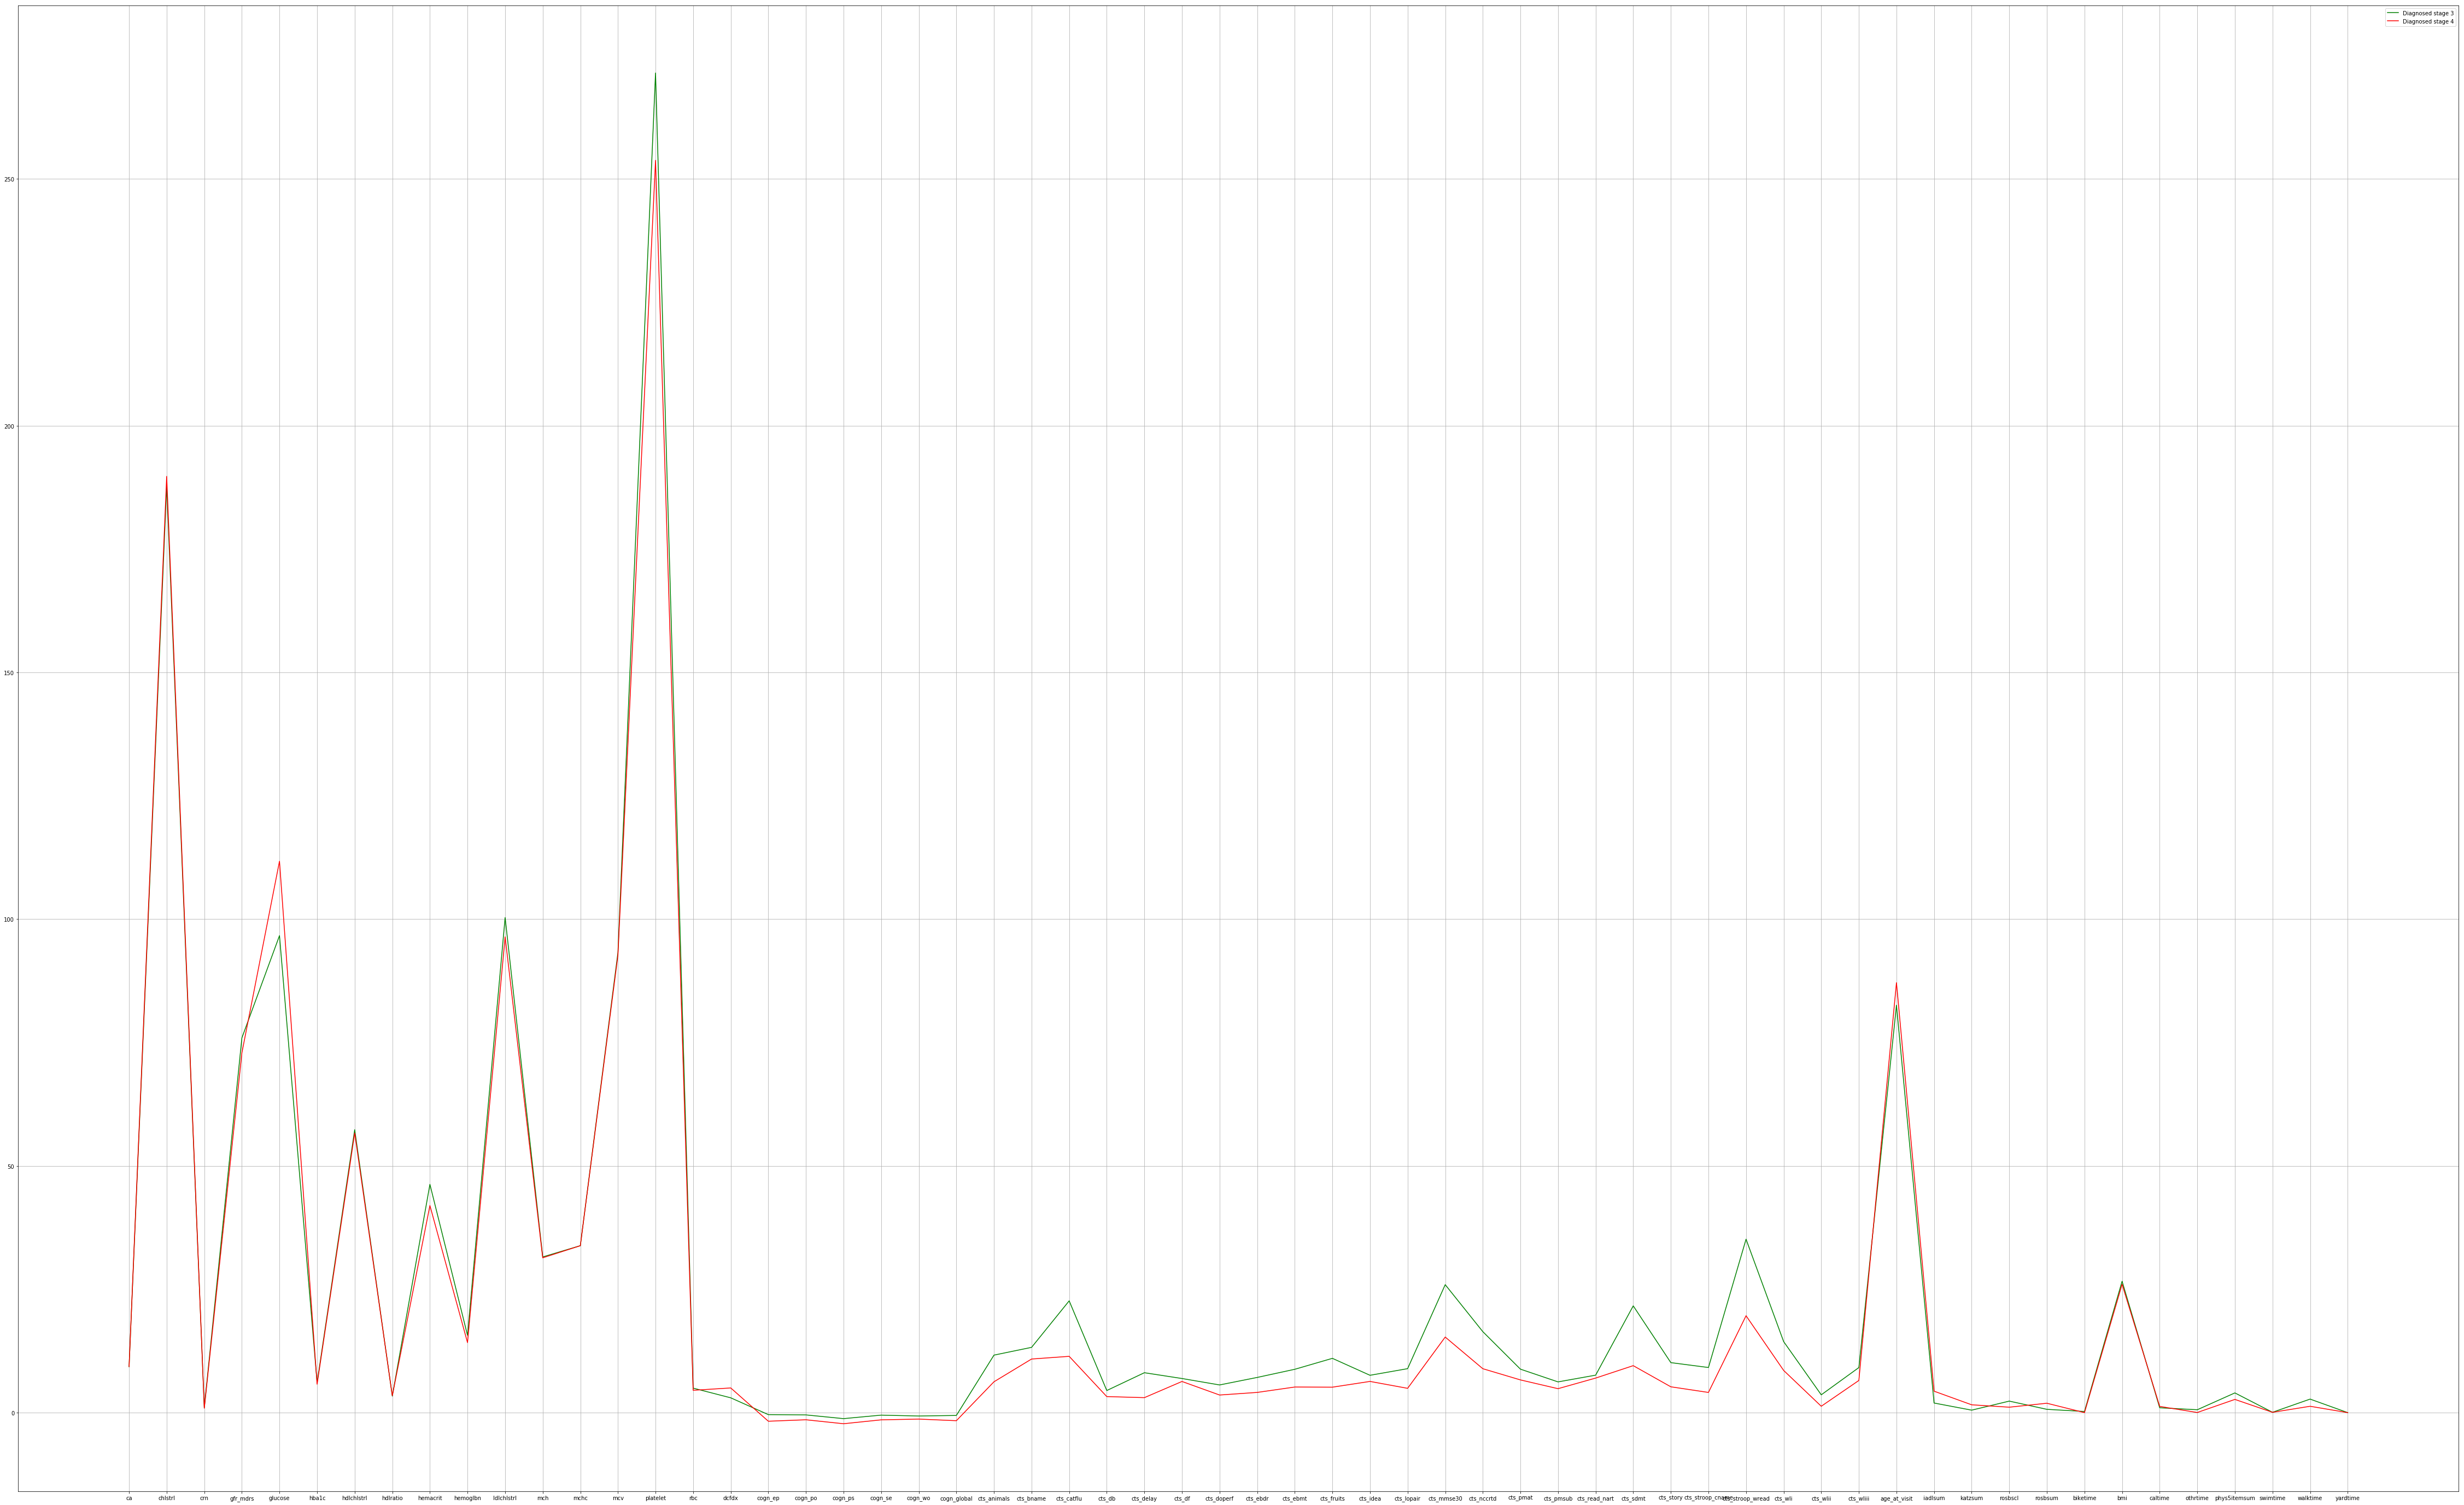

Ttest_indResult(statistic=4.8435380044496466, pvalue=1.1876242197558566e-05)
Ttest_indResult(statistic=4.529592341801129, pvalue=3.4846211574074095e-05)
Ttest_indResult(statistic=3.333261308988151, pvalue=0.0015869936414886722)
Ttest_indResult(statistic=5.201678249418786, pvalue=3.2519975122383896e-06)
Ttest_indResult(statistic=3.4317895021600755, pvalue=0.001170157560979032)
Ttest_indResult(statistic=4.6262758294693, pvalue=2.5836942201792083e-05)
Ttest_indResult(statistic=4.733185655202754, pvalue=1.8548680924267484e-05)
Ttest_indResult(statistic=3.217164937236762, pvalue=0.0022961851714384082)
Ttest_indResult(statistic=5.195527410887249, pvalue=3.3239623245192083e-06)
Ttest_indResult(statistic=0.796695705014249, pvalue=0.4295508916854267)
Ttest_indResult(statistic=1.1461877542868537, pvalue=0.25686618775166076)
Ttest_indResult(statistic=2.338014961772416, pvalue=0.023193229609892053)
Ttest_indResult(statistic=3.3355634377544523, pvalue=0.001593092362822403)
Ttest_indResult(statistic

In [41]:
# now I am going to split the data again with the slicing as stage 1 and stage 2 to see if there are any difference 
# that is significant between, then I will be running a t-test for the cognition section
def sort_cases_for_other_stages_3and4(cleaned_df): # based on the parameter DF, create 2 DF, based on
                            # the value of "dcfdx". smaller or larger than 2
    dcfdx_split_lvl_1 = 3     # diagnosed flag == 2 diagnosed, smaller than 3 is not
    dcfdx_split_lvl_2 = 5
    cleaned_df = cleaned_df.reset_index(drop = True)  # df reindexed
    # need to create 2 empty df
    df_column_name_list = list(cleaned_df)
    tot_rows = cleaned_df.shape[0]

    new_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list) #create a new empty df
    new_not_diagnosed_df_by_case = pd.DataFrame(columns=df_column_name_list)

    for row in range(0, tot_rows):  # loop through all the rows in the DF
        if cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_2:
            # get the df row that is larger than 4
            new_diagnosed_df_by_case = new_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        elif cleaned_df.iloc[row]['dcfdx'] == dcfdx_split_lvl_1:
            # get the df row that is smaller than 3
            new_not_diagnosed_df_by_case = new_not_diagnosed_df_by_case.append(cleaned_df.iloc[row], ignore_index= True)
        else:
            continue
    return new_not_diagnosed_df_by_case, new_diagnosed_df_by_case
#---------------------------------------------------------            
df_dcfdx_stage_3, df_dcfdx_stage_4 = \
sort_cases_for_other_stages_3and4(data_set_cleaned)
print("sorting completed")


stage_3_df_desc = df_dcfdx_stage_3.describe()
stage_4_df_desc = df_dcfdx_stage_4.describe()

plt.figure(figsize=(80,50))
plt.plot(stage_3_df_desc.iloc[1][:60], \
         label='Diagnosed stage 3',color="green")
plt.plot(stage_4_df_desc.iloc[1][:60], \
         label='Diagnosed stage 4',color="red")
plt.legend(loc='best')
plt.grid()
plt.show()

cts_names_str = "cts_wli cts_wlii cts_wliii cts_ebmt cts_ebdr cts_story cts_delay cts_bname cts_catflu cts_read_nart cts_df cts_db cts_doperf cts_lopair cts_pmat cts_sdmt cts_nccrtd cts_stroop_cname cts_stroop_wread"
# the numeric data witin in these catagolory is test score
cts_names_list = cts_names_str.split(" ")
t_test_result_list = []
for col_name in cts_names_list:
    stage_3_prep_t = df_dcfdx_stage_3[col_name][:]
    stage_4_prep_t = df_dcfdx_stage_4[col_name][:]
    stage_3_prep_t = stage_3_prep_t.dropna()
    stage_4_prep_t = stage_4_prep_t.dropna()
    t_test_result_list.append(ttest_ind(stage_3_prep_t, stage_4_prep_t))
for result in t_test_result_list:
    print(result)

# now I want to compare the cogn score of the 2 DF
# this is the DF of stage 3 compare to the DF of stage 4
# we can see here the cognition test score is still really shows the difference
# and the t-test supports my idea

#### A negative z-score simply means that someone has an overall score that is lower than the average of the entire cohort at baseline. And here the cogn_global is a Z
The result confirm the previous test, though it is not exactly as I hoped for 2 and 4 is rather similar

### Next:
#### The attr I will be looking at is:
> chlstri
> gfr_mdrs
> glucose
> hdlchlstrl
> ldlchlstrl
> hba1c
#### Then It will be:
> iadlsum
> bmi
#### Next:
> caltime
> othrtime
> swimtime
> walktime
> yardtime
> phy5itemsum

# remove the confounding var
compare to people that was once 1 and become higher stage later on, to people that is stayed the same

Next: Need to group the patient via their stages
1. Split the group via, stage one only, the people that entered from stage 1 to stage 4